In [1]:
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFiles
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFiles


    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/b19db3927f0db4151cb86d073689f2428e524576/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9816a3826b0ebf49ab4926e2b18842ad8b5c8f04/build.log`


LoadError: InitError: KeyError: key "register_cmap" not found
during initialization of module PyPlot

## Fig2 & S1

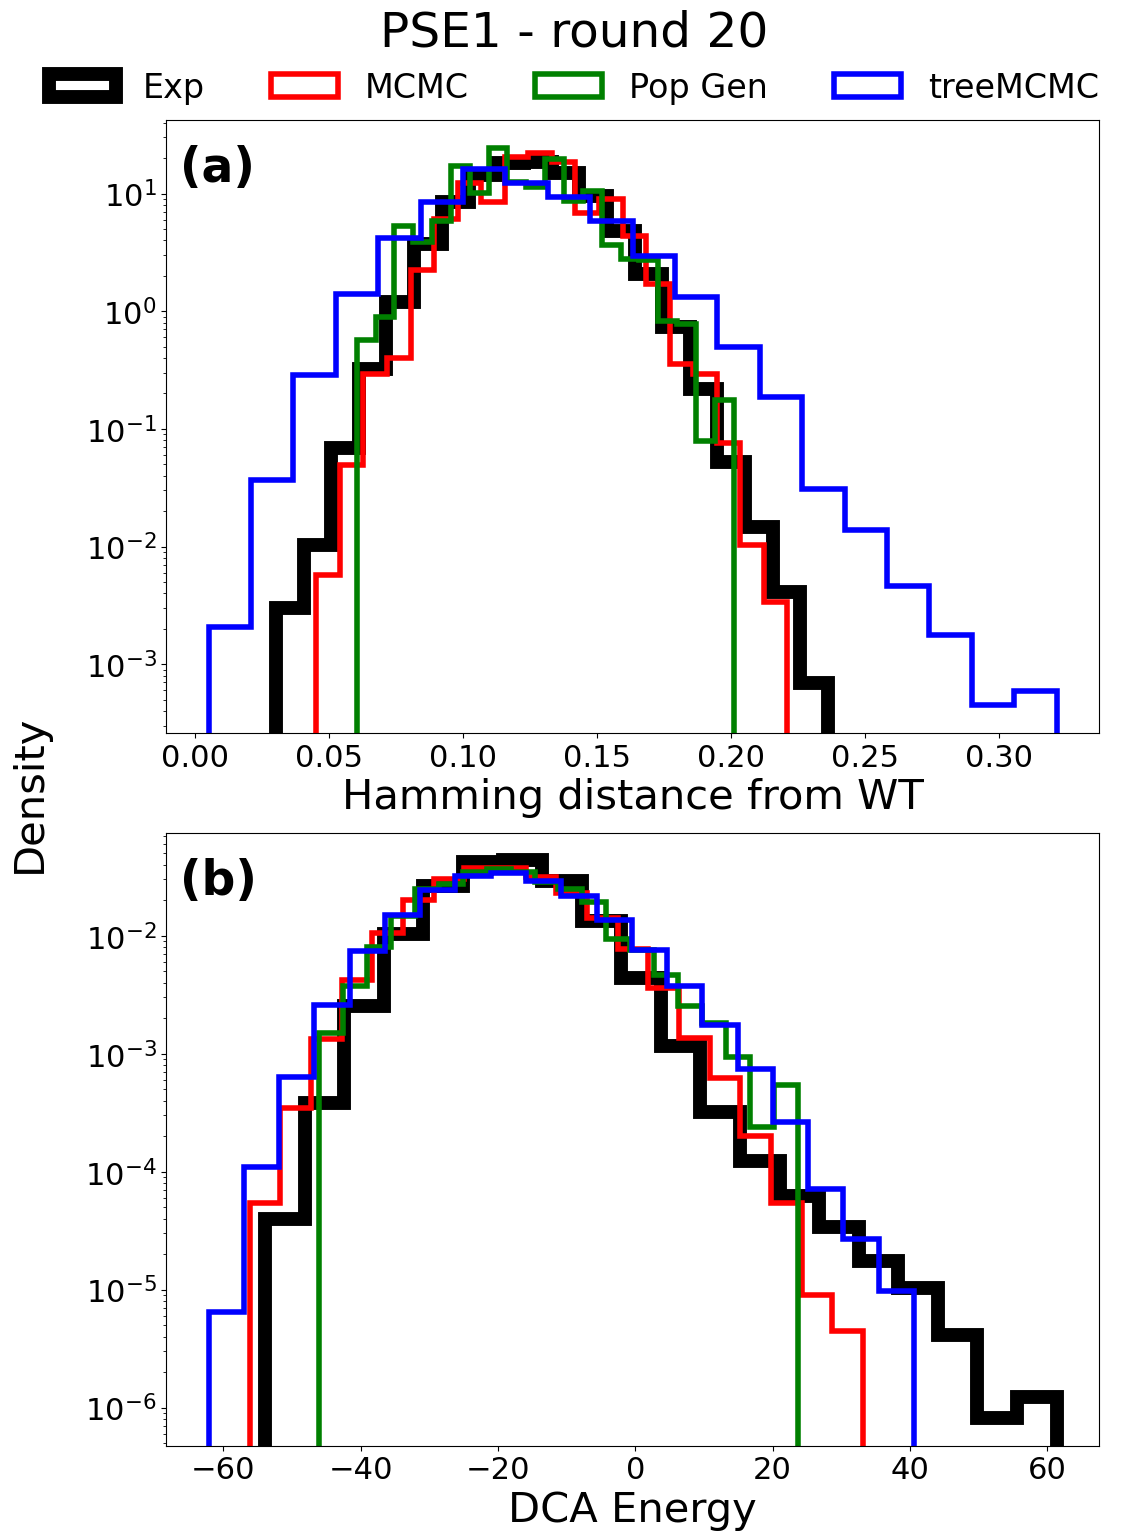

In [9]:
using PyPlot, DelimitedFiles

L = 199

# Parameters
n_bins = 20
n_points = 1000
colors = ["black", "red", "green", "blue"]
labels = ["Exp", "MCMC", "Pop Gen", "treeMCMC"]

# Load Data
target_ham = readdlm("../../data_directed_evolution/targets/ham_PSE_round20.txt")
target_en = readdlm("../../data_directed_evolution/targets/en_PSE_round20.txt")

mcmc_ham = readdlm("../../data_directed_evolution/best_fit/ham_PSE_mcmc_samples100000_T1.3_steps120_pairs10000.txt")
mcmc_en = readdlm("../../data_directed_evolution/best_fit/en_PSE_mcmc_samples100000_T1.3_steps120_pairs10000.txt")

mcmctree_ham = readdlm("../../data_directed_evolution/best_fit/ham_PSE_mcmctree_T1.4_steps110_pairs10000.txt")
mcmctree_en = readdlm("../../data_directed_evolution/best_fit/en_PSE_mcmctree_T1.4_steps110_pairs10000.txt")

popgen_ham = readdlm("../../data_directed_evolution/best_fit/ham_PSE_popgen_samples100000_T12.0_mu0.03_mubind-50.0_pairs10000.txt")
popgen_en = readdlm("../../data_directed_evolution/best_fit/en_PSE_popgen_samples100000_T12.0_mu0.03_mubind-50.0_pairs10000.txt")

# --- Figure Setup: 2 Rows, 1 Column ---
fig, axs = subplots(2, 1, figsize=(12, 16), sharex=false)

# --- Panel (a): Hamming distance ---
axs[1].hist(target_ham ./ L, histtype="step", color=colors[1], linewidth=10, bins=n_bins, density=true)
axs[1].hist(mcmc_ham ./ L, histtype="step", color=colors[2], linewidth=4, bins=n_bins, density=true)
axs[1].hist(popgen_ham ./ L, histtype="step", color=colors[3], linewidth=4, bins=n_bins, density=true)
axs[1].hist(mcmctree_ham ./ L, histtype="step", color=colors[4], linewidth=4, bins=n_bins, density=true)
axs[1].set_yscale("log")
axs[1].set_xlabel("Hamming distance from WT", fontsize=30)
axs[1].text(0.015, 0.9, "(a)", transform=axs[1].transAxes, fontsize=34, fontweight="bold")

# --- Panel (b): Energy ---
axs[2].hist(target_en, histtype="step", color=colors[1], linewidth=10, bins=n_bins, density=true)
axs[2].hist(mcmc_en, histtype="step", color=colors[2], linewidth=4, bins=n_bins, density=true)
axs[2].hist(popgen_en, histtype="step", color=colors[3], linewidth=4, bins=n_bins, density=true)
axs[2].hist(mcmctree_en, histtype="step", color=colors[4], linewidth=4, bins=n_bins, density=true)
axs[2].set_yscale("log")
axs[2].set_xlabel("DCA Energy", fontsize=30)
axs[2].text(0.015, 0.9, "(b)", transform=axs[2].transAxes, fontsize=34, fontweight="bold")

# Adjust tick sizes for both axes
for ax in axs
    ax.tick_params(axis="both", labelsize=22)
end

# --- Legend and Annotations ---
# Shared legend at the top
fig.legend(labels, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 0.97), fontsize=24, frameon=false)

# Title for the whole figure
fig.text(0.5, 0.99, "PSE1 - round 20", ha="center", va="top", fontsize=35)

# Common Y label centered vertically
fig.text(0.03, 0.5, "Density", va="center", rotation="vertical", fontsize=30)

# Adjust layout: rect=[left, bottom, right, top]
# Increased the top margin (0.92) to leave room for the title and legend
fig.tight_layout(rect=[0.08, 0.03, 0.95, 0.93])

show()
savefig("../../Fig2.pdf")

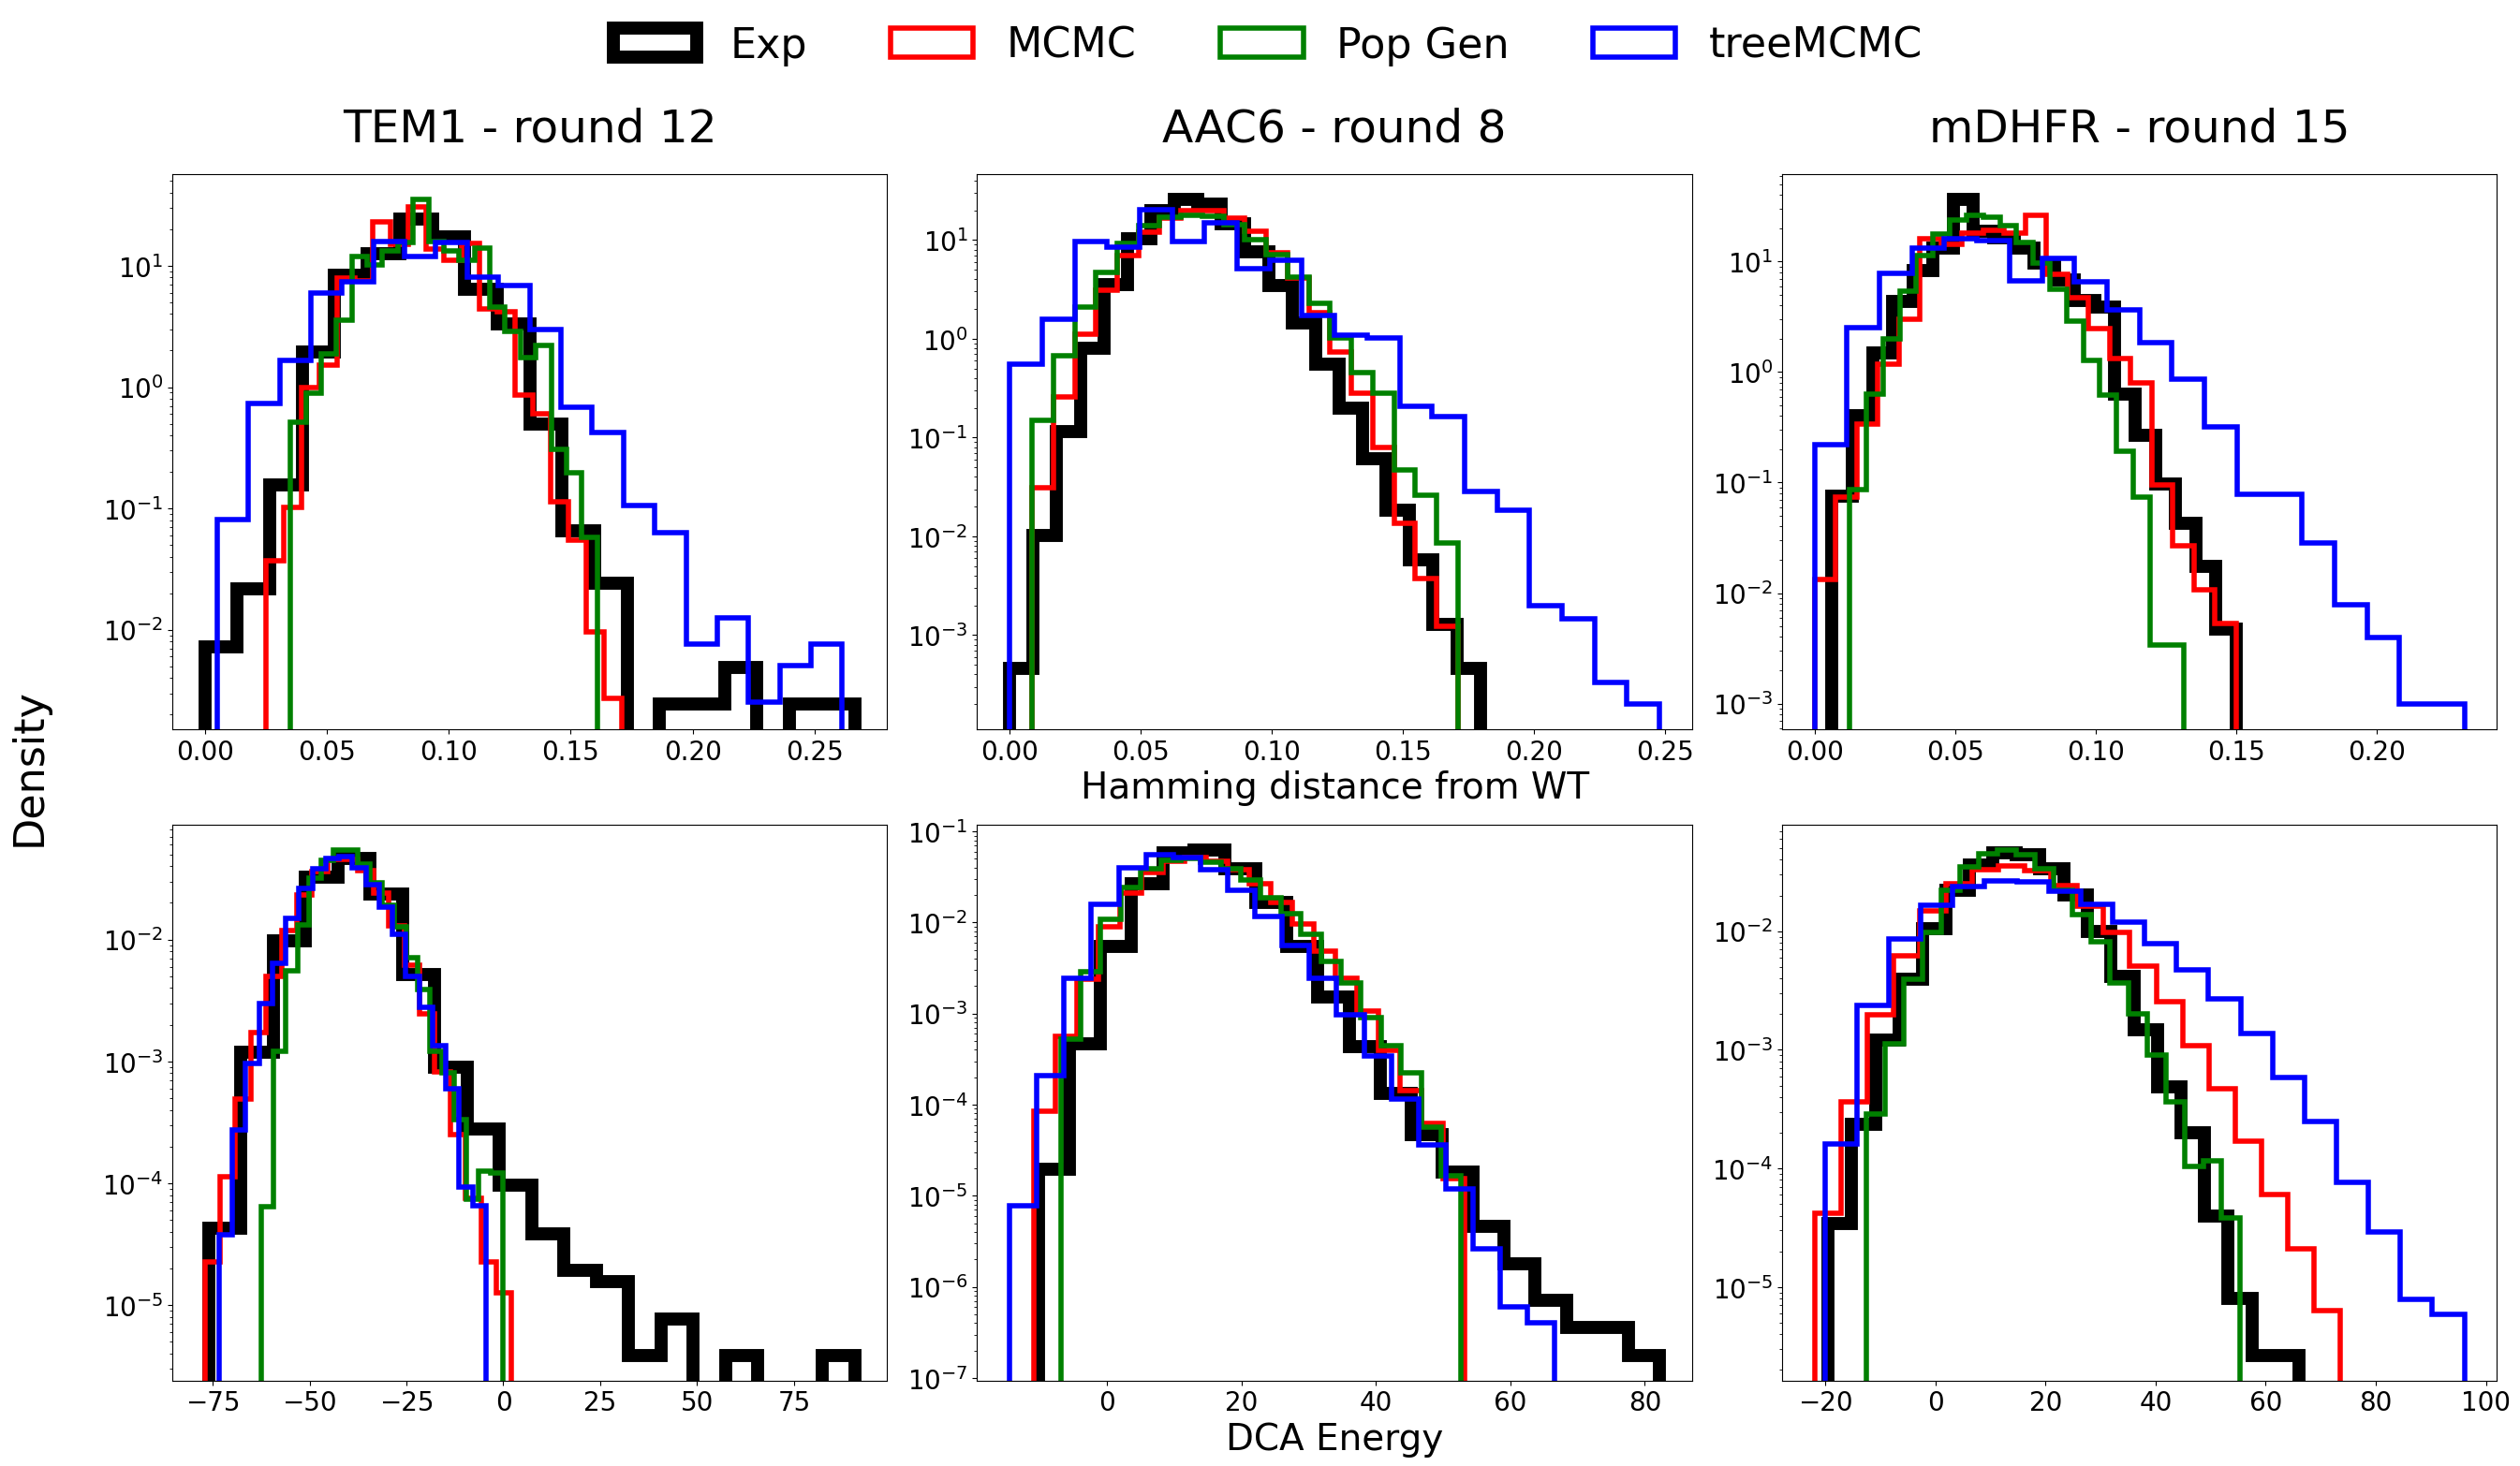

In [10]:
using PyPlot, DelimitedFiles

# --- Global Configuration ---
colors = ["black", "red", "green", "blue"]
labels = ["Exp", "MCMC", "Pop Gen", "treeMCMC"]
n_bins = 20

# Create a 2-row, 3-column figure
# Row 1: Hamming Distances | Row 2: Energies
# Columns: TEM1, AAC6, mDHFR
fig, axs = subplots(2, 3, figsize=(28, 16), sharex=false, sharey=false)

# --- Data Mapping (L, Experiment Title, File Prefix, Round) ---
experiments = [
    (199, "TEM1 - round 12", "TEM", 12),
    (117, "AAC6 - round 8",  "AAC", 8),
    (160, "mDHFR - round 15", "DHFR", 15)
]

suffixes = [
    (ham_m="mcmc_samples100000_T1.1_steps95_pairs10000", ham_t="mcmctree_T1.1_steps100_pairs10000", ham_p="popgen_samples100000_T6.0_mu0.035_mubind-50.0_pairs10000"),
    (ham_m="mcmc_samples100000_T2.1_steps30_pairs10000", ham_t="mcmctree_T1.8_steps30_pairs10000", ham_p="popgen_samples100000_T10.0_mu0.035_mubind0.0_pairs10000"),
    (ham_m="mcmc_samples100000_T2.3_steps50_pairs10000", ham_t="mcmctree_T2.6_steps45_pairs10000", ham_p="popgen_samples100000_T8.0_mu0.02_mubind10.0_pairs10000")
]

for j in 1:3  # Loop over Columns (Experiments)
    L, title, prefix, round_num = experiments[j]
    s = suffixes[j]
    
    # Load Data
    t_ham = readdlm("../../data_directed_evolution/targets/ham_$(prefix)_round$(round_num).txt")
    t_en  = readdlm("../../data_directed_evolution/targets/en_$(prefix)_round$(round_num).txt")
    m_ham = readdlm("../../data_directed_evolution/best_fit/ham_$(prefix)_$(s.ham_m).txt")
    m_en  = readdlm("../../data_directed_evolution/best_fit/en_$(prefix)_$(s.ham_m).txt")
    tr_ham = readdlm("../../data_directed_evolution/best_fit/ham_$(prefix)_$(s.ham_t).txt")
    tr_en  = readdlm("../../data_directed_evolution/best_fit/en_$(prefix)_$(s.ham_t).txt")
    p_ham = readdlm("../../data_directed_evolution/best_fit/ham_$(prefix)_$(s.ham_p).txt")
    p_en  = readdlm("../../data_directed_evolution/best_fit/en_$(prefix)_$(s.ham_p).txt")

    # --- Row 1: Hamming Distance (Metric A) ---
    ax_h = axs[1, j]
    ax_h.hist(t_ham ./ L, histtype="step", color=colors[1], linewidth=10, bins=n_bins, density=true)
    ax_h.hist(m_ham ./ L, histtype="step", color=colors[2], linewidth=4,  bins=n_bins, density=true)
    ax_h.hist(p_ham ./ L, histtype="step", color=colors[3], linewidth=4,  bins=n_bins, density=true)
    ax_h.hist(tr_ham ./ L, histtype="step", color=colors[4], linewidth=4, bins=n_bins, density=true)
    ax_h.set_yscale("log")
    
    # Common Column Title
    ax_h.set_title(title, fontsize=35, pad=25)

    # --- Row 2: Energy (Metric B) ---
    ax_e = axs[2, j]
    ax_e.hist(t_en, histtype="step", color=colors[1], linewidth=10, bins=n_bins, density=true)
    ax_e.hist(m_en, histtype="step", color=colors[2], linewidth=4,  bins=n_bins, density=true)
    ax_e.hist(p_en, histtype="step", color=colors[3], linewidth=4,  bins=n_bins, density=true)
    ax_e.hist(tr_en, histtype="step", color=colors[4], linewidth=4, bins=n_bins, density=true)
    ax_e.set_yscale("log")
   
end
axs[1,2].set_xlabel("Hamming distance from WT", fontsize = 28)

axs[2,2].set_xlabel("DCA Energy", fontsize = 28)

# --- Global Formatting ---
for ax in axs
    ax.tick_params(axis="both", labelsize=20)
end

# Shared legend at the top
fig.legend(labels, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.02), fontsize=32, frameon=false)
fig.text(0.02, 0.5, "Density", va="center", rotation="vertical", fontsize=32)
# Adjust layout
fig.tight_layout(rect=[0.05, 0.03, 0.98, 0.95])

savefig("../../FigS1.pdf", dpi=300)

## Fig3 

In [10]:
using DelimitedFiles
using PyPlot # Use the PyPlot backend for Matplotlib styling consistency

# --- Data Loading (Row 1: Pairwise Hamming Distance) ---

# Hamming Distance Data (as provided in the prompt)
# NOTE: Ensure these paths are correct relative to where you run the script.
pse_target_pair_ham = readdlm("../data_directed_evolution/targets/pair_ham_PSE_round20.txt")
tem_target_pair_ham = readdlm("../data_directed_evolution/targets/pair_ham_TEM_round12.txt")
aac_target_pair_ham = readdlm("../data_directed_evolution/targets/pair_ham_AAC_round8.txt")
dhfr_target_pair_ham = readdlm("../data_directed_evolution/targets/pair_ham_DHFR_round15.txt")

pse_mcmc_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_PSE_mcmc_samples100000_T1.3_steps120_pairs10000.txt")
pse_popgen_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_PSE_popgen_samples100000_T12.0_mu0.03_mubind-50.0_pairs10000.txt")
pse_mcmctree_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_PSE_mcmctree_T1.4_steps110_pairs10000.txt")

tem_mcmc_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_TEM_mcmc_samples100000_T1.1_steps95_pairs10000.txt")
tem_popgen_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_TEM_popgen_samples100000_T6.0_mu0.035_mubind-50.0_pairs10000.txt")
tem_mcmctree_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_TEM_mcmctree_T1.1_steps100_pairs10000.txt")

aac_mcmc_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_AAC_mcmc_samples100000_T2.1_steps30_pairs10000.txt")
aac_popgen_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_AAC_popgen_samples100000_T10.0_mu0.035_mubind0.0_pairs10000.txt")
aac_mcmctree_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_AAC_mcmctree_T1.8_steps30_pairs10000.txt")

dhfr_mcmc_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_DHFR_mcmc_samples100000_T2.3_steps50_pairs10000.txt")
dhfr_popgen_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_DHFR_popgen_samples100000_T8.0_mu0.02_mubind10.0_pairs10000.txt")
dhfr_mcmctree_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_DHFR_mcmctree_T2.6_steps45_pairs10000.txt")

pse_neutral_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_PSE_neutral_samples100000_T0.0_mu0.012_mubind0.0_pairs10000.txt")
tem_neutral_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_TEM_neutral_samples100000_T0.0_mu0.014_mubind0.0_pairs10000.txt")
aac_neutral_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_AAC_neutral_samples100000_T0.0_mu0.018_mubind0.0_pairs10000.txt")
dhfr_neutral_pair_ham = readdlm("../data_directed_evolution/best_fit/pair_ham_DHFR_neutral_samples100000_T0.0_mu0.007_mubind0.0_pairs10000.txt")

# --- Data Loading (Row 2: Terminal Branch Length CDF) ---

CDF_DIR = "../data_directed_evolution/best_fit/cdfs/"
wt_names = ["PSE1 - round 20", "TEM1 - round 12", "AAC6 - round 8", "mDHFR - round 15"]
wt_names2 = ["PSE1", "TEM1", "AAC6", "mDHFR"]
labels = ["Exp", "MCMC", "Pop Gen", "treeMCMC", "Neutral"]
colors = ["black", "red", "green", "blue", "grey"] 

cdf_data = Dict()
for wt_name in wt_names2
    cdf_data[wt_name] = Dict()
    for label in labels
        base_name = "$(wt_name)_$(replace(label, " " => "_"))_cdf"
        x_path = joinpath(CDF_DIR, "$(base_name)_lengths.txt")
        y_path = joinpath(CDF_DIR, "$(base_name)_cdf.txt")
        
        try
            # Read data and flatten to a vector
            X = vec(readdlm(x_path))
            Y = vec(readdlm(y_path))
            cdf_data[wt_name][label] = (X, Y)
        catch e
            println("Could not load CDF data for $wt_name - $label: $e")
        end
    end
end

# --- Plotting Parameters ---
n_bins = 20
L_PSE = 199 
L_AAC = 117 
L_DHFR = 160 
linewidths_ham = [10, 4, 4, 4, 4] # Exp, MCMC, Pop Gen, MCMC on tree
linewidths_cdf = [10.0, 4.0, 4.0, 4.0, 4.0] # All 5 models

all_pair_ham_data = [
    (pse_target_pair_ham, pse_mcmc_pair_ham, pse_popgen_pair_ham, pse_mcmctree_pair_ham, pse_neutral_pair_ham, L_PSE),
    (tem_target_pair_ham, tem_mcmc_pair_ham, tem_popgen_pair_ham, tem_mcmctree_pair_ham, tem_neutral_pair_ham, L_PSE),
    (aac_target_pair_ham, aac_mcmc_pair_ham, aac_popgen_pair_ham, aac_mcmctree_pair_ham, aac_neutral_pair_ham, L_AAC),
    (dhfr_target_pair_ham, dhfr_mcmc_pair_ham, dhfr_popgen_pair_ham, dhfr_mcmctree_pair_ham, dhfr_neutral_pair_ham, L_DHFR)
]


# --- PyPlot Implementation (2 Rows, 4 Columns) ---
fig, axs = subplots(2, 4, figsize=(24, 12), sharey="row", sharex=false)

# Set tick label size globally
PyPlot.rc("xtick", labelsize=18)
PyPlot.rc("ytick", labelsize=18)

# --- Row 1: Pairwise Hamming Distance Histograms ---
for i in 1:4
    ax = axs[1, i]
    wt_name = wt_names[i]
    target, mcmc, popgen, mcmctree, neutral, L = all_pair_ham_data[i]

    for j in 1:5
        data = [target, mcmc, popgen, mcmctree, neutral][j]
  
        ax.hist(vec(data) ./ L, 
                bins=n_bins, 
                density=true, 
                histtype="step", 
                color=colors[j], 
                linewidth=linewidths_ham[j], 
                label=labels[j])
    end
    
    # Styling
    ax.set_yscale("log")
    ax.set_title(wt_name, fontsize=22, pad=15)
    ax.set_xlim(-0.05, 0.5)

    # Show xticks on first row
    ax.tick_params(labelbottom=true)

        # Y-label only for first column
    if i == 1
        ax.set_ylabel("Density", fontsize=24)
    end
end

# --- Row 2: Terminal Branch Length CDF Plots ---
for i in 1:4
    ax = axs[2, i]
    wt_name = wt_names2[i]
    wt_data = cdf_data[wt_name]
    
    # Plot the 5 CDF lines
    for j in 1:5
        label = labels[j]
        
        if haskey(wt_data, label)
            lengths, cdf = wt_data[label]
            ax.plot(lengths, cdf, 
                    color=colors[j], 
                    linewidth=linewidths_cdf[j], 
                    drawstyle="steps-post", 
                    label=label)
        end
    end
    
    # Styling
    ax.set_ylim(0.0, 1.1)
    ax.set_xlim(-0.01, 0.15)
    ax.tick_params(labelbottom=true)

    # Y-label only for first column
    if i == 1
        ax.set_ylabel("Empirical CDF", fontsize=24)
    end
end


# Add subplot label (a)
axs[1,1].text(0.006, 0.9, "(a)", transform=axs[1,1].transAxes,
            fontsize=26, fontweight="bold", va="bottom")

# Add subplot label (b)
axs[2,1].text(0.006, 0.9, "(b)", transform=axs[2,1].transAxes,
            fontsize=26, fontweight="bold", va="bottom")

# Common X-axis labels
fig.text(0.5, 0.47, "Pairwise Normalized Hamming Distance", 
         ha="center", fontsize=22)

fig.text(0.5, 0.04, "Terminal Branch Length", 
         ha="center", fontsize=22)

# Legend
handles, labels_plt = axs[1, 1].get_legend_handles_labels()
fig.legend(handles, labels_plt, loc="upper center", ncol=5, 
          bbox_to_anchor=(0.5, 1.0), fontsize=22, frameon=false)

# Save
savefig("../Fig3.pdf", bbox_inches="tight")
show()


LoadError: ArgumentError: Cannot open '../data_directed_evolution/targets/pair_ham_PSE_round20.txt': not a file

## Fig 4

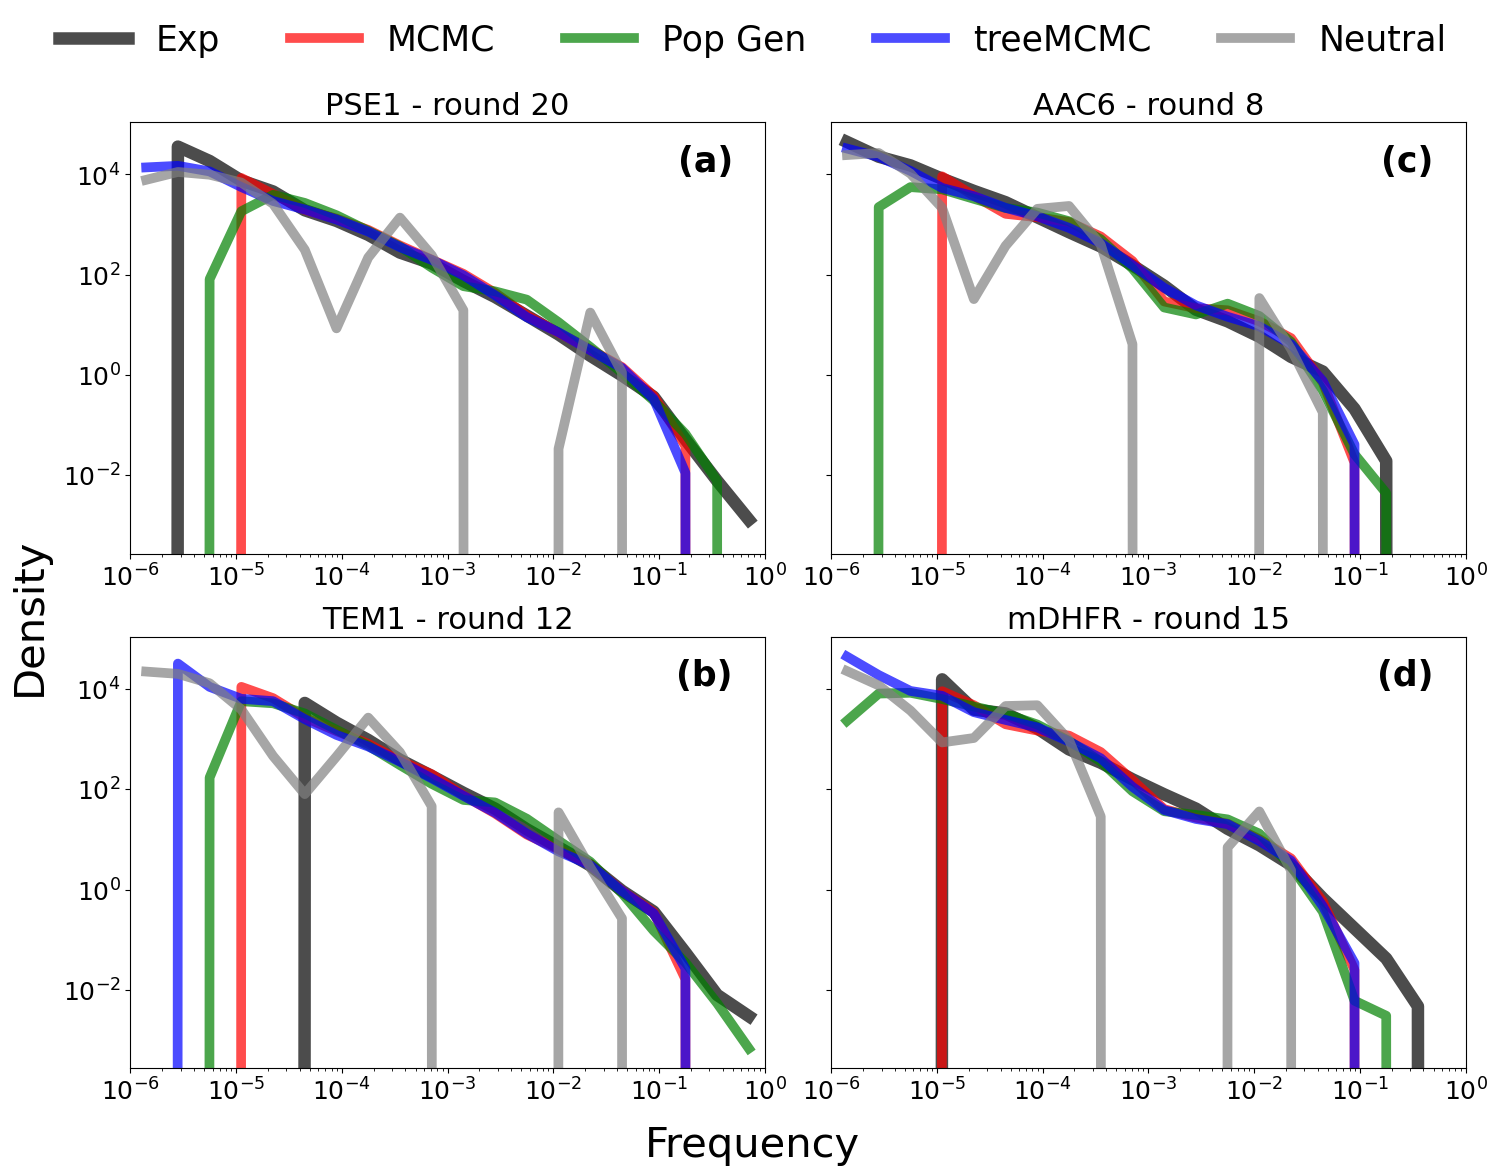

In [6]:
using PyPlot, CSV, DataFrames, JLD2, StatsBase

# --- Configurazione e Setup Dati ---
labels = ["Exp", "MCMC", "Pop Gen", "MCMC on tree", "Neutral"]
labels_true = ["Exp", "MCMC", "Pop Gen", "treeMCMC", "Neutral"]
colours = ["black", "red", "green", "blue", "grey"]
wt_names = ["PSE1 - round 20", "TEM1 - round 12", "AAC6 - round 8", "mDHFR - round 15"]
wt_names2 = ["PSE", "TEM", "AAC", "DHFR"]
data_folder = "../../data_directed_evolution/best_fit/sfs/"

# --- Implementazione PyPlot (2 Righe, 2 Colonne) ---

fig, axs = subplots(2, 2, figsize=(15, 12), sharey=true) 
axs_flat = reshape(axs, 4)

# Impostazione globale parametri grafici
PyPlot.rc("xtick", labelsize=18)
PyPlot.rc("ytick", labelsize=18)

line_width = 7.0 
alpha_value = 0.7
subplot_labels = ["(a)", "(b)", "(c)", "(d)"]

# --- Loop Principale ---

for i in 1:4
    ax = axs_flat[i]
    wt_name = wt_names2[i]
    
    # 1. Definizione Bin Logaritmici per il calcolo
    num_bins = 20
    log_bins = 10 .^ range(-6, 0, length=num_bins + 1)
    
    # Calcolo dei centri dei bin (media geometrica per scala log)
    # x = sqrt(limite_inferiore * limite_superiore)
    bin_centers = [sqrt(log_bins[k] * log_bins[k+1]) for k in 1:num_bins]
    
    for (j, lbl) in enumerate(labels)
        try
            # Caricamento file JLD2
            file = joinpath(data_folder, "filtered_freqs_$(wt_name)_$(lbl).jld2")
            data_dict = JLD2.load(file)
            vals = data_dict["freqs"]
            
            # Filtro valori positivi per log-scale
            clean_vals = vals[vals .> 0]

            # 2. Calcolo manuale dell'istogramma (Densità)
            # Usiamo StatsBase per fittare i dati nei bin logaritmici
            h = fit(Histogram, clean_vals, log_bins)
            
            # Normalizzazione per ottenere la densità (PDF)
            # densità = conteggi / (totale * ampiezza_bin)
            bin_widths = diff(log_bins)
            total_counts = sum(h.weights)
            density = h.weights ./ (total_counts .* bin_widths)

            # 3. Plot come Linea Continua
            current_lw = (lbl == "Exp") ? (line_width + 2.0) : line_width
            
            ax.plot(bin_centers, density, 
                    linewidth=current_lw, 
                    alpha=alpha_value, 
                    label=labels_true[j], 
                    color=colours[j])

        catch e
            println("Errore nel caricamento di $wt_name - $lbl: $e")
        end
    end
    
    # --- Formattazione Subplot ---
    
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(10^-6, 1.0)
    
    # Impostiamo un limite minimo per la Y se necessario per vedere bene le linee
    #ax.set_ylim(bottom=10^-1)
    
    ax.set_title(wt_names[i], fontsize=22)
    
    # Etichetta (a, b, c, d)
    ax.text(0.95, 0.95, subplot_labels[i], 
            transform=ax.transAxes,
            fontsize=25, fontweight="bold", va="top", ha="right")
end

# --- Etichette e Legenda ---

fig.text(0.5, 0.05, "Frequency", ha="center", fontsize=30)
fig.text(0.005, 0.5, "Density", va="center", rotation="vertical", fontsize=30)

handles, labels_plt = axs_flat[1].get_legend_handles_labels()
fig.legend(handles, labels_plt, loc="upper center", ncol=5,
           bbox_to_anchor=(0.5, 1.02), fontsize=25, frameon=false)

tight_layout(rect=[0.03, 0.08, 1, 0.95]) 
savefig("../../Fig4.pdf")

show()

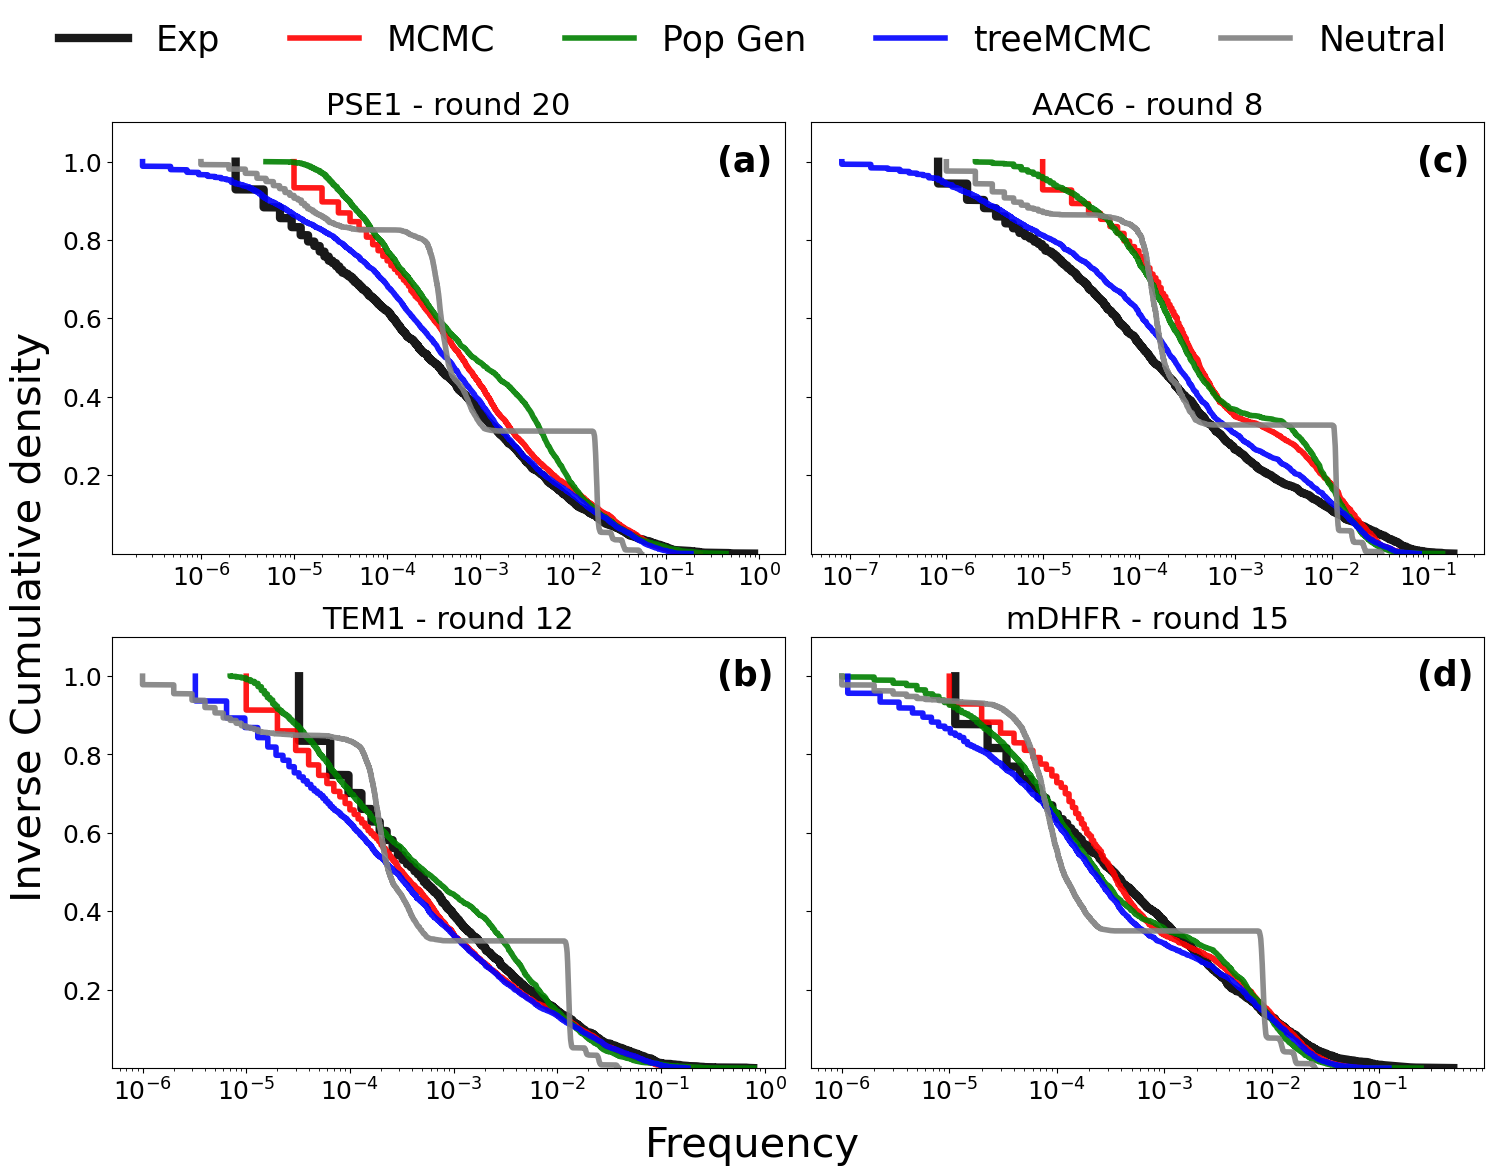

In [8]:
using PyPlot, CSV, DataFrames, JLD2, StatsBase

# --- Configurazione e Setup Dati ---
labels = ["Exp", "MCMC", "Pop Gen", "MCMC on tree", "Neutral"]
labels_true = ["Exp", "MCMC", "Pop Gen", "treeMCMC", "Neutral"]
colours = ["black", "red", "green", "blue", "grey"]
wt_names = ["PSE1 - round 20", "TEM1 - round 12", "AAC6 - round 8", "mDHFR - round 15"]
wt_names2 = ["PSE", "TEM", "AAC", "DHFR"]
data_folder = "../../data_directed_evolution/best_fit/sfs/"

# --- Implementazione PyPlot (2 Righe, 2 Colonne) ---

fig, axs = subplots(2, 2, figsize=(15, 12), sharey=true) 
axs_flat = reshape(axs, 4)

PyPlot.rc("xtick", labelsize=18)
PyPlot.rc("ytick", labelsize=18)

line_width = 4.0 
alpha_value = 0.9
subplot_labels = ["(a)", "(b)", "(c)", "(d)"]

# --- Loop Principale ---

for i in 1:4
    ax = axs_flat[i]
    wt_name = wt_names2[i]
    
    for (j, lbl) in enumerate(labels)
        try
            file = joinpath(data_folder, "filtered_freqs_$(wt_name)_$(lbl).jld2")
            data_dict = JLD2.load(file)
            vals = data_dict["freqs"]
            
            # 1. Preparazione dati per CDF
            # Ordiniamo i valori in senso crescente
            sorted_vals = sort(vals[vals .> 0])
            
            # 2. Calcolo della CDF empirica
            # La probabilità cumulativa va da 1/N a 1.0
            n = length(sorted_vals)
            cdf_y = (1:n) ./ n
            
            # 3. Plot come Linea (CDF)
            current_lw = (lbl == "Exp") ? (line_width + 2.0) : line_width
            
            ax.plot(sorted_vals, 1 .- cdf_y, 
                    linewidth=current_lw, 
                    alpha=alpha_value, 
                    label=labels_true[j], 
                    color=colours[j])

        catch e
            println("Errore nel caricamento di $wt_name - $lbl: $e")
        end
    end
    
    # --- Formattazione Subplot ---
    
    ax.set_xscale("log")
    # Nota: Spesso la CDF si guarda bene con Y lineare, 
    # ma se vuoi vedere i dettagli della "coda", tieni log
    #ax.set_yscale("log") 
    
    ax.set_ylim(10^-5, 1.1)
    #ax.set_ylim(10^-4, 1.05) # Range tipico per CDF in log-scale
    
    ax.set_title(wt_names[i], fontsize=22)
    
    # Etichetta (a, b, c, d)
    ax.text(0.9, 0.95, subplot_labels[i], 
            transform=ax.transAxes,
            fontsize=25, fontweight="bold", va="top", ha="left")
end

# --- Etichette e Legenda ---

fig.text(0.5, 0.05, "Frequency", ha="center", fontsize=30)
fig.text(0.005, 0.5, "Inverse Cumulative density", va="center", rotation="vertical", fontsize=30)

handles, labels_plt = axs_flat[1].get_legend_handles_labels()
fig.legend(handles, labels_plt, loc="upper center", ncol=5,
           bbox_to_anchor=(0.5, 1.02), fontsize=25, frameon=false)

tight_layout(rect=[0.03, 0.08, 1, 0.95]) 
savefig("../../Fig4_cdf.pdf")

show()

## Fig 4 DNA

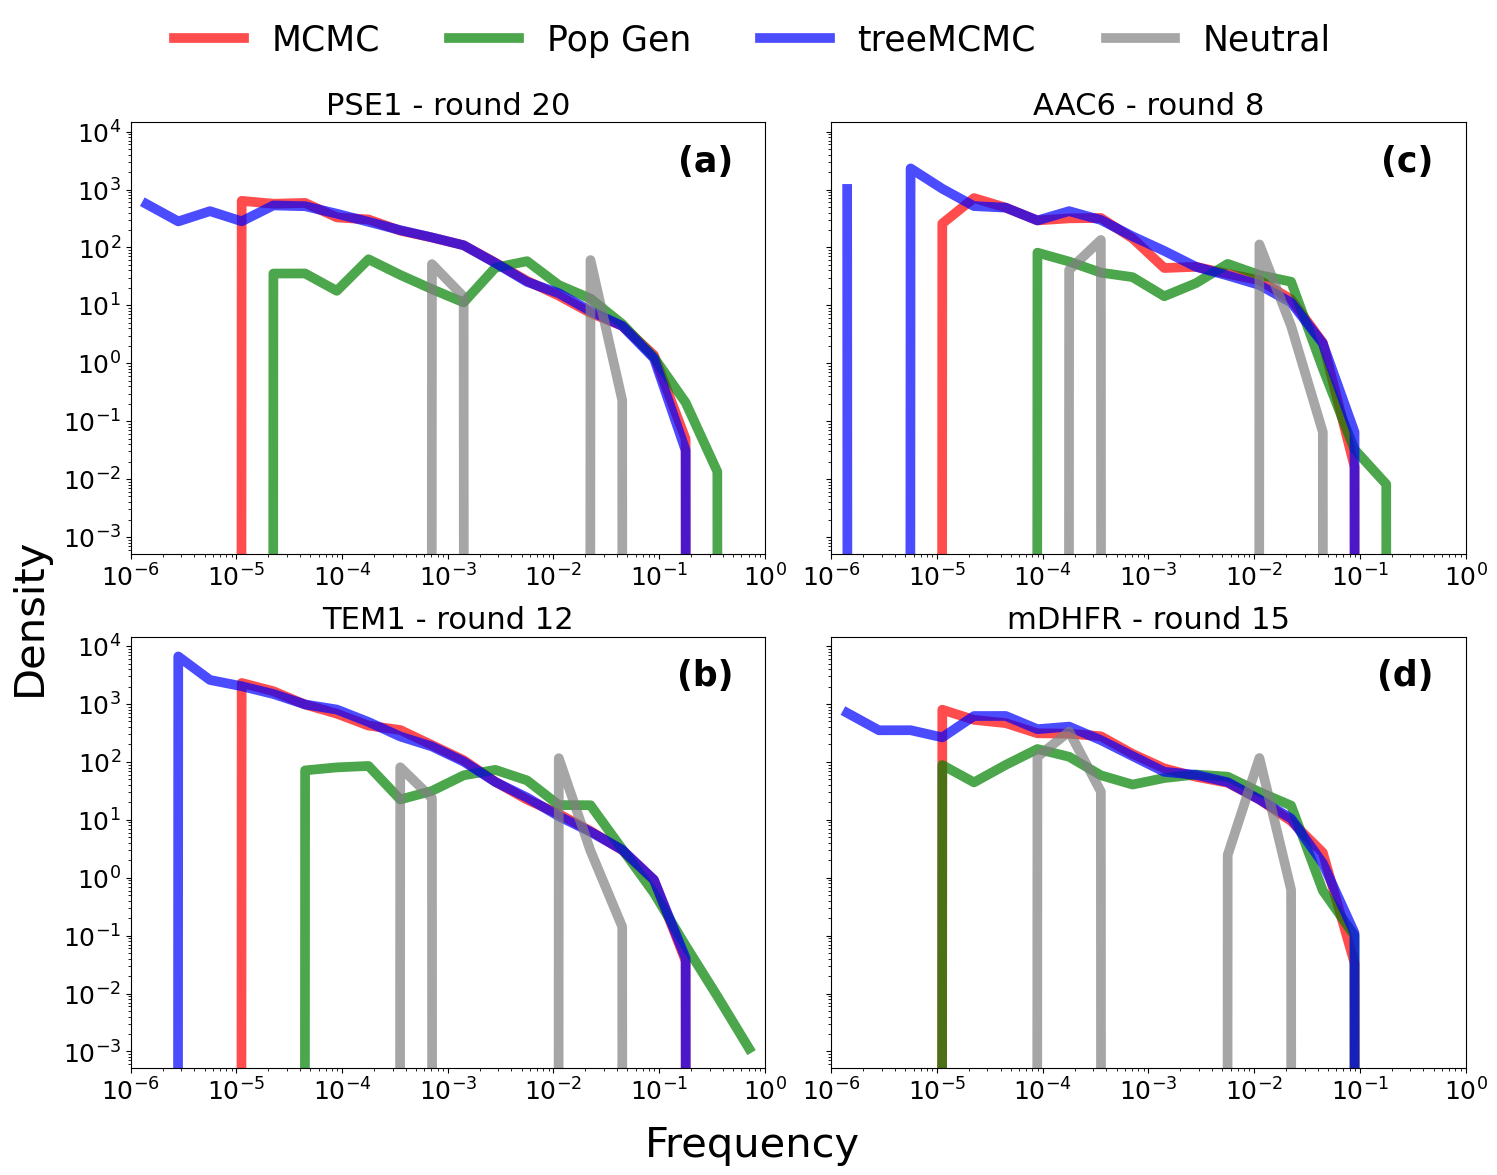

In [11]:
using PyPlot, CSV, DataFrames, JLD2, StatsBase

# --- Configurazione e Setup Dati ---

labels = ["MCMC", "Pop Gen", "MCMC on tree", "Neutral"]
labels_true = ["MCMC", "Pop Gen", "treeMCMC", "Neutral"]
colours = ["red", "green", "blue", "grey"]
wt_names = ["PSE1 - round 20", "TEM1 - round 12", "AAC6 - round 8", "mDHFR - round 15"]
wt_names2 = ["PSE", "TEM", "AAC", "DHFR"]
data_folder = "../../data_directed_evolution/best_fit/sfs/"

# --- Implementazione PyPlot (2 Righe, 2 Colonne) ---

fig, axs = subplots(2, 2, figsize=(15, 12), sharey=true) 
axs_flat = reshape(axs, 4)

# Impostazione globale parametri grafici
PyPlot.rc("xtick", labelsize=18)
PyPlot.rc("ytick", labelsize=18)

line_width = 7.0 
alpha_value = 0.7
subplot_labels = ["(a)", "(b)", "(c)", "(d)"]

# --- Loop Principale ---

for i in 1:4
    ax = axs_flat[i]
    wt_name = wt_names2[i]
    
    # 1. Definizione Bin Logaritmici per il calcolo
    num_bins = 20
    log_bins = 10 .^ range(-6, 0, length=num_bins + 1)
    
    # Calcolo dei centri dei bin (media geometrica per scala log)
    # x = sqrt(limite_inferiore * limite_superiore)
    bin_centers = [sqrt(log_bins[k] * log_bins[k+1]) for k in 1:num_bins]
    
    for (j, lbl) in enumerate(labels)
        try
            # Caricamento file JLD2
            file = joinpath(data_folder, "filtered_freqs_dna_$(wt_name)_$(lbl).jld2")
            data_dict = JLD2.load(file)
            vals = data_dict["freqs"]
            
            # Filtro valori positivi per log-scale
            clean_vals = vals[vals .> 0]

            # 2. Calcolo manuale dell'istogramma (Densità)
            # Usiamo StatsBase per fittare i dati nei bin logaritmici
            h = fit(Histogram, clean_vals, log_bins)
            
            # Normalizzazione per ottenere la densità (PDF)
            # densità = conteggi / (totale * ampiezza_bin)
            bin_widths = diff(log_bins)
            total_counts = sum(h.weights)
            density = h.weights ./ (total_counts .* bin_widths)

            # 3. Plot come Linea Continua
            current_lw = (lbl == "Exp") ? (line_width + 2.0) : line_width
            
            ax.plot(bin_centers, density, 
                    linewidth=current_lw, 
                    alpha=alpha_value, 
                    label=labels_true[j], 
                    color=colours[j])

        catch e
            println("Errore nel caricamento di $wt_name - $lbl: $e")
        end
    end
    
    # --- Formattazione Subplot ---
    
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(10^-6, 1.0)
    
    # Impostiamo un limite minimo per la Y se necessario per vedere bene le linee
    #ax.set_ylim(bottom=10^-1)
    
    ax.set_title(wt_names[i], fontsize=22)
    
    # Etichetta (a, b, c, d)
    ax.text(0.95, 0.95, subplot_labels[i], 
            transform=ax.transAxes,
            fontsize=25, fontweight="bold", va="top", ha="right")
end

# --- Etichette e Legenda ---

fig.text(0.5, 0.05, "Frequency", ha="center", fontsize=30)
fig.text(0.005, 0.5, "Density", va="center", rotation="vertical", fontsize=30)

handles, labels_plt = axs_flat[1].get_legend_handles_labels()
fig.legend(handles, labels_plt, loc="upper center", ncol=5,
           bbox_to_anchor=(0.5, 1.02), fontsize=25, frameon=false)

tight_layout(rect=[0.03, 0.08, 1, 0.95]) 
savefig("../../Fig4_dna.pdf")

show()

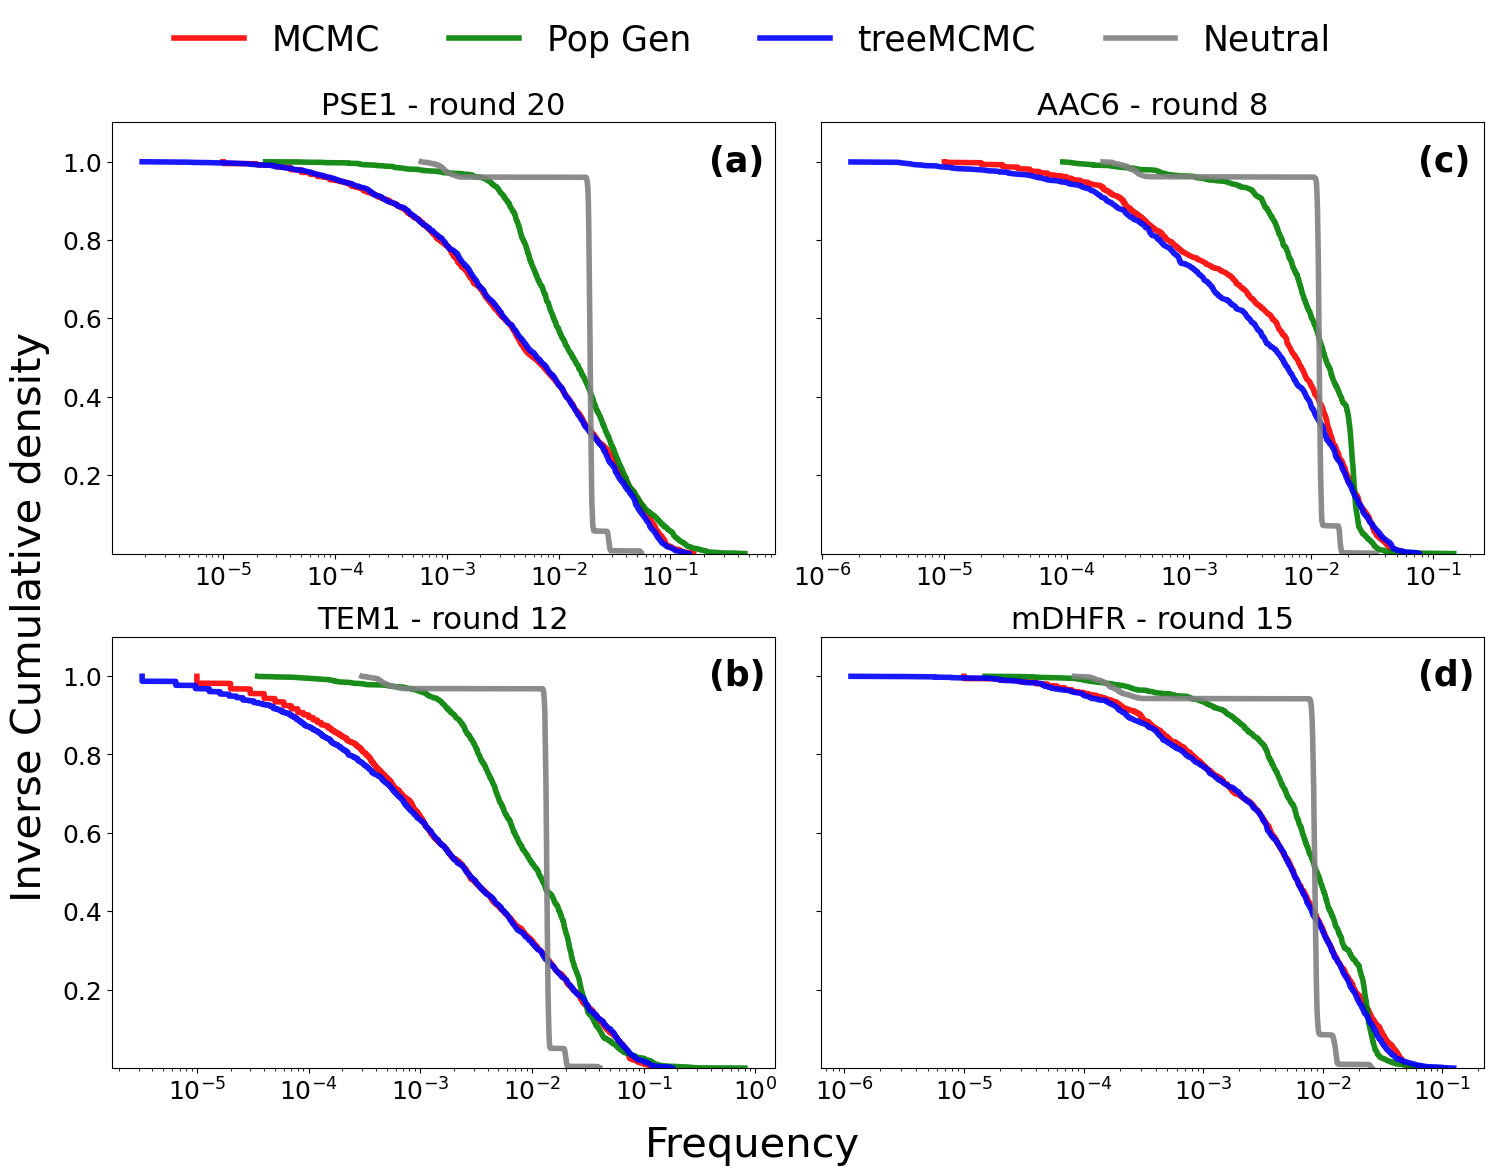

In [12]:
using PyPlot, CSV, DataFrames, JLD2, StatsBase

# --- Configurazione e Setup Dati ---

labels = ["MCMC", "Pop Gen", "MCMC on tree", "Neutral"]
colours = ["red", "green", "blue", "grey"]
wt_names = ["PSE1 - round 20", "TEM1 - round 12", "AAC6 - round 8", "mDHFR - round 15"]
wt_names2 = ["PSE", "TEM", "AAC", "DHFR"]
data_folder = "../../data_directed_evolution/best_fit/sfs/"

# --- Implementazione PyPlot (2 Righe, 2 Colonne) ---

fig, axs = subplots(2, 2, figsize=(15, 12), sharey=true) 
axs_flat = reshape(axs, 4)

PyPlot.rc("xtick", labelsize=18)
PyPlot.rc("ytick", labelsize=18)

line_width = 4.0 
alpha_value = 0.9
subplot_labels = ["(a)", "(b)", "(c)", "(d)"]

# --- Loop Principale ---

for i in 1:4
    ax = axs_flat[i]
    wt_name = wt_names2[i]
    
    for (j, lbl) in enumerate(labels)
        try
            file = joinpath(data_folder, "filtered_freqs_dna_$(wt_name)_$(lbl).jld2")
            data_dict = JLD2.load(file)
            vals = data_dict["freqs"]
            
            # 1. Preparazione dati per CDF
            # Ordiniamo i valori in senso crescente
            sorted_vals = sort(vals[vals .> 0])
            
            # 2. Calcolo della CDF empirica
            # La probabilità cumulativa va da 1/N a 1.0
            n = length(sorted_vals)
            cdf_y = (1:n) ./ n
            
            # 3. Plot come Linea (CDF)
            current_lw = (lbl == "Exp") ? (line_width + 2.0) : line_width
            
            ax.plot(sorted_vals, 1 .- cdf_y, 
                    linewidth=current_lw, 
                    alpha=alpha_value, 
                    label=labels_true[j], 
                    color=colours[j])

        catch e
            println("Errore nel caricamento di $wt_name - $lbl: $e")
        end
    end
    
    # --- Formattazione Subplot ---
    
    ax.set_xscale("log")
    # Nota: Spesso la CDF si guarda bene con Y lineare, 
    # ma se vuoi vedere i dettagli della "coda", tieni log
    #ax.set_yscale("log") 
    
    ax.set_ylim(10^-5, 1.1)
    #ax.set_ylim(10^-4, 1.05) # Range tipico per CDF in log-scale
    
    ax.set_title(wt_names[i], fontsize=22)
    
    # Etichetta (a, b, c, d)
    ax.text(0.9, 0.95, subplot_labels[i], 
            transform=ax.transAxes,
            fontsize=25, fontweight="bold", va="top", ha="left")
end

# --- Etichette e Legenda ---

fig.text(0.5, 0.05, "Frequency", ha="center", fontsize=30)
fig.text(0.005, 0.5, "Inverse Cumulative density", va="center", rotation="vertical", fontsize=30)

handles, labels_plt = axs_flat[1].get_legend_handles_labels()
fig.legend(handles, labels_plt, loc="upper center", ncol=5,
           bbox_to_anchor=(0.5, 1.02), fontsize=25, frameon=false)

tight_layout(rect=[0.03, 0.08, 1, 0.95]) 
savefig("../../Fig4_dna_cdf.pdf")

show()

## Fig 5

In [ ]:
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta

ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta, cod2amino
using PyPlot



function compute_emerging_trajectories_sil(steps::Vector{Int}, msas, wt_name::String)
       # 2. Compute frequency vectors for each MSA
    f1_list = []
    for msa in msas
        f1_vec, _ = compute_weighted_frequencies(Int8.(msa), 22, 0.)
        push!(f1_list, f1_vec[:])
    end

    # 3. Stack into a matrix (n_steps × n_freqs)
    f1_matrix = reduce(vcat, (permutedims(v) for v in f1_list))

    # 4. Select emerging trajectories
    keep = [
        let traj = f1_matrix[:, j]
            traj[1] < 0.1 && maximum(traj) >= 0.1
        end
        for j in 1:size(f1_matrix, 2)
    ]

    selected = f1_matrix[:, keep]

    return selected
end


wt_name = "TEM"
Nseqs = 10^5
file_wt = "../data_directed_evolution/TEM1_pfam_DNA.fasta"
file_model = "../model_natural_PSE.dat"

# Read model parameters
println("Reading model parameters")
if wt_name == "AAC" || wt_name == "DHFR"
    	h_tmp, J_tmp = read_par_BM_0gapsave(file_model)
else
	h_tmp, J_tmp = read_par_BM_lettersave(file_model)
end
h = set_max_field_to_0save(h_tmp);
J_tmp2 = symmetrize_Jsave(J_tmp); 
J = permutedims(J_tmp2, [1,3,2,4]);



# Reading sequences in the seed
println("Reading sequences in the seed")
wt = join(readdlm(file_wt, skipstart = 1));
L_big = round(Int,length(wt)/3)
if wt_name == "AAC" || wt_name == "DHFR"
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
else
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
end
wt_seq = [cod2amino[x] for x in wt_DNA_seq];


# Performing evolution and writing files
println("Performing evolution and writing files")


Nsteps = 5*120
temp = 1.3
rounds = 20
start_msa = hcat([wt_DNA_seq for i in 1:Nseqs]...); 
mcmc = run_evolution(start_msa, 
    h, 
    J,
    p = 0., 
    temp = temp, 
    N_steps = Nsteps, 
    each_step = 6,
    verbose = false);

popgen = Genie.run_dir_evol_nucleo(wt_DNA_seq, Nseqs, h, J;
                   rounds = 5*rounds,
                   each_step = 1,
                   seq_reads = Nseqs,
                   temp = 12.0,
                   mu = 0.03,
                   mu_bind = -50.0);


traj_mcmc = compute_emerging_trajectories_sil([i for i in 1:rounds], mcmc.step_msa, wt_name)
traj_popgen = compute_emerging_trajectories_sil([i for i in 1:rounds], popgen.step_msa, wt_name)

x_vals = [i for i in 1:100]
@save "../popgen_fig5_data.jld2" x_vals traj_mcmc traj_popgen

@load "../popgen_fig5_data.jld2"





✅ Figura combinata (1x2) salvata come ../../Fig5.pdf


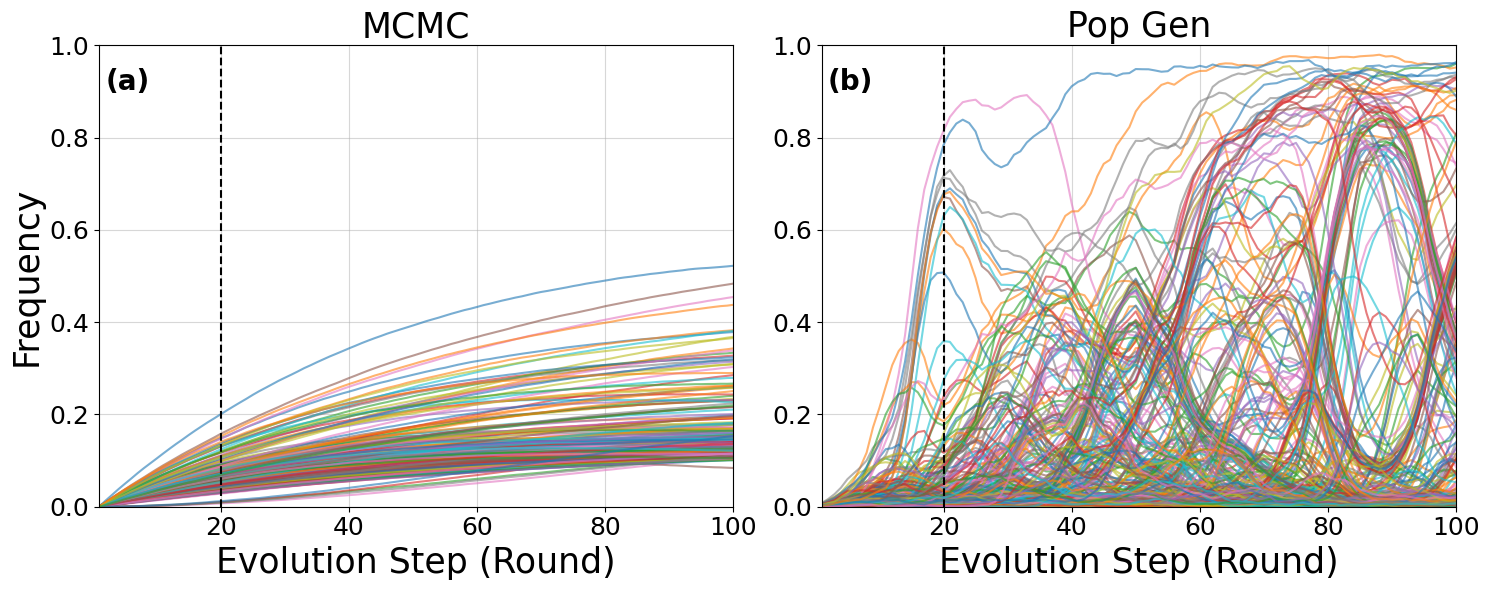

In [13]:
using JLD2, PyPlot, LinearAlgebra, Statistics

# Caricamento dati
@load "../../popgen_fig5_data.jld2"

# --- LOGICA DI PLOTTING ---

threshold = 0.1
steps = x_vals

# 1. Setup della figura: 1 riga, 2 colonne
# Ho invertito la figsize a (15, 6) per renderla adatta al formato orizzontale
fig, axs = subplots(1, 2, figsize=(15, 6)) 

# Set global figure style
PyPlot.rc("xtick", labelsize=14)
PyPlot.rc("ytick", labelsize=14)
PyPlot.rc("axes", labelsize=16, titlesize=18)
PyPlot.rc("legend", fontsize=12)

# --- Subplot 1: MCMC Trajectories (Sinistra) ---
ax1 = axs[1]
f1_matrix_mcmc = traj_mcmc
n_steps, n_freqs = size(f1_matrix_mcmc)

for j in 1:n_freqs
    traj = f1_matrix_mcmc[:, j]
    if maximum(traj) >= threshold
        ax1.plot(steps, traj, alpha=0.6, linewidth=1.5)
    end
end

ax1.plot([20, 20], [0., 1.], color = "black", linestyle = "--")
ax1.set_title("MCMC", fontsize = 25)
ax1.set_xlabel("Evolution Step (Round)", fontsize = 25) # Aggiunto xlabel anche qui
#ax1.set_ylabel("Frequency")
ax1.set_ylim(0.0, 1.0)
ax1.set_xlim(minimum(steps), maximum(steps))
ax1.text(0.01, 0.95, "(a)", transform=ax1.transAxes, fontsize=20, fontweight="bold", va="top")
ax1.grid(true, alpha=0.5)


# --- Subplot 2: PopGen Trajectories (Destra) ---
ax2 = axs[2]
f1_matrix_popgen = traj_popgen
n_steps, n_freqs = size(f1_matrix_popgen)

for j in 1:n_freqs
    traj = f1_matrix_popgen[:, j]
    if maximum(traj) >= threshold
        ax2.plot(steps, traj, alpha=0.6, linewidth=1.5)
    end
end

ax2.plot([20, 20], [0., 1.], color = "black", linestyle = "--")
ax2.set_title("Pop Gen", fontsize = 25)
ax2.set_xlabel("Evolution Step (Round)", fontsize = 25)
ax1.set_ylabel("Frequency", fontsize = 25)
ax2.set_ylim(0.0, 1.0)
ax2.set_xlim(minimum(steps), maximum(steps))
ax2.text(0.01, 0.95, "(b)", transform=ax2.transAxes, fontsize=20, fontweight="bold", va="top")
ax2.grid(true, alpha=0.5)

# Regolazione finale del layout
tight_layout()

filename = "../../Fig5.pdf"
savefig(filename)

println("✅ Figura combinata (1x2) salvata come $(filename)")

## Mutation dynamics experiments

In [28]:

ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFiles
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFilesusing Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta
using PyPlot

#msas = [read_fasta_alignment(
 #       "../data_directed_evolution/tem_round$(i)_noflankgaps_nodupl.fa", 0.9) for i in [1,6,12]]


steps = [1,2,3,4,5,15]
msas = [read_fasta_alignment(
        "../../data_directed_evolution/dhfr_round$(i)_noflankgaps_nodupl.fasta", 0.9) for i in steps]





function plot_evolving_frequencies(f1_matrix::AbstractMatrix, title_str::String; threshold=0.1)
    n_steps, n_freqs = size(f1_matrix)

    figure(figsize=(8,6))

    for j in 1:n_freqs
        traj = f1_matrix[:, j]   # frequency trajectory for freq j
        if maximum(traj) ≥ threshold
            plot(1:n_steps, traj, alpha=0.6)
        end
    end

    xlabel("Step", fontsize = 18)
    ylabel("Frequency",fontsize = 18)
    title(title_str, fontsize = 18)
    #grid(true)
    tight_layout()

    # Save figure
    filename = lowercase(replace(title_str, " " => "_"))
    savefig("$(filename)_trajectories.png", dpi=300)

    println("✅ Figure saved as $(filename)_trajectories.png in $(pwd())")

    show()
end



f1_exp = [];
for x in msas
    a,b = compute_weighted_frequencies(Int8.(x), 22, 0.)
    push!(f1_exp, a[:])
end

f1_exp = reduce(vcat, (permutedims(v) for v in f1_exp))  # matrix (steps × freqs)

plot_evolving_frequencies(f1_exp, "Exp")


θ = 0.0 threshold = 0.0
M = 10944 N = 159 Meff = 10944
θ = 0.0 threshold = 0.0
M = 9029 N = 159 Meff = 9029
θ = 0.0 threshold = 0.0
M = 6168 N = 159 Meff = 6168
θ = 0.0 threshold = 0.0
M = 11213 N = 159 Meff = 11213
θ = 0.0 threshold = 0.0
M = 6208 N = 159 Meff = 6208
θ = 0.0 threshold = 0.0
M = 88013 N = 160 Meff = 88013


LoadError: DimensionMismatch: number of columns of each array must match (got (3339, 3360))

In [33]:
using KitMSA, StatsBase, DCAUtils, PyPlot

function compute_emerging_trajectories(steps::Vector{Int}, paths::Vector{String}, wt_name::String; treshold = 0.01)
    @assert length(steps) == length(paths) "steps and paths must have the same length"

    ref_file = paths[1]
    wt = join(readdlm(ref_file, skipstart = 1))
    L_big = round(Int, length(wt) / 3)
    wt_DNA_seq = if wt_name == "AAC" || wt_name == "DHFR"
        [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big]
    else
        [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1]
    end
    L_sites = length(wt_DNA_seq)
    wt_seq = [KitMSA.cod2amino[x] for x in wt_DNA_seq]
    start_msa = hcat([wt_seq for _ in 1:10]...)
    print(size(start_msa))
    # 1. Load MSAs
    msas = []
    push!(msas, start_msa)

    for path in paths[2:end]
        push!(msas,read_fasta_alignment(path, 0.9))
    end
    # 2. Compute frequency vectors for each MSA
    f1_list = []
    for msa in msas
        f1_vec, _ = compute_weighted_frequencies(Int8.(msa), 22, 0.)
        push!(f1_list, f1_vec[:])
    end

    # 3. Stack into a matrix (n_steps × n_freqs)
    f1_matrix = reduce(vcat, (permutedims(v) for v in f1_list))

    # 4. Select emerging trajectories
    keep = [
        let traj = f1_matrix[:, j]
            traj[1] < 0.1 && maximum(traj) >= 0.1
        end
        for j in 1:size(f1_matrix, 2)
    ]

    selected = f1_matrix[:, keep]

    return selected
end

using PyPlot

function plot_evolving_frequencies(steps, f1_matrix::AbstractMatrix, wt_name::String)
    n_steps, n_freqs = size(f1_matrix)

    figure(figsize=(8,6))

    for j in 1:n_freqs
        traj = f1_matrix[:, j]
        # each traj already satisfies your emerging condition, so no extra filtering needed
        plot(steps, traj, alpha=0.6)
    end

    xlabel("Round", fontsize=18)
    ylabel("Mutant frequency", fontsize=18)
    title(wt_name, fontsize=18)
    tight_layout()

    
    outfile = "../$(wt_name)_trajectories.png"
    savefig(outfile, dpi=300)

    println("✅ Saved figure: $outfile")

    show()
end

# Base folder where all your MSA files are stored
data_folder = "../data_directed_evolution"

# --- TEM ---
wt_name = "TEM"
steps = [0,1,6,12]
files = [
    "TEM1_pfam_DNA.fasta",
    "tem_round1_noflankgaps_nodupl.fa",
    "tem_round6_noflankgaps_nodupl.fa",
    "tem_round12_noflankgaps_nodupl.fa"
]

paths = [joinpath(data_folder, f) for f in files]

traj = compute_emerging_trajectories(steps, paths, wt_name)
plot_evolving_frequencies(steps, traj, wt_name * " - Exp")

# --- PSE ---
wt_name = "PSE"
steps = [0,10,20]
files = [
    "PSE1_pfam_DNA.fasta",
    "pse_round10_noflankgaps_nodupl.fa",
    "pse_round20_noflankgaps_nodupl.fa"
]

paths = [joinpath(data_folder, f) for f in files]

traj = compute_emerging_trajectories(steps, paths, wt_name)
plot_evolving_frequencies(steps, traj, wt_name * " - Exp")

# --- DHFR ---
wt_name = "DHFR"
steps = [0,1,2,3,4,5,15]
files = [
    "mDHFR_pfam_DNA.fasta",
    "dhfr_round1_noflankgaps_nodupl.fasta",
    "dhfr_round2_noflankgaps_nodupl.fasta",
    "dhfr_round3_noflankgaps_nodupl.fasta",
    "dhfr_round4_noflankgaps_nodupl.fasta",
    "dhfr_round5_noflankgaps_nodupl.fasta",
    "dhfr_round15_noflankgaps_nodupl.fasta"
]

paths = [joinpath(data_folder, f) for f in files]

traj = compute_emerging_trajectories(steps, paths, wt_name)
plot_evolving_frequencies(steps, traj, wt_name * " - Exp")


(199, 10)θ = 0.0 threshold = 0.0
M = 10 N = 199 Meff = 10
θ = 0.0 threshold = 0.0
M = 108339 N = 199 Meff = 108339
θ = 0.0 threshold = 0.0
M = 97697 N = 199 Meff = 97697
θ = 0.0 threshold = 0.0
M = 30949 N = 199 Meff = 30949
✅ Saved figure: ../../TEM - Exp_trajectories.png
(199, 10)θ = 0.0 threshold = 0.0
M = 10 N = 199 Meff = 10
θ = 0.0 threshold = 0.0
M = 43082 N = 199 Meff = 43082
θ = 0.0 threshold = 0.0
M = 423798 N = 199 Meff = 423798
✅ Saved figure: ../../PSE - Exp_trajectories.png
(160, 10)θ = 0.0 threshold = 0.0
M = 10 N = 160 Meff = 10
θ = 0.0 threshold = 0.0
M = 10944 N = 159 Meff = 10944
θ = 0.0 threshold = 0.0
M = 9029 N = 159 Meff = 9029
θ = 0.0 threshold = 0.0
M = 6168 N = 159 Meff = 6168
θ = 0.0 threshold = 0.0
M = 11213 N = 159 Meff = 11213
θ = 0.0 threshold = 0.0
M = 6208 N = 159 Meff = 6208


LoadError: DimensionMismatch: number of columns of each array must match (got (3360, 3339))

In [ ]:
function compute_emerging_trajectories_sil(steps::Vector{Int}, msas, wt_name::String)
       # 2. Compute frequency vectors for each MSA
    f1_list = []
    for msa in msas
        f1_vec, _ = compute_weighted_frequencies(Int8.(msa), 22, 0.)
        push!(f1_list, f1_vec[:])
    end

    # 3. Stack into a matrix (n_steps × n_freqs)
    f1_matrix = reduce(vcat, (permutedims(v) for v in f1_list))

    # 4. Select emerging trajectories
    keep = [
        let traj = f1_matrix[:, j]
            traj[1] < 0.1 && maximum(traj) >= 0.1
        end
        for j in 1:size(f1_matrix, 2)
    ]

    selected = f1_matrix[:, keep]

    return selected
end


In [ ]:
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta

ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta, cod2amino
using PyPlot



function compute_emerging_trajectories_sil(steps::Vector{Int}, msas, wt_name::String)
       # 2. Compute frequency vectors for each MSA
    f1_list = []
    for msa in msas
        f1_vec, _ = compute_weighted_frequencies(Int8.(msa), 22, 0.)
        push!(f1_list, f1_vec[:])
    end

    # 3. Stack into a matrix (n_steps × n_freqs)
    f1_matrix = reduce(vcat, (permutedims(v) for v in f1_list))

    # 4. Select emerging trajectories
    keep = [
        let traj = f1_matrix[:, j]
            traj[1] < 0.1 && maximum(traj) >= 0.1
        end
        for j in 1:size(f1_matrix, 2)
    ]

    selected = f1_matrix[:, keep]

    return selected
end


wt_name = "TEM"
Nseqs = 10^5
file_wt = "../data_directed_evolution/TEM1_pfam_DNA.fasta"
file_model = "../model_natural_PSE.dat"

# Read model parameters
println("Reading model parameters")
if wt_name == "AAC" || wt_name == "DHFR"
    	h_tmp, J_tmp = read_par_BM_0gapsave(file_model)
else
	h_tmp, J_tmp = read_par_BM_lettersave(file_model)
end
h = set_max_field_to_0save(h_tmp);
J_tmp2 = symmetrize_Jsave(J_tmp); 
J = permutedims(J_tmp2, [1,3,2,4]);



# Reading sequences in the seed
println("Reading sequences in the seed")
wt = join(readdlm(file_wt, skipstart = 1));
L_big = round(Int,length(wt)/3)
if wt_name == "AAC" || wt_name == "DHFR"
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
else
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
end
wt_seq = [cod2amino[x] for x in wt_DNA_seq];


# Performing evolution and writing files
println("Performing evolution and writing files")


Nsteps = 5*120
temp = 1.3
rounds = 20
start_msa = hcat([wt_DNA_seq for i in 1:Nseqs]...); 
mcmc = run_evolution(start_msa, 
    h, 
    J,
    p = 0., 
    temp = temp, 
    N_steps = Nsteps, 
    each_step = 6,
    verbose = false);

popgen = Genie.run_dir_evol_nucleo(wt_DNA_seq, Nseqs, h, J;
                   rounds = 5*rounds,
                   each_step = 1,
                   seq_reads = Nseqs,
                   temp = 12.0,
                   mu = 0.03,
                   mu_bind = -50.0);


traj_mcmc = compute_emerging_trajectories_sil([i for i in 1:rounds], mcmc.step_msa, wt_name)
traj_popgen = compute_emerging_trajectories_sil([i for i in 1:rounds], popgen.step_msa, wt_name)


plot_evolving_frequencies([i for i in 1:rounds], traj_mcmc, wt_name * " - MCMC")
plot_evolving_frequencies([i for i in 1:rounds], traj_popgen, wt_name * " - PopGen (all)")

exp_rounds = [0,10,20]
traj_sub = zeros(rounds+1,size(traj_popgen,2))
traj_sub[2:end,:] .= traj_popgen
plot_evolving_frequencies(exp_rounds, traj_sub[exp_rounds .+ 1,:], wt_name * " - PopGen (sub)")


wt_name = "TEM"
Nseqs = 10^5
file_wt = "../../data_directed_evolution/TEM1_pfam_DNA.fasta"
file_model = "../model_natural_PSE.dat"

# Read model parameters
println("Reading model parameters")
if wt_name == "AAC" || wt_name == "DHFR"
    	h_tmp, J_tmp = read_par_BM_0gapsave(file_model)
else
	h_tmp, J_tmp = read_par_BM_lettersave(file_model)
end
h = set_max_field_to_0save(h_tmp);
J_tmp2 = symmetrize_Jsave(J_tmp); 
J = permutedims(J_tmp2, [1,3,2,4]);

# Reading sequences in the seed
println("Reading sequences in the seed")
wt = join(readdlm(file_wt, skipstart = 1));
L_big = round(Int,length(wt)/3)
if wt_name == "AAC" || wt_name == "DHFR"
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
else
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
end
wt_seq = [cod2amino[x] for x in wt_DNA_seq];


# Performing evolution and writing files
println("Performing evolution and writing files")


Nsteps = 95
temp = 1.1
rounds = 12
start_msa = hcat([wt_DNA_seq for i in 1:Nseqs]...); 
mcmc = run_evolution(start_msa, 
    h, 
    J,
    p = 0., 
    temp = temp, 
    N_steps = Nsteps, 
    each_step = round(Int, Nsteps/rounds),
    verbose = false);

popgen = Genie.run_dir_evol_nucleo(wt_DNA_seq, Nseqs, h, J;
                   rounds = rounds,
                   each_step = 1,
                   seq_reads = Nseqs,
                   temp = 6.0,
                   mu = 0.035,
                   mu_bind = -50.0);


traj_mcmc = compute_emerging_trajectories_sil([i for i in 1:rounds], mcmc.step_msa, wt_name)
traj_popgen = compute_emerging_trajectories_sil([i for i in 1:rounds], popgen.step_msa, wt_name)
plot_evolving_frequencies([i for i in 1:rounds], traj_mcmc, wt_name * " - MCMC")
plot_evolving_frequencies([i for i in 1:rounds], traj_popgen, wt_name * " - PopGen (all)")

exp_rounds = [0,1,6,12]
traj_sub = zeros(rounds+1,size(traj_popgen,2))
traj_sub[2:end,:] .= traj_popgen
plot_evolving_frequencies(exp_rounds, traj_sub[exp_rounds .+ 1,:], wt_name * " - PopGen (sub)")











In [ ]:
transition_codons = create_nested_codon_dict_no_same()

function syn_nonsyn(codon1::String, codon2::String)
    count = 0
    if cod2amino[codon1] !== cod2amino[codon2]
        count+=1
    end
    return count
end

function nonsyn_dist(codonseq1::Vector{String}, codonseq2::Vector{String})
    return sum([syn_nonsyn(codonseq1[i], codonseq2[i]) for i in 1:length(codonseq1)])
end

function nonsyn_dist(codon_seq::Vector{String}, codon_msa::Matrix{String})
    return [nonsyn_dist(codon_seq, codon_msa[:,i]) for i in 1:size(codon_msa,2)]
end

function nucleo_dist(cod1::String, cod2::String)
    return sum(collect(cod1) .!= collect(cod2))
end

function nucleo_dist(codseq1::Vector{String}, codseq2::Vector{String})
    return [nucleo_dist(codseq1[i], codseq2[i]) for i in 1:length(codseq1)]
end

d_non_popgen = nonsyn_dist(wt_DNA_seq, popgen.step_msa_dna[end]);
d_non_mcmc = nonsyn_dist(wt_DNA_seq, mcmc.step_msa_dna[end]);


function codon_neighbors_nosame()
    codons = ["A", "C", "G", "T"]
    codon_dict = Dict{String, Vector{String}}()

    for a in codons, b in codons, c in codons
        old_codon = string(a, b, c)
        if old_codon != "TAA" && old_codon != "TAG" && old_codon != "TGA" 
            codon_list = String[]
        
            for i in 1:3
                for nucl in codons
                    if nucl != old_codon[i]
                        new_codon = string(old_codon[1:i-1], nucl, old_codon[i+1:end])
                        if new_codon != "TAA" && new_codon != "TAG" && new_codon != "TGA" && new_codon != old_codon
                            push!(codon_list, new_codon)
                        end
                    end
                end
            end
            codon_dict[old_codon] = unique(codon_list)
        end
    end

    return codon_dict
end

function syn_positions(dnaseq)
    transition_codons = codon_neighbors_nosame()
    new_codons = [transition_codons[cod] for cod in dnaseq]
    count = 0; 
    for i in 1:length(dnaseq)
        if dnaseq[i] in [cod2amino[x] for x in new_codons[i]]
            count+=1
        end
    end
    return count
end

    

    

In [2]:
using JLD2

In [3]:
function plot_evolving_frequencies(f1_matrix::AbstractMatrix, title_str::String; threshold=0.1)
    n_steps, n_freqs = size(f1_matrix)

    figure(figsize=(8,6))

    for j in 1:n_freqs
        traj = f1_matrix[:, j]   # frequency trajectory for freq j
        if maximum(traj) ≥ threshold
            plot(1:n_steps, traj, alpha=0.6)
        end
    end

    xlabel("Step", fontsize = 18)
    ylabel("Frequency",fontsize = 18)
    title(title_str, fontsize = 18)
    #grid(true)
    tight_layout()

    # Save figure
    filename = lowercase(replace(title_str, " " => "_"))
    savefig("$(filename)_trajectories.png", dpi=300)

    println("✅ Figure saved as $(filename)_trajectories.png in $(pwd())")

    show()
end

plot_evolving_frequencies (generic function with 1 method)

In [4]:
@load "../../traj_graph_abstract_popgen.jld2"

2-element Vector{Symbol}:
 :traj_mcmc
 :traj_popgen

✅ Figure saved as traj_graph_abstract_arrows.png in /home/disat/ldibari/Genie.jl/popgen


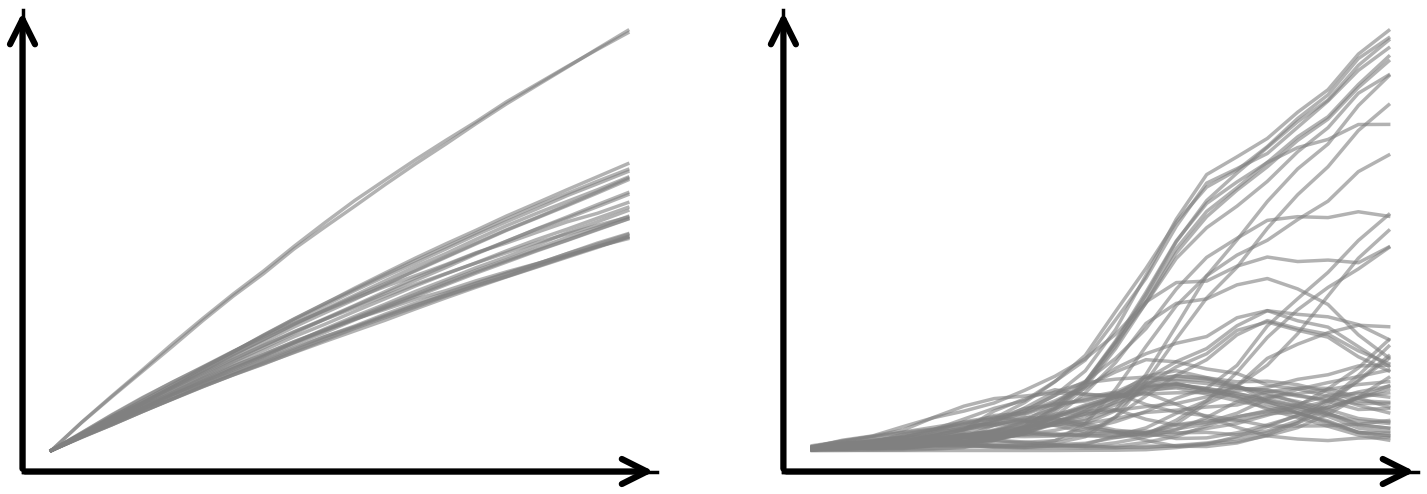

In [26]:
using PyPlot

threshold = 0.11
n_steps, n_freqs_A = size(traj_mcmc)
_, n_freqs_B = size(traj_popgen)

figure(figsize=(18,6))

# Common spine/axis formatting function with arrows
function format_axes_with_arrows(ax; arrow_size=20)
    # Remove top and right spines
    ax[:spines]["top"].set_visible(false)
    ax[:spines]["right"].set_visible(false)
    # Thicken bottom and left spines
    ax[:spines]["bottom"].set_linewidth(2.5)
    ax[:spines]["left"].set_linewidth(2.5)
    # Remove ticks
    ax[:tick_params](bottom=false, left=false, labelbottom=false, labelleft=false)
    
    # Add arrows
    xlim = ax[:get_xlim]()
    ylim = ax[:get_ylim]()
    
    # x-axis arrow
    ax[:annotate]("", xy=(xlim[2], ylim[1]), xytext=(xlim[1], ylim[1]),
                  arrowprops=Dict(:arrowstyle=>"->", :lw=>4.5, :color=>"black",
                  :mutation_scale=>45))
    # y-axis arrow
    ax[:annotate]("", xy=(xlim[1], ylim[2]), xytext=(xlim[1], ylim[1]),
                  arrowprops=Dict(:arrowstyle=>"->", :lw=>4.5, :color=>"black",
                  :mutation_scale=>45  ))
end

# Panel A
ax1 = subplot(1,2,1)
for j in 1:n_freqs_A
    traj = traj_mcmc[:, j]
    if maximum(traj) ≥ threshold
        plot(1:n_steps, traj, alpha=0.6, linewidth=2.5, color="grey")
    end
end

format_axes_with_arrows(ax1)

# Panel B
ax2 = subplot(1,2,2)
for j in 1:n_freqs_B
    traj = traj_popgen[:, j]
    if maximum(traj) ≥ threshold
        plot(1:n_steps, traj, alpha=0.6, linewidth=2.5, color="grey")
    end
end

format_axes_with_arrows(ax2)

# Tight layout, subplots close
#tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

# Save figure
savefig("../../traj_graph_abstract_arrows.png", dpi=300)
println("✅ Figure saved as traj_graph_abstract_arrows.png in $(pwd())")

show()


## Fig S2

In [1]:


ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFiles
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFiles
using Revise, Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta, cod2amino
using PyPlot
using StatsBase



wt_name = "TEM"
Nseqs = 10^5
file_wt = "../data_directed_evolution/TEM1_pfam_DNA.fasta"
file_model = "../model_natural_PSE.dat"

# Read model parameters
println("Reading model parameters")
if wt_name == "AAC" || wt_name == "DHFR"
    	h_tmp, J_tmp = read_par_BM_0gapsave(file_model)
else
	h_tmp, J_tmp = read_par_BM_lettersave(file_model)
end
h = set_max_field_to_0save(h_tmp);
J_tmp2 = symmetrize_Jsave(J_tmp); 
J = permutedims(J_tmp2, [1,3,2,4]);

# Reading sequences in the seed
println("Reading sequences in the seed")
wt = join(readdlm(file_wt, skipstart = 1));
L_big = round(Int,length(wt)/3)
if wt_name == "AAC" || wt_name == "DHFR"
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
else
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
end
wt_seq = [cod2amino[x] for x in wt_DNA_seq];



function codon_to_amino_min_dist(cod1::String, amino::Int)
    return minimum([Genie.cod_dist(cod1, KitMSA.amino2cod[amino][i]) for i in 1:length(KitMSA.amino2cod[amino])])
end

function codon_to_amino_mean_dist(cod1::String, amino::Int)
    return mean([Genie.cod_dist(cod1, KitMSA.amino2cod[amino][i]) for i in 1:length(KitMSA.amino2cod[amino])])
end


function codon_dist_from_msa(dna_seq::Vector; q::Int = 21)
    L = length(dna_seq)
    res = zeros(q,L)

    for a in 1:q
        for i in 1:L
            res[a,i] = codon_to_amino_mean_dist(dna_seq[i], a)
        end
    end

    return res
end


d_nucl = codon_dist_from_msa(wt_DNA_seq)

msa_clean = read_fasta_alignment("../TEM1_var_MSA_clean.fasta", 0.9)
msa = read_fasta_alignment("../data_directed_evolution/tem_round12_noflankgaps_nodupl.fa", 0.9);
popgen_msa = read_fasta_alignment("../data_directed_evolution/best_fit/TEM_popgen_samples100000_T6.0_mu0.035_mubind-50.0_pairs10000.fa", 0.9)
mcmc_msa = read_fasta_alignment("../data_directed_evolution/best_fit/TEM_mcmc_samples100000_T1.1_steps95_pairs10000.fa", 0.9)
mcmctree_msa = read_fasta_alignment("../data_directed_evolution/best_fit/TEM_mcmctree_T1.1_steps100_pairs10000.fa", 0.9)
neutral_msa = read_fasta_alignment("../data_directed_evolution/best_fit/TEM_neutral_samples100000_T0.0_mu0.014_mubind0.0_pairs10000.fa", 0.9)

f1,f2 = compute_weighted_frequencies(msa, 22, 0.); f1_exp = reshape(f1, 21, 199)
f1,f2 = compute_weighted_frequencies(popgen_msa, 22, 0.); f1_popgen = reshape(f1, 21, 199)
f1,f2 = compute_weighted_frequencies(mcmc_msa, 22, 0.); f1_mcmc = reshape(f1, 21, 199)
f1,f2 = compute_weighted_frequencies(mcmctree_msa, 22, 0.); f1_mcmctree = reshape(f1, 21, 199)
f1,f2 = compute_weighted_frequencies(neutral_msa, 22, 0.); f1_neutral = reshape(f1, 21, 199)

mask = ones(21, 199); for (i,a) in enumerate(wt_seq)  mask[a,i] = 0 end; mask = Bool.(mask)


d = ham_dist(wt_seq, msa_clean)
df_full = readdlm("../TEM1_var_fit.txt", skipstart=1)[:]
df_sum = zeros(21, 199); df_count = zeros(21, 199);  for ind in 1:length(df_full)
    if (d[ind] == 1) && (df_full[ind] != "missing")
        i = findall(wt_seq .!== msa_clean[:,ind])[1]
        df_sum[msa_clean[i,ind],i] += df_full[ind]
        df_count[msa_clean[i,ind],i] += 1        
    end
end
df = df_sum ./ df_count
mask_nan = .!isnan.(df)

dE = zeros(21, 199)
for i in 1:length(wt_seq)
    for a in 1:21
        seq = copy(wt_seq)
        seq[i] = a
        dE[a,i] = delta_energy(h, J, seq, wt_seq)
    end 
end


LoadError: UndefVarError: `wt_DNA_seq` not defined

In [ ]:
using PyPlot


titles = ["Exp","MCMC","Pop Gen", "MCMC on tree"]

# Data mapping for the 6 plots: [X_data, Y_data, Color_data]
plot_data = [
    (df, f1_exp  , d_nucl),          # 1. df_vs_fexp
    (df, f1_mcmc,  d_nucl),         # 5. df_vs_fmcmc
    (df, f1_popgen  , d_nucl),       # 4. df_vs_fpopgen
    (df, f1_mcmctree , d_nucl)      # 6. df_vs_fmcmctree
]


# --- Figure Setup ---
# Changed to 2x2 to fit 4 plots perfectly
fig, axs = subplots(2, 2, figsize=(15, 12), sharey=true)
axs_flat = reshape(axs, 4)

PyPlot.rc("xtick", labelsize=18)
PyPlot.rc("ytick", labelsize=18)

# Define sc outside the loop so it's accessible for the colorbar
local sc_handle = nothing 

# --- Plotting Loop ---
for i in 1:4
    ax = axs_flat[i]
    x, y, c_vals = plot_data[i]
    
    # Create the scatter plot
    # Assigning to a variable name used for colorbar later
    temp_sc = ax.scatter(x[mask_nan] .- 1, y[mask_nan] , 
                        c=c_vals[mask_nan], 
                        cmap="viridis", 
                        alpha=0.6, s=55)

    ax.plot([0,0], [0, 1], linestyle = "--", color = "black")
    
    # Capture the handle from any plot (the last one is fine) to use for colorbar
    if i == 4
        global sc_handle = temp_sc
    end

    ax.set_yscale("log")
    ax.set_title(titles[i], fontsize=24)
    ax.set_ylim(5*10^-6, 1.0)
    ax.set_xlim(-1.1, 1.1)
end

# --- Common Labels ---
fig.text(0.02, 0.5, "Frequency", 
         va="center", rotation="vertical", fontsize=24)

fig.text(0.4, 0.02, "ΔF (DMS)", 
         va="center",fontsize=24)

# --- Common Colorbar ---
# Adjust subplots to leave room on the right for the colorbar
# rect=[left, bottom, right, top]
fig.tight_layout(rect=[0.05, 0.03, 0.9, 0.95])

# Add the colorbar axes manually
# Format: [left, bottom, width, height]
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(sc_handle, cax=cbar_ax)
cbar.set_label("Average nucleotide distance", fontsize=22)
cbar.set_ticks([1, 2, 3])
cbar_ax.tick_params(labelsize=16)
# --- Save and Show ---
savefig("../FigS2.pdf", dpi=300)
show()



In [ ]:
using PyPlot


titles = ["Exp","MCMC","Pop Gen", "MCMC on tree"]

# Data mapping for the 6 plots: [X_data, Y_data, Color_data]
plot_data = [
    (dE, f1_exp  , d_nucl),          # 1. df_vs_fexp
    (dE, f1_mcmc,  d_nucl),         # 5. df_vs_fmcmc
    (dE, f1_popgen  , d_nucl),       # 4. df_vs_fpopgen
    (dE, f1_mcmctree , d_nucl)      # 6. df_vs_fmcmctree
]


# --- Figure Setup ---
# Changed to 2x2 to fit 4 plots perfectly
fig, axs = subplots(2, 2, figsize=(15, 12), sharey=true)
axs_flat = reshape(axs, 4)

PyPlot.rc("xtick", labelsize=18)
PyPlot.rc("ytick", labelsize=18)

# Define sc outside the loop so it's accessible for the colorbar
local sc_handle = nothing 

# --- Plotting Loop ---
for i in 1:4
    ax = axs_flat[i]
    x, y, c_vals = plot_data[i]
    
    # Create the scatter plot
    # Assigning to a variable name used for colorbar later
    temp_sc = ax.scatter(x[mask_nan] .- 1, y[mask_nan] , 
                        c=c_vals[mask_nan], 
                        cmap="viridis", 
                        alpha=0.6, s=55)

    ax.plot([0,0], [0, 1], linestyle = "--", color = "black")
    
    # Capture the handle from any plot (the last one is fine) to use for colorbar
    if i == 4
        global sc_handle = temp_sc
    end

    ax.set_yscale("log")
    ax.set_title(titles[i], fontsize=24)
    ax.set_ylim(5*10^-6, 1.0)
    #ax.set_xlim(-1.1, 1.1)
end

# --- Common Labels ---
fig.text(0.02, 0.5, "Frequency", 
         va="center", rotation="vertical", fontsize=24)

fig.text(0.4, 0.02, "ΔE (DCA)", 
         va="center",fontsize=24)

# --- Common Colorbar ---
# Adjust subplots to leave room on the right for the colorbar
# rect=[left, bottom, right, top]
fig.tight_layout(rect=[0.05, 0.03, 0.9, 0.95])

# Add the colorbar axes manually
# Format: [left, bottom, width, height]
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(sc_handle, cax=cbar_ax)
cbar.set_label("Average nucleotide distance", fontsize=22)
cbar.set_ticks([1, 2, 3])
cbar_ax.tick_params(labelsize=16)
# --- Save and Show ---
savefig("../FigS2_DCA.pdf", dpi=300)
show()



In [ ]:
# Definisci la soglia e le dimensioni
n = 100
L = size(fa, 2) # Assume che la matrice sia 21 x L

# 1. Calcola gli indici lineari ordinati
idx_a = sortperm(fa[:], rev = true)
idx_b = sortperm(fb[:], rev = true)
idx_c = sortperm(fc[:], rev = true)

# 2. Converti i primi n indici lineari nei rispettivi siti (colonne)
# La formula (idx-1) ÷ 21 + 1 estrae il numero di colonna
siti_a = [( (i - 1) ÷ 21 ) + 1 for i in idx_a[1:n]]
siti_b = [( (i - 1) ÷ 21 ) + 1 for i in idx_b[1:n]]
siti_c = [( (i - 1) ÷ 21 ) + 1 for i in idx_c[1:n]]

# 3. Trova i siti in comune (usando unique per evitare di contare 
# lo stesso sito due volte se ha più amminoacidi nella top n)
siti_comuni_popgen = length(intersect(unique(siti_a), unique(siti_b)))/n
siti_comuni_mcmc = length(intersect(unique(siti_a), unique(siti_c)))/n


# 4. Risultati
println("Siti in comune nella top $n$: $n_siti_comuni")
println("Elenco siti: ", sort(siti_comuni))

In [ ]:
using PyPlot
const plt = PyPlot

# 1. Calcolo indici (fa, fb, fc, fd devono essere già definite)
idx_a = sortperm(fa[:], rev = true)
idx_b = sortperm(fb[:], rev = true)
idx_c = sortperm(fc[:], rev = true)
idx_d = sortperm(fd[:], rev = true) # MCMCTree

n_tot = 100
# 2. Vettori per i risultati
overlap_popgen = Float64[]
overlap_mcmc   = Float64[]
overlap_mcmctree = Float64[]

# Vettori per le frequenze (Asse X)
freq_min = Float64[]

# 3. Loop di calcolo
for n in 1:n_tot
    # Estrazione siti unici per i primi n indici lineari
    s_a = unique([(i - 1) ÷ 21 + 1 for i in idx_a[1:n]])
    s_b = unique([(i - 1) ÷ 21 + 1 for i in idx_b[1:n]])
    s_c = unique([(i - 1) ÷ 21 + 1 for i in idx_c[1:n]])
    s_d = unique([(i - 1) ÷ 21 + 1 for i in idx_d[1:n]])
    
    # Calcolo frazioni rispetto ai siti unici in A (Exp)
    push!(overlap_popgen,   length(intersect(s_a, s_b)) / length(s_a))
    push!(overlap_mcmc,     length(intersect(s_a, s_c)) / length(s_a))
    push!(overlap_mcmctree, length(intersect(s_a, s_d)) / length(s_a))
    
    # Valore della frequenza all'n-esimo posto (la minima della top-n)
    push!(freq_min, fa[idx_a[n]])
end

# 4. Plotting
plt.figure(figsize=(10, 6))

plt.plot(freq_min, overlap_popgen, "o-", label="PopGen vs Exp", color="tab:green", markersize=4)
plt.plot(freq_min, overlap_mcmc, "s-", label="MCMC vs Exp", color="tab:red", markersize=4)
plt.plot(freq_min, overlap_mcmctree, "^-", label="MCMCTree vs Exp", color="tab:blue", markersize=4)

plt.gca().invert_xaxis() # Opzionale: inverte l'asse X se vuoi vedere n crescere da sinistra a destra
plt.xlabel("Minimum frequency among most abundant n mutations")
plt.ylabel("Fraction of common mutated sites")
plt.title("Site Overlap Consistency")
plt.grid(true, linestyle="--", alpha=0.7)
plt.legend()

# 5. Salvataggio
plt.savefig("overlap_siti_plot.pdf", dpi=300)
plt.show()

println("Grafico generato e salvato come 'overlap_siti_plot.pdf'")

## Fig S2 composite

In [16]:
using KitMSA


In [20]:
using Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta
using PyPlot
using StatsBase



wt_name = "TEM"
Nseqs = 10^5
file_wt = "../../data_directed_evolution/TEM1_pfam_DNA.fasta"

# Reading sequences in the seed
println("Reading sequences in the seed")
wt = join(readdlm(file_wt, skipstart = 1));
L_big = round(Int,length(wt)/3)
if wt_name == "AAC" || wt_name == "DHFR"
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
else
	wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
end
wt_seq = [cod2amino[x] for x in wt_DNA_seq];



function codon_to_amino_min_dist(cod1::String, amino::Int)
    return minimum([Genie.cod_dist(cod1, KitMSA.amino2cod[amino][i]) for i in 1:length(KitMSA.amino2cod[amino])])
end

function codon_to_amino_mean_dist(cod1::String, amino::Int)
    return mean([Genie.cod_dist(cod1, KitMSA.amino2cod[amino][i]) for i in 1:length(KitMSA.amino2cod[amino])])
end


function codon_dist_from_msa(dna_seq::Vector; q::Int = 21)
    L = length(dna_seq)
    res = zeros(q,L)

    for a in 1:q
        for i in 1:L
            res[a,i] = codon_to_amino_mean_dist(dna_seq[i], a)
        end
    end

    return res
end


d_nucl = codon_dist_from_msa(wt_DNA_seq)

msa = read_fasta_alignment("../../data_directed_evolution/tem_round12_noflankgaps_nodupl.fa", 0.9);
popgen_msa = read_fasta_alignment("../../data_directed_evolution/best_fit/TEM_popgen_samples100000_T6.0_mu0.035_mubind-50.0_pairs10000.fa", 0.9)
mcmc_msa = read_fasta_alignment("../../data_directed_evolution/best_fit/TEM_mcmc_samples100000_T1.1_steps95_pairs10000.fa", 0.9)
mcmctree_msa = read_fasta_alignment("../../data_directed_evolution/best_fit/TEM_mcmctree_T1.1_steps100_pairs10000.fa", 0.9)
neutral_msa = read_fasta_alignment("../../data_directed_evolution/best_fit/TEM_neutral_samples100000_T0.0_mu0.014_mubind0.0_pairs10000.fa", 0.9)
f1,f2 = compute_weighted_frequencies(msa, 22, 0.); f1_exp = reshape(f1, 21, 199)
f1,f2 = compute_weighted_frequencies(popgen_msa, 22, 0.); f1_popgen = reshape(f1, 21, 199)
f1,f2 = compute_weighted_frequencies(mcmc_msa, 22, 0.); f1_mcmc = reshape(f1, 21, 199)
f1,f2 = compute_weighted_frequencies(mcmctree_msa, 22, 0.); f1_mcmctree = reshape(f1, 21, 199)
f1,f2 = compute_weighted_frequencies(neutral_msa, 22, 0.); f1_neutral = reshape(f1, 21, 199)

mask = ones(21, 199); for (i,a) in enumerate(wt_seq)  mask[a,i] = 0 end; mask = Bool.(mask)

msa_clean = read_fasta_alignment("../../TEM1_var_MSA_clean.fasta", 0.9)

d = ham_dist(wt_seq, msa_clean)
df_full = readdlm("../../TEM1_var_fit.txt", skipstart=1)[:]
df_sum = zeros(21, 199); df_count = zeros(21, 199);  for ind in 1:length(df_full)
    if (d[ind] == 1) && (df_full[ind] != "missing")
        i = findall(wt_seq .!== msa_clean[:,ind])[1]
        df_sum[msa_clean[i,ind],i] += df_full[ind]
        df_count[msa_clean[i,ind],i] += 1        
    end
end
df = df_sum ./ df_count
mask_nan = .!isnan.(df);


Reading sequences in the seed
θ = 0.0 threshold = 0.0
M = 30949 N = 199 Meff = 30949
θ = 0.0 threshold = 0.0
M = 100000 N = 199 Meff = 100000
θ = 0.0 threshold = 0.0
M = 100000 N = 199 Meff = 100000
θ = 0.0 threshold = 0.0
M = 30949 N = 199 Meff = 30949
θ = 0.0 threshold = 0.0
M = 100000 N = 199 Meff = 100000


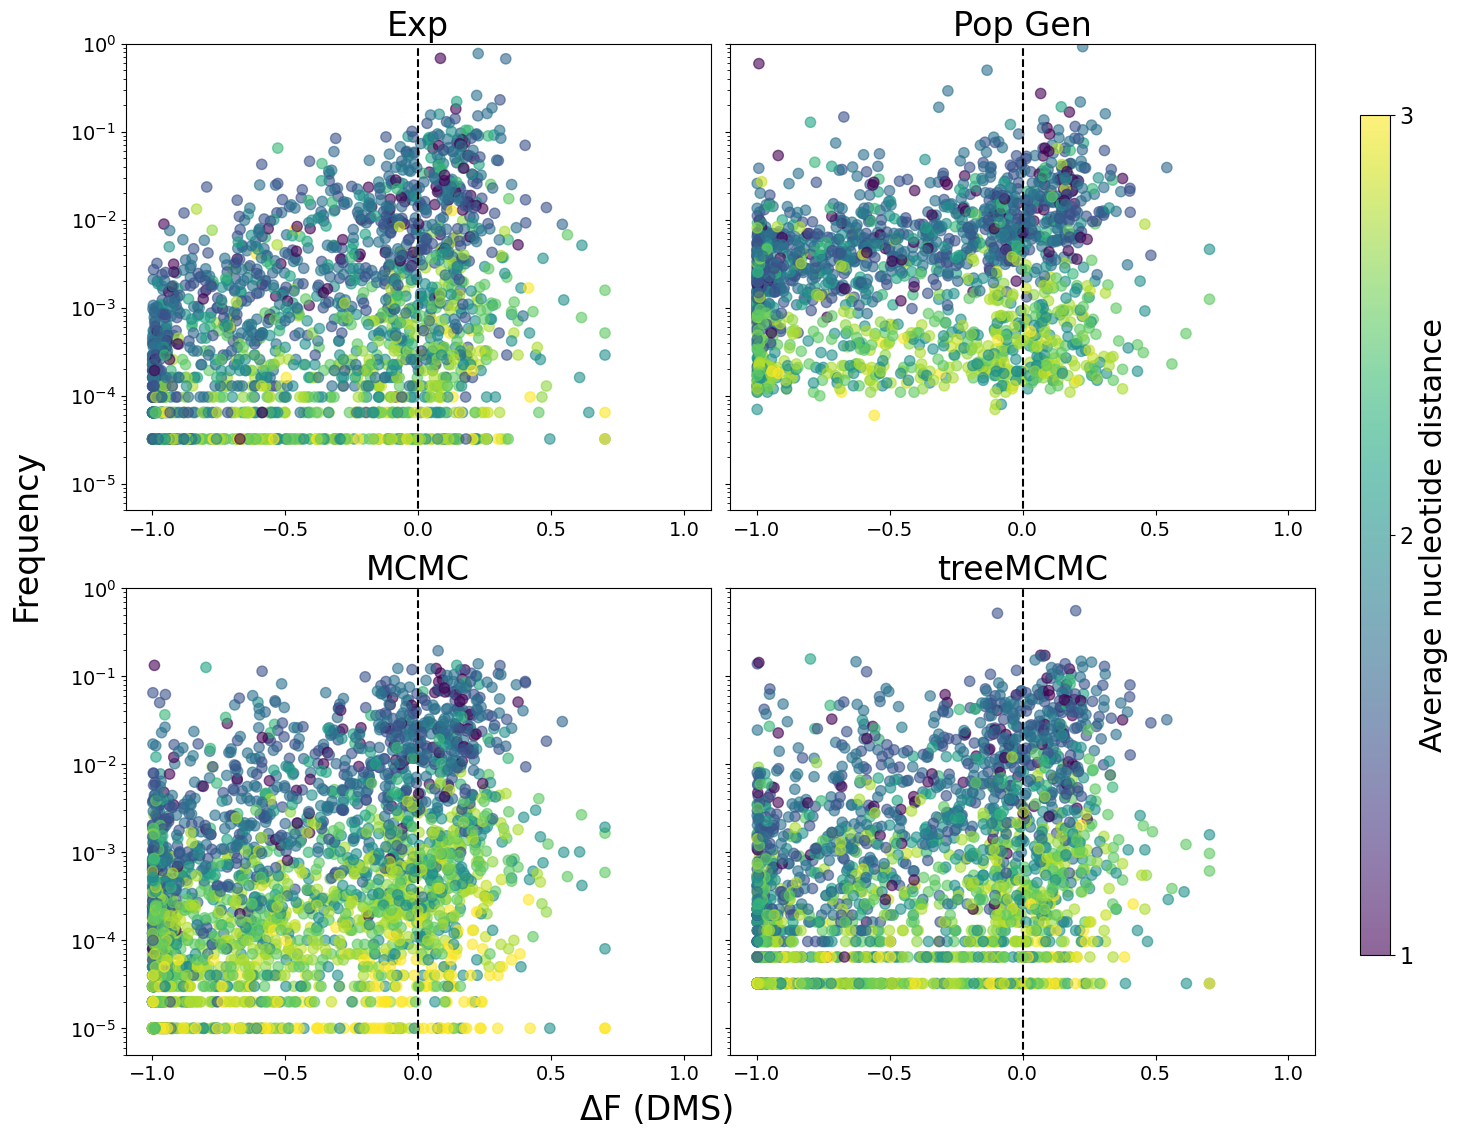

In [21]:
titles = ["Exp","MCMC","Pop Gen", "treeMCMC"]

# Data mapping for the 6 plots: [X_data, Y_data, Color_data]
plot_data = [
    (df, f1_exp  , d_nucl),          # 1. df_vs_fexp
    (df, f1_mcmc,  d_nucl),         # 5. df_vs_fmcmc
    (df, f1_popgen  , d_nucl),       # 4. df_vs_fpopgen
    (df, f1_mcmctree , d_nucl)      # 6. df_vs_fmcmctree
]


# --- Figure Setup ---
# Changed to 2x2 to fit 4 plots perfectly
fig, axs = subplots(2, 2, figsize=(15, 12), sharey=true)
axs_flat = reshape(axs, 4)

PyPlot.rc("xtick", labelsize=18)
PyPlot.rc("ytick", labelsize=18)

# Define sc outside the loop so it's accessible for the colorbar
local sc_handle = nothing 

# --- Plotting Loop ---
for i in 1:4
    ax = axs_flat[i]
    x, y, c_vals = plot_data[i]
    
    # Create the scatter plot
    # Assigning to a variable name used for colorbar later
    temp_sc = ax.scatter(x[mask_nan] .- 1, y[mask_nan] , 
                        c=c_vals[mask_nan], 
                        cmap="viridis", 
                        alpha=0.6, s=55)

    ax.plot([0,0], [0, 1], linestyle = "--", color = "black")
    
    # Capture the handle from any plot (the last one is fine) to use for colorbar
    if i == 4
        global sc_handle = temp_sc
    end

    ax.set_yscale("log")
    ax.set_title(titles[i], fontsize=24)
    ax.set_ylim(5*10^-6, 1.0)
    ax.set_xlim(-1.1, 1.1)
end

# --- Common Labels ---
fig.text(0.02, 0.5, "Frequency", 
         va="center", rotation="vertical", fontsize=24)

fig.text(0.4, 0.02, "ΔF (DMS)", 
         va="center",fontsize=24)

# --- Common Colorbar ---
# Adjust subplots to leave room on the right for the colorbar
# rect=[left, bottom, right, top]
fig.tight_layout(rect=[0.05, 0.03, 0.9, 0.95])

# Add the colorbar axes manually
# Format: [left, bottom, width, height]
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(sc_handle, cax=cbar_ax)
cbar.set_label("Average nucleotide distance", fontsize=22)
cbar.set_ticks([1, 2, 3])
cbar_ax.tick_params(labelsize=16)
# --- Save and Show ---
savefig("../../FigS2.pdf", dpi=300)
show()



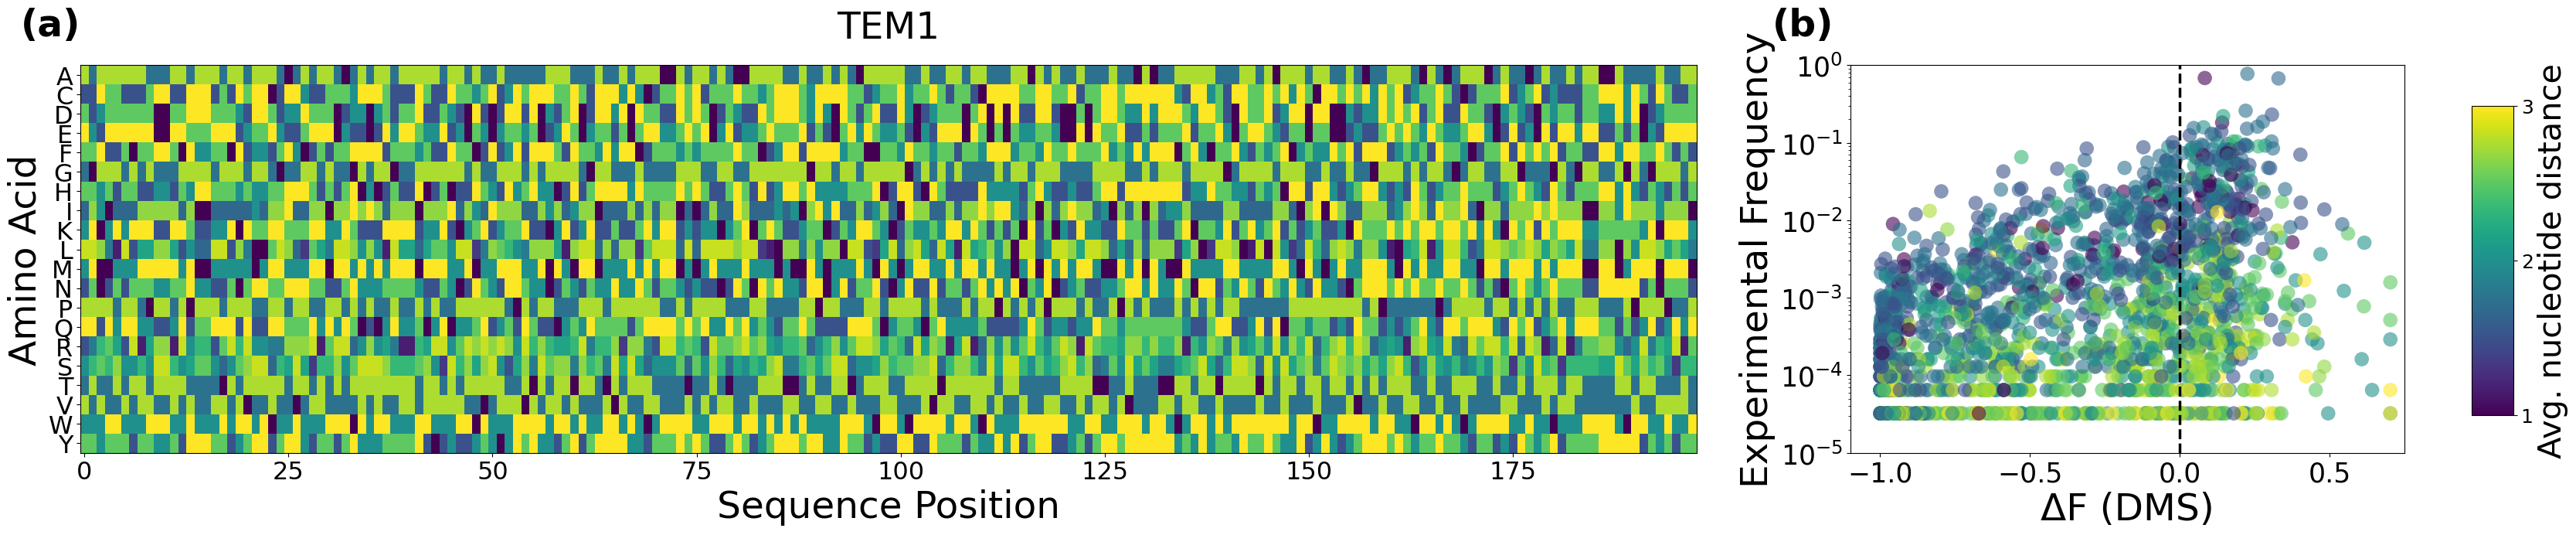

In [111]:
using PyPlot
using KitMSA

# --- Configurazione Iniziale ---
protein_idx = 2 # TEM1
aa_labels = [KitMSA.num2letter(i) for i in 1:20]

# Creazione della figura (più larga per il side-by-side)
fig = figure(figsize=(36, 8))

# Definiamo una griglia: 1 riga, 3 colonne 
# (usiamo 3 colonne per dare 1 parte all'heatmap e 2 allo scatter)
grid_size = (1, 7)

# ==========================================
# 1. HEATMAP (SINISTRA) - Colonna 0
# ==========================================
ax1 = subplot2grid(grid_size, (0, 0), colspan=5)

data_heat = full_avg_nucleo_dist[protein_idx]
wt_vec = wt_seqs[protein_idx]

# Plot Heatmap
img_heat = ax1.imshow(data_heat[1:end-1, 1:end-1], aspect="auto", 
                      vmin=1, vmax=3, cmap="viridis")

ax1.set_title("TEM1", fontsize=35, pad=25)
ax1.set_yticks(0:19)
ax1.set_yticklabels(aa_labels)
ax1.set_ylabel("Amino Acid", fontsize=35)
ax1.set_xlabel("Sequence Position", fontsize=35)
ax1.tick_params(axis="both", labelsize=23)
# Etichetta (a)
ax1.text(-0.0, 1.15, "(a)", transform=ax1.transAxes, 
         fontsize=35, fontweight="bold", va="top", ha="right")

# Lettere WT sopra l'heatmap
#for (pos, aa_idx) in enumerate(wt_vec[1:end-1])
 #  ax1.text(pos-1, -0.8, KitMSA.num2letter(aa_idx), 
  #         ha="center", va="bottom", fontsize=10, color="black", alpha=0.7)
#end

# ==========================================
# 2. SCATTER PLOT (DESTRA) - Colonne 1 e 2
# ==========================================
# rowspan=1, colspan=2 per occupare il resto della larghezza
ax2 = subplot2grid(grid_size, (0, 5), colspan=2)

x_scat = df[mask_nan] .- 1
y_scat = f1_exp[mask_nan]
c_scat = d_nucl[mask_nan]

sc = ax2.scatter(x_scat, y_scat, c=c_scat, cmap="viridis", 
                 alpha=0.6, s=180, vmin=1, vmax=3, edgecolors="none")

# Etichetta (b)
ax2.text(-0.03, 1.15, "(b)", transform=ax2.transAxes, 
         fontsize=35, fontweight="bold", va="top", ha="right")

# Formattazione Scatter
ax2.axvline(0, linestyle="--", color="black", linewidth=2.5)
ax2.set_yscale("log")
ax2.set_ylabel("Experimental Frequency", fontsize=35)
ax2.set_xlabel("ΔF (DMS)", fontsize=35)
ax2.set_ylim(1e-5, 1.0)
ax2.set_xlim(-1.1, 0.75)
ax2.tick_params(labelsize=25)

# ==========================================
# 3. COLORBAR E LAYOUT
# ==========================================
# Ottimizziamo lo spazio tra i subplot
tight_layout(rect=[0.05, 0.05, 0.92, 0.95], w_pad=4.0)

# Posizionamento della Colorbar a destra
cbar_ax = fig.add_axes([0.94, 0.25, 0.015, 0.5]) 
cbar = colorbar(img_heat, cax=cbar_ax)
cbar.set_label("Avg. nucleotide distance", fontsize=30)
cbar.set_ticks([1, 2, 3])
cbar.ax.tick_params(labelsize=18)

# Salvataggio
savefig("../../Fig2_composite_side.pdf", dpi=300, bbox_inches="tight")
show()

## Fig S3

In [ ]:

function codon_to_amino_min_dist(cod1::String, amino::Int)
    return minimum([Genie.cod_dist(cod1, KitMSA.amino2cod[amino][i]) for i in 1:length(KitMSA.amino2cod[amino])])
end

function codon_to_amino_mean_dist(cod1::String, amino::Int)
    return mean([Genie.cod_dist(cod1, KitMSA.amino2cod[amino][i]) for i in 1:length(KitMSA.amino2cod[amino])])
end


function codon_dist_from_msa(dna_seq::Vector; q::Int = 21)
    L = length(dna_seq)
    res = zeros(q,L)

    for a in 1:q
        for i in 1:L
            res[a,i] = codon_to_amino_mean_dist(dna_seq[i], a)
        end
    end

    return res
end



files = ["../data_directed_evolution/PSE1_pfam_DNA.fasta",
    "../data_directed_evolution/TEM1_pfam_DNA.fasta",
    "../data_directed_evolution/AAC6_pfam_DNA.fasta",
    "../data_directed_evolution/mDHFR_pfam_DNA.fasta"]


wt_names= ["PSE","TEM", "AAC", "DHFR"]

avg_nucleo_dist = []
for i in 1:length(files)
    # Reading sequences in the seed
    println("Reading sequences in the seed")
    wt = join(readdlm(files[i], skipstart = 1));
    L_big = round(Int,length(wt)/3)
    if wt_names[i] == "AAC" || wt_names[i] == "DHFR"
        wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
    else
        wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
    end
    wt_seq = [cod2amino[x] for x in wt_DNA_seq];
    L = length(wt_seq)
    d_nucl = codon_dist_from_msa(wt_DNA_seq)
    mask = ones(21, L); for (i,a) in enumerate(wt_seq)  mask[a,i] = 0 end; mask = Bool.(mask)
    push!(avg_nucleo_dist, d_nucl[mask])
end

@save "../data_directed_evolution/average_mut_nucleo_dist.jld2" avg_nucleo_dist
    

In [ ]:
function generate_scatter_data(
           wt_name::String,
           res_folder::String,
           files_groups::Vector,
           output_folder::String,
           labels
       )
           ref_file = joinpath(res_folder, "$(wt_name)_DNA.fasta")
               wt_raw = join(readdlm(ref_file, skipstart = 1))
           L_big = round(Int, length(wt_raw) / 3)
           wt_DNA_seq = if wt_name == "AAC" || wt_name == "DHFR"
               [wt_raw[((i-1)*3 +1):(i*3)] for i in 1:L_big]
           else
               [wt_raw[((i-1)*3 +1):(i*3)] for i in 3:L_big-1]
           end
               L_sites = length(wt_DNA_seq)
           wt_seq = [cod2amino[x] for x in wt_DNA_seq]

            rep_f1_vectors = []
           for (group_id, filegroup) in enumerate(files_groups)
               
               file_list = typeof(filegroup) == String ? [filegroup] : filegroup
               num_reps = length(file_list)
               #println(file_list)
               if num_reps < 2
                   @warn "Group $(labels[group_id]) has fewer than 2 replicates. Skipping correlation."
                               continue
               end
              
               for file in file_list
                   aln = read_fasta_alignment(file, 0.9)
                   f1, f2 = compute_weighted_frequencies(aln, 22, 0.0)
                   ff1 = reshape(f1, 21, L_sites)
                   for (i, aa) in enumerate(wt_seq)
                                   ff1[aa, i] = NaN # Mask Wild-Type
                   end
                   push!(rep_f1_vectors, filter(isfinite, vec(ff1)))
               end
           end
           return rep_f1_vectors
       end


res_folder = "../simulation_data/best_fit/"
best_pars_file = "../simulation_data/best_fit/best_pars.csv"
labels = ["Exp", "MCMC", "Pop Gen", "MCMC on tree", "Neutral"]
output_folder = "./"
data = []

for wt_name in ["PSE", "TEM", "AAC", "DHFR"]
           n_repl = 2

           # Funzione esterna fornita dall'utente per recuperare i file fasta
           files_ham_groups, files_en_groups, files_fasta_groups, files_fasta_dna_groups, files_pair_groups, ROUNDS =
               setup_files(wt_name, n_repl, res_folder, best_pars_file)
            println(wt_name)
           println(files_fasta_groups[5])
           y = generate_scatter_data(
               wt_name,
               res_folder,
               files_fasta_groups[4:5], #should not put anything 
               output_folder,
               labels[4:5]
           )
           push!(data, y)
       end

data_neutral = data

#@save "../data_repl_freqs.jld2" data
@save "../data_repl_freqs_neutral.jld2" data_neutral


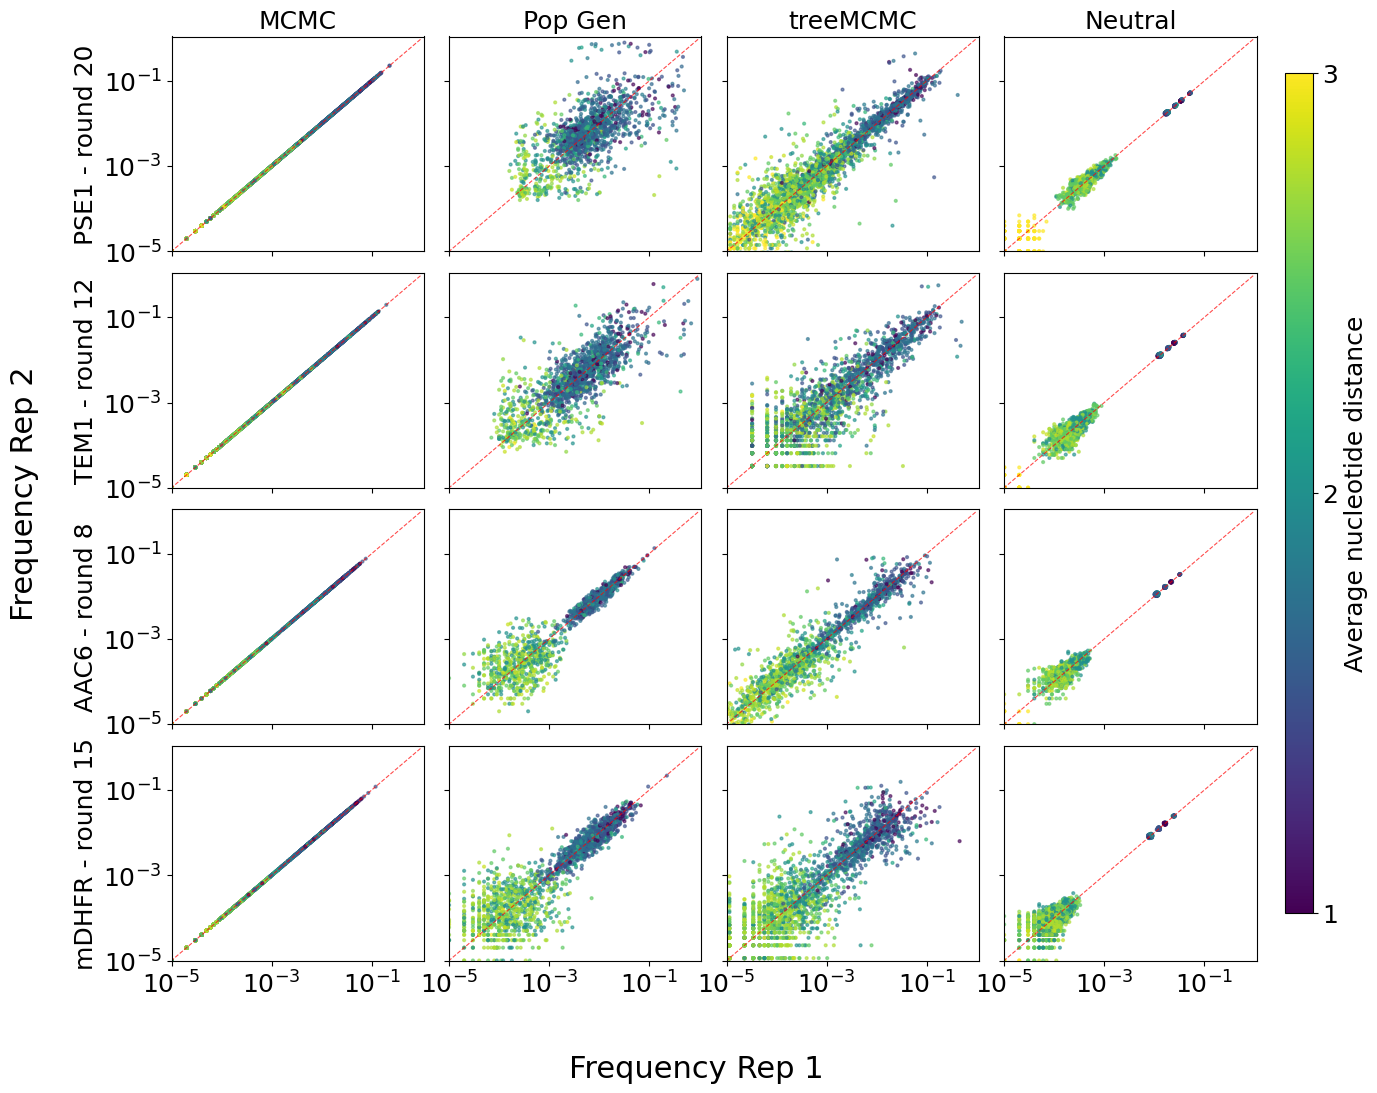

In [22]:
using PyPlot
using JLD2


# Assuming 'data' is loaded from "../data_repl_freqs.jld2"
# and 'd_nucl_all' is a vector containing the masked distance vectors for each protein
# (PSE1, TEM1, AAC6, DHFR) in order.
@load "../../data_directed_evolution/data_repl_freqs.jld2" data
@load "../../data_directed_evolution/average_mut_nucleo_dist.jld2" avg_nucleo_dist
    
proteins = ["PSE1 - round 20", "TEM1 - round 12", "AAC6 - round 8", "mDHFR - round 15"]
methods = ["MCMC", "Pop Gen", "treeMCMC", "Neutral"]

# Create the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(14, 12), sharex=true, sharey=true)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Main Loop
for p_idx in 1:4
    # Distance vector for the current protein (already masked to exclude WT)
    # This vector's length must match the length of the frequency vectors in data[p_idx]
    current_dist = avg_nucleo_dist[p_idx] 
    
    for m_idx in 1:4
        ax = axes[p_idx, m_idx]
        
        # Mapping indices to skip the "Exp" replicates (first 2 elements)
        # data[p_idx][1] -> Exp Rep1, data[p_idx][2] -> Exp Rep2
        r1_idx = 2*(m_idx) - 1
        r2_idx = 2*m_idx
        
        x = data[p_idx][r1_idx]
        y = data[p_idx][r2_idx]        
        # Scatter Plot
        # 'c' uses the pre-calculated nucleotide distance vector
        img = ax.scatter(x, y, s=4, c=current_dist, cmap="viridis", alpha=0.6)
        
        # Identity Line
        ax.plot([1e-6, 1], [1e-6, 1], color="red", linestyle="--", linewidth=0.8, alpha=0.7)
        
        # Scale and Limits
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlim(1e-5, 1.1)
        ax.set_ylim(1e-5, 1.1)
        # Titles (Top Row)
        if p_idx == 1
            ax.set_title(methods[m_idx], fontsize=18)
        end 
    end
end

for i in 1:4
    axes[i,1].set_ylabel(proteins[i], fontsize = 18)
end

# Common X-label (centered horizontally at the bottom)
fig.text(0.5, 0.02, "Frequency Rep 1", ha="center", va="center", fontsize=22)

# Common Y-label (centered vertically on the left)
fig.text(0.02, 0.5, "Frequency Rep 2", ha="center", va="center", rotation="vertical", fontsize=22)

# Add a common colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cb = fig.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=3), cmap="viridis"), cax=cbar_ax)
cb.set_label("Average nucleotide distance", fontsize=18)
cb.set_ticks([1, 2, 3])

plt.savefig("../../FigS3.pdf", dpi=300, bbox_inches="tight")
plt.show()

Reading sequences in the seed
Reading sequences in the seed
Reading sequences in the seed
Reading sequences in the seed
θ = 0.0 threshold = 0.0
M = 423798 N = 199 Meff = 423798
θ = 0.0 threshold = 0.0
M = 30949 N = 199 Meff = 30949
θ = 0.0 threshold = 0.0
M = 1218821 N = 117 Meff = 1218821
θ = 0.0 threshold = 0.0
M = 88013 N = 160 Meff = 88013


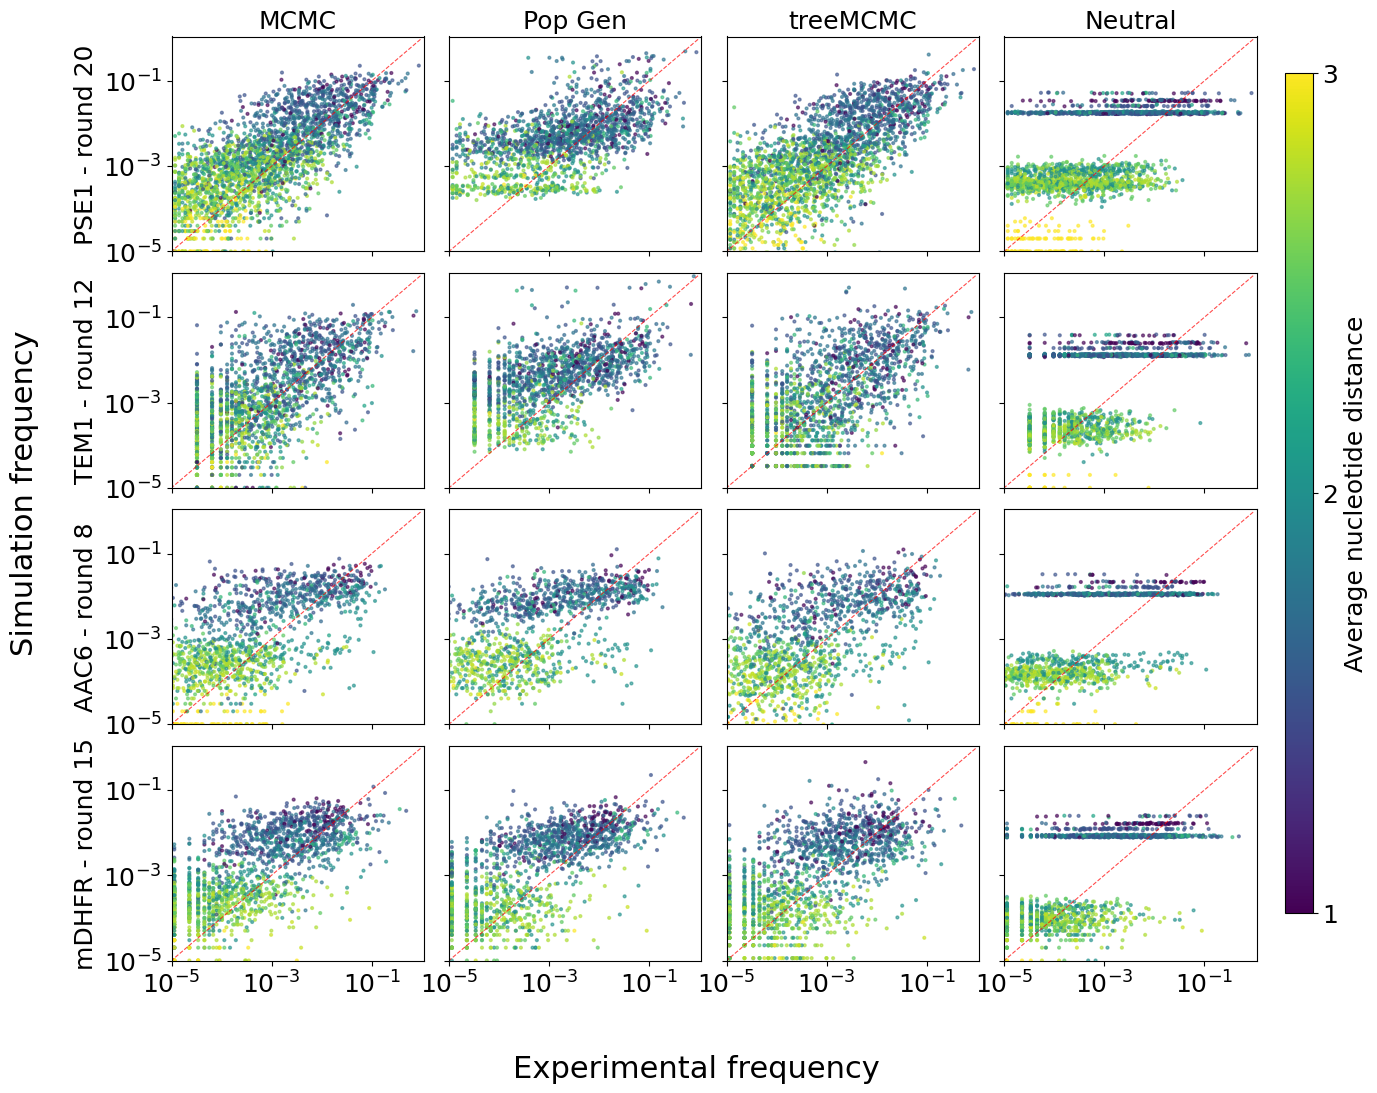

In [23]:
using PyPlot
using JLD2
using KitMSA
using DelimitedFiles
using DCAUtils


files = ["../../data_directed_evolution/pse_round20_noflankgaps_nodupl.fa",
    "../../data_directed_evolution/tem_round12_noflankgaps_nodupl.fa",
    "../../data_directed_evolution/aac_round8_noflankgaps_nodupl.fa",
    "../../data_directed_evolution/dhfr_round15_noflankgaps_nodupl.fasta"]


files_wt = ["../../data_directed_evolution/PSE1_pfam_DNA.fasta",
    "../../data_directed_evolution/TEM1_pfam_DNA.fasta",
    "../../data_directed_evolution/AAC6_pfam_DNA.fasta",
    "../../data_directed_evolution/mDHFR_pfam_DNA.fasta"]

# Assuming 'data' is loaded from "../data_repl_freqs.jld2"
# and 'd_nucl_all' is a vector containing the masked distance vectors for each protein
# (PSE1, TEM1, AAC6, DHFR) in order.
@load "../../data_directed_evolution/data_repl_freqs.jld2" data
@load "../../data_directed_evolution/average_mut_nucleo_dist.jld2" avg_nucleo_dist
@load "../../data_directed_evolution/full_average_mut_nucleo_dist.jld2" full_avg_nucleo_dist wt_seqs

wt_names = ["PSE", "TEM", "AAC", "DHFR"]
masks = []
for i in 1:length(files)
    # Reading sequences in the seed
    println("Reading sequences in the seed")
    wt = join(readdlm(files_wt[i], skipstart = 1));
    L_big = round(Int,length(wt)/3)
    if wt_names[i] == "AAC" || wt_names[i] == "DHFR"
        wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
    else
        wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
    end
    wt_seq = [cod2amino[x] for x in wt_DNA_seq];
    L = length(wt_seq)
    mask = ones(21, L); for (i,a) in enumerate(wt_seq)  mask[a,i] = 0 end; mask = Bool.(mask)
    push!(masks, mask)
end

freqs_exp = []; 
for i in 1:4
    msa = read_fasta_alignment(files[i], 0.9);
    L, _ = size(msa)
    f1,_ = compute_weighted_frequencies(msa, 22, 0.);
    f1 = reshape(f1, 21, L)
    push!(freqs_exp, f1[masks[i]])
end
    
proteins = ["PSE1 - round 20", "TEM1 - round 12", "AAC6 - round 8", "mDHFR - round 15"]
methods = ["MCMC", "Pop Gen", "treeMCMC", "Neutral"]

# Create the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(14, 12), sharex=true, sharey=true)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Main Loop
for p_idx in 1:4
    # Distance vector for the current protein (already masked to exclude WT)
    # This vector's length must match the length of the frequency vectors in data[p_idx]
    current_dist = avg_nucleo_dist[p_idx] 
    
    for m_idx in 1:4
        ax = axes[p_idx, m_idx]
        
        # Mapping indices to skip the "Exp" replicates (first 2 elements)
        # data[p_idx][1] -> Exp Rep1, data[p_idx][2] -> Exp Rep2
        r1_idx = 2*(m_idx) - 1
        r2_idx = 2*m_idx
        
        y = data[p_idx][r1_idx]
        x = freqs_exp[p_idx]     
        # Scatter Plot
        # 'c' uses the pre-calculated nucleotide distance vector
        img = ax.scatter(x, y, s=4, c=current_dist, cmap="viridis", alpha=0.6)
        
        # Identity Line
        ax.plot([1e-6, 1], [1e-6, 1], color="red", linestyle="--", linewidth=0.8, alpha=0.7)
        
        # Scale and Limits
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_xlim(1e-5, 1.1)
        ax.set_ylim(1e-5, 1.1)
        # Titles (Top Row)
        if p_idx == 1
            ax.set_title(methods[m_idx], fontsize=18)
        end 
    end
end

for i in 1:4
    axes[i,1].set_ylabel(proteins[i], fontsize = 18)
end

# Common X-label (centered horizontally at the bottom)
fig.text(0.5, 0.02, "Experimental frequency", ha="center", va="center", fontsize=22)

# Common Y-label (centered vertically on the left)
fig.text(0.02, 0.5, "Simulation frequency", ha="center", va="center", rotation="vertical", fontsize=22)

# Add a common colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cb = fig.colorbar(plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=3), cmap="viridis"), cax=cbar_ax)
cb.set_label("Average nucleotide distance", fontsize=18)
cb.set_ticks([1, 2, 3])

plt.savefig("../../FigS3_exp.pdf", dpi=300, bbox_inches="tight")
plt.show()

## Fig S3 DNA

In [ ]:
function read_dna_to_int(filename::String)
    sequences = Int[]
    current_seq = ""
    n_seqs = 0
    
    # Dizionario di codifica
    encoding = Dict('A'=>1, 'C'=>2, 'G'=>3, 'T'=>4, 'a'=>1, 'c'=>2, 'g'=>3, 't'=>4, '-'=>5)

    lines = readlines(filename)
    
    # Estraiamo solo le sequenze ignorando gli header
    seqs_list = String[]
    temp_seq = ""
    for line in lines
        if startswith(line, ">")
            if !isempty(temp_seq)
                push!(seqs_list, temp_seq)
                temp_seq = ""
            end
        else
            temp_seq *= strip(line)
        end
    end
    push!(seqs_list, temp_seq) # Ultima sequenza

    # Conversione in Matrice L x M
    L = length(seqs_list)
    M = length(seqs_list[1])
    msa_int = zeros(Int, L, M)

    for i in 1:L
        for j in 1:M
            char = seqs_list[i][j]
            msa_int[i, j] = get(encoding, char, 5) # Default al gap se carattere ignoto
        end
    end
    
    return Int8.(msa_int')
end


function encode_codons_to_nuc_int(codon_seq::Vector{String})
    # Mapping nucleotides to Integers
    nuc_map = Dict('A'=>1, 'C'=>2, 'G'=>3, 'T'=>4, '-'=>5, 'N'=>5)
    
    encoded = Int[]
    
    for codon in codon_seq
        for char in codon
            # Convert each character of the codon string
            push!(encoded, get(nuc_map, uppercase(char), 5))
        end
    end
    return encoded
end

function generate_scatter_data_dna(
           wt_name::String,
           res_folder::String,
           files_groups::Vector,
           output_folder::String,
           labels
       )

        rep_f1_vectors = []
           ref_file = joinpath(res_folder, "$(wt_name)_DNA.fasta")
               wt_raw = join(readdlm(ref_file, skipstart = 1))
           L_big = round(Int, length(wt_raw) / 3)
           wt_DNA_seq = if wt_name == "AAC" || wt_name == "DHFR"
               [wt_raw[((i-1)*3 +1):(i*3)] for i in 1:L_big]
           else
               [wt_raw[((i-1)*3 +1):(i*3)] for i in 3:L_big-1]
           end
           wt_seq = encode_codons_to_nuc_int(wt_DNA_seq)
           L_sites = length(wt_seq)
          

           for (group_id, filegroup) in enumerate(files_groups)
                   file_list = typeof(filegroup) == String ? [filegroup] : filegroup
               num_reps = length(file_list)
               if num_reps < 2
                   @warn "Group $(labels[group_id]) has fewer than 2 replicates. Skipping correlation."
                               continue
               end
               
               for file in file_list
                   aln = read_dna_to_int(file)
                   f1, f2 = compute_weighted_frequencies(aln, 6, 0.0)
                   ff1 = reshape(f1, 5, L_sites)
                   for (i, aa) in enumerate(wt_seq)
                        ff1[aa, i] = NaN # Mask Wild-Type
                   end
                   push!(rep_f1_vectors, filter(isfinite, vec(ff1)))
               end
           end
           return rep_f1_vectors
       end


res_folder = "../simulation_data/best_fit/"
best_pars_file = "../simulation_data/best_fit/best_pars.csv"
labels = ["Exp", "MCMC", "Pop Gen", "MCMC on tree", "Neutral"]
output_folder = "./"
data = []

for wt_name in ["PSE", "TEM", "AAC", "DHFR"]
           n_repl = 2

           # Funzione esterna fornita dall'utente per recuperare i file fasta
           files_ham_groups, files_en_groups, files_fasta_groups, files_fasta_dna_groups, files_pair_groups, ROUNDS =
               setup_files(wt_name, n_repl, res_folder, best_pars_file)

           y = generate_scatter_data_dna(
               wt_name,
               res_folder,
               files_fasta_dna_groups[4:5], #should put 2:end
               output_folder,
               labels[4:5] #should put 2:end
           )
           push!(data, y)
            @save "../dna_repl_freqs_$(wt_name).jld2" y 
       end

data_neutral = data

@save "../data_dna_repl_freqs_neutral.jld2" data_neutral




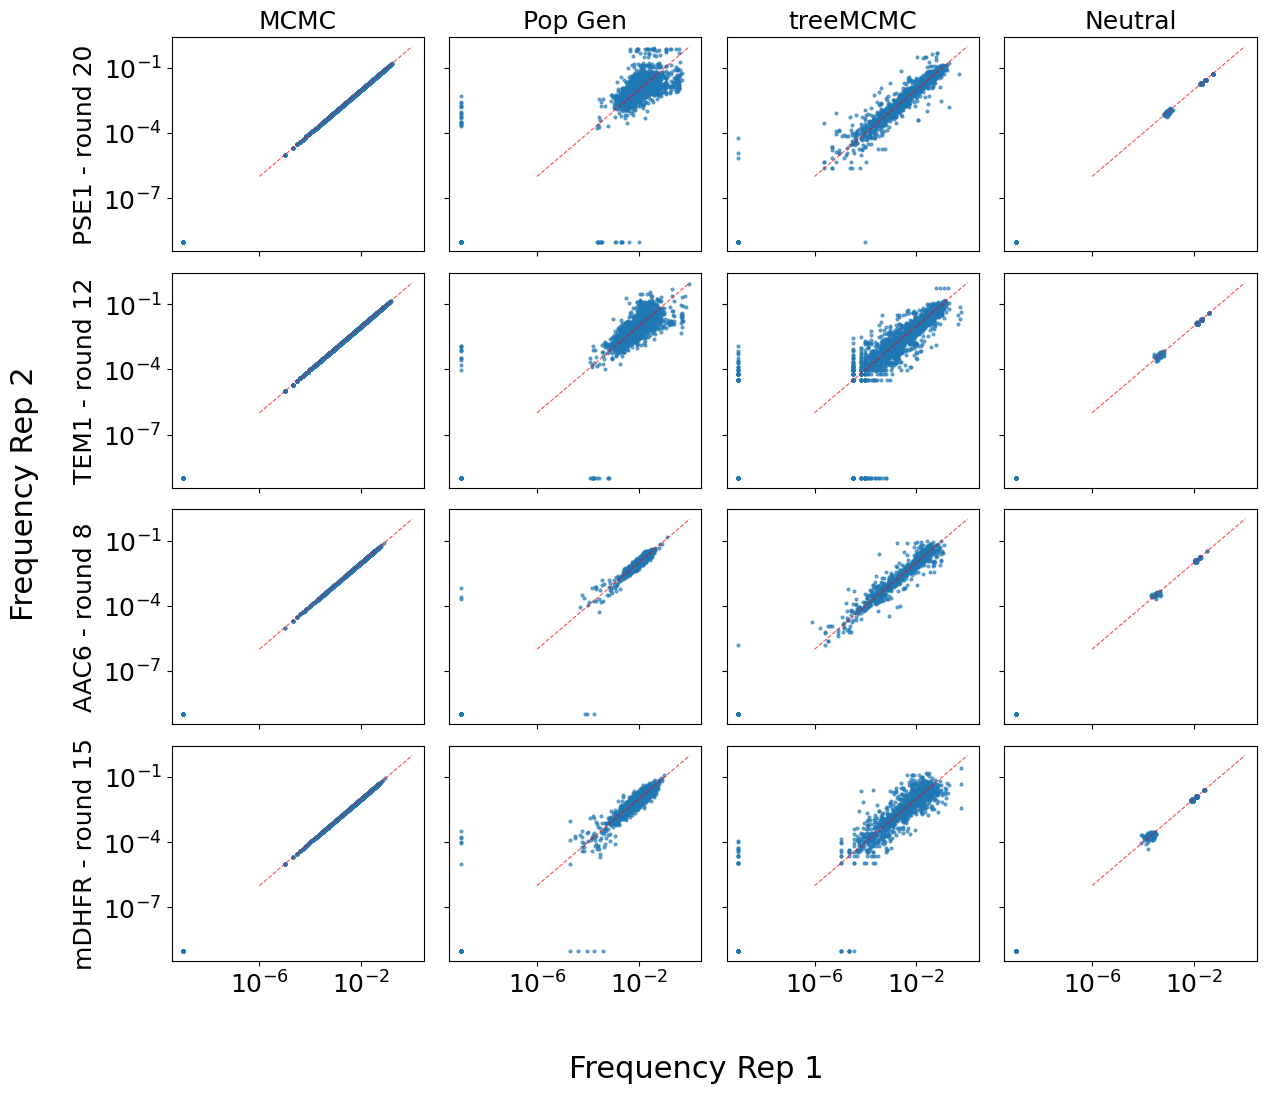

In [24]:
using PyPlot
using JLD2


# Assuming 'data' is loaded from "../data_repl_freqs.jld2"
# and 'd_nucl_all' is a vector containing the masked distance vectors for each protein
# (PSE1, TEM1, AAC6, DHFR) in order.
@load "../../data_directed_evolution/data_dna_repl_freqs.jld2" data
@load "../../data_directed_evolution/average_mut_nucleo_dist.jld2" avg_nucleo_dist
    
proteins = ["PSE1 - round 20", "TEM1 - round 12", "AAC6 - round 8", "mDHFR - round 15"]
methods = ["MCMC", "Pop Gen", "treeMCMC", "Neutral"]

# Create the 4x4 grid
fig, axes = plt.subplots(4, 4, figsize=(14, 12), sharex=true, sharey=true)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Main Loop
for p_idx in 1:4
    # Distance vector for the current protein (already masked to exclude WT)
    # This vector's length must match the length of the frequency vectors in data[p_idx]
    current_dist = avg_nucleo_dist[p_idx] 
    
    for m_idx in 1:4
        ax = axes[p_idx, m_idx]
        
        # Mapping indices to skip the "Exp" replicates (first 2 elements)
        # data[p_idx][1] -> Exp Rep1, data[p_idx][2] -> Exp Rep2
        r1_idx = 2*(m_idx) - 1
        r2_idx = 2*m_idx
        
        x = data[p_idx][r1_idx]
        y = data[p_idx][r2_idx]        
        # Scatter Plot
        # 'c' uses the pre-calculated nucleotide distance vector
        img = ax.scatter(x .+ 1e-9, y .+ 1e-9, s=4, alpha=0.6)
        
        # Identity Line
        ax.plot([1e-6, 1], [1e-6, 1], color="red", linestyle="--", linewidth=0.8, alpha=0.7)
        
        # Scale and Limits
        ax.set_xscale("log")
        ax.set_yscale("log")
        #ax.set_xlim(1e-5, 1.1)
        #ax.set_ylim(1e-5, 1.1)
        # Titles (Top Row)
        if p_idx == 1
            ax.set_title(methods[m_idx], fontsize=18)
        end 
    end
end

for i in 1:4
    axes[i,1].set_ylabel(proteins[i], fontsize = 18)
end

# Common X-label (centered horizontally at the bottom)
fig.text(0.5, 0.02, "Frequency Rep 1", ha="center", va="center", fontsize=22)

# Common Y-label (centered vertically on the left)
fig.text(0.02, 0.5, "Frequency Rep 2", ha="center", va="center", rotation="vertical", fontsize=22)



plt.savefig("../../FigS3dna.pdf", dpi=300, bbox_inches="tight")
plt.show()

## 1 family DNA Neutral replicate frequencies

In [ ]:
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using Revise, PyPlot, DelimitedFiles, Genie
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFiles
using Revise, Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta


function encode_codons_to_nuc_int(codon_seq::Vector{String})
    # Mapping nucleotides to Integers
    nuc_map = Dict('A'=>1, 'C'=>2, 'G'=>3, 'T'=>4, '-'=>5, 'N'=>5)
    
    encoded = Int[]
    
    for codon in codon_seq
        for char in codon
            # Convert each character of the codon string
            push!(encoded, get(nuc_map, uppercase(char), 5))
        end
    end
    return encoded
end


function read_dna_to_int(filename::String)
    sequences = Int[]
    current_seq = ""
    n_seqs = 0
    
    # Dizionario di codifica
    encoding = Dict('A'=>1, 'C'=>2, 'G'=>3, 'T'=>4, 'a'=>1, 'c'=>2, 'g'=>3, 't'=>4, '-'=>5)

    lines = readlines(filename)
    
    # Estraiamo solo le sequenze ignorando gli header
    seqs_list = String[]
    temp_seq = ""
    for line in lines
        if startswith(line, ">")
            if !isempty(temp_seq)
                push!(seqs_list, temp_seq)
                temp_seq = ""
            end
        else
            temp_seq *= strip(line)
        end
    end
    push!(seqs_list, temp_seq) # Ultima sequenza

    # Conversione in Matrice L x M
    L = length(seqs_list)
    M = length(seqs_list[1])
    msa_int = zeros(Int, L, M)

    for i in 1:L
        for j in 1:M
            char = seqs_list[i][j]
            msa_int[i, j] = get(encoding, char, 5) # Default al gap se carattere ignoto
        end
    end
    
    return Int8.(msa_int')
end



wt_name = "TEM"
file_wt = "../data_directed_evolution/TEM1_pfam_DNA.fasta"
file_model = "../model_natural_PSE.dat"

# Read model parameters
println("Reading model parameters")
if wt_name == "AAC" || wt_name == "DHFR"
        h_tmp, J_tmp = read_par_BM_0gapsave(file_model) 
else
        h_tmp, J_tmp = read_par_BM_lettersave(file_model)
end
h = set_max_field_to_0save(h_tmp);
J_tmp2 = symmetrize_Jsave(J_tmp); 
J = permutedims(J_tmp2, [1,3,2,4]);


# Reading sequences in the seed
println("Reading sequences in the seed")
wt = join(readdlm(file_wt, skipstart = 1));
L_big = round(Int,length(wt)/3)
if wt_name == "AAC" || wt_name == "DHFR"
        wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
else
        wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
end

wt_seq = encode_codons_to_nuc_int(wt_DNA_seq)


Nseqs = 100000
rounds = 12
mu = 0.014
mu_bind = 0.0
Npairs = 100
temp = 0.0

@time res = Genie.run_dir_evol_nucleo(wt_DNA_seq, Nseqs, h, J;
                   rounds = rounds,
                   seq_reads = Nseqs,
                   temp = temp,  
                   mu = mu,  
		   mu_bind = mu_bind, 
		   neutral = true);

@time res_repl = Genie.run_dir_evol_nucleo(wt_DNA_seq, Nseqs, h, J;
                   rounds = rounds,
                   seq_reads = Nseqs,
                   temp = temp,  
                   mu = mu, 
		   mu_bind = mu_bind, 
		   neutral = true);

Genie.dna2fasta("../tem_neutral.fa", res.final_msa_dna)
Genie.dna2fasta("../tem_neutral_repl.fa", res_repl.final_msa_dna)


msa_dna = read_dna_to_int("../tem_neutral.fa")
msa_dna_repl = read_dna_to_int("../tem_neutral_repl.fa")

@time f1, _ = compute_weighted_frequencies(msa_dna, 6, 0.); f1 = reshape(f1, 5, 597);
@time f1_repl, _ = compute_weighted_frequencies(msa_dna_repl, 6, 0.); f1_repl = reshape(f1_repl, 5, 597);

for (i, aa) in enumerate(wt_seq)
    f1[aa, i] = NaN # Mask Wild-Type
    f1_repl[aa, i] = NaN # Mask Wild-Type
end
f = filter(isfinite, vec(f1))
f_repl = filter(isfinite, vec(f1_repl))

off = 1e-9;
close("all"); 
plt.scatter(f .+ off, f_repl .+ off, s=4, alpha=0.6) # Identity Line
plt.plot([1e-6, 1], [1e-6, 1], color="red", linestyle="--", linewidth=0.8, alpha=0.7)
plt.xscale("log")
plt.yscale("log")
savefig("../tem_repl_freqs_dna.png")



In [57]:
a = zeros(10,20)

a[1,3] = NaN
a[5,1] = NaN

NaN

In [ ]:

Nseqs = 100000
rounds = 12
mu = 0.014
mu_bind = 0.0
Npairs = 100
temp = 0.0

@time res = Genie.run_neutral_evol_nucleo(wt_DNA_seq, Nseqs;
                   rounds = rounds, 
                   mu = mu);


@time res_repl = Genie.run_neutral_evol_nucleo(wt_DNA_seq, Nseqs;
                   rounds = rounds, 
                   mu = mu);


Genie.dna2fasta("../tem_neutral_new.fa", res.final_msa_dna)
Genie.dna2fasta("../tem_neutral_repl_new.fa", res_repl.final_msa_dna)


msa_dna = read_dna_to_int("../tem_neutral_new.fa")
msa_dna_repl = read_dna_to_int("../tem_neutral_repl_new.fa")

@time f1, _ = compute_weighted_frequencies(msa_dna, 6, 0.); f1 = reshape(f1, 5, 597);
@time f1_repl, _ = compute_weighted_frequencies(msa_dna_repl, 6, 0.); f1_repl = reshape(f1_repl, 5, 597);

for (i, aa) in enumerate(wt_seq)
    f1[aa, i] = NaN # Mask Wild-Type
    f1_repl[aa, i] = NaN # Mask Wild-Type
end
f = filter(isfinite, vec(f1))
f_repl = filter(isfinite, vec(f1_repl))

off = 0.;

close("all"); 
plt.scatter(f .+ off, f_repl .+ off, s=4, alpha=0.6) # Identity Line
plt.plot([1e-6, 1], [1e-6, 1], color="red", linestyle="--", linewidth=0.8, alpha=0.7)
plt.xscale("log")
plt.yscale("log")
savefig("../new_tem_repl_freqs_dna.png")




## Long term mcmc and popgen 

In [ ]:
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFiles, Genie
ENV["PYTHON"] = "" 
using Pkg
Pkg.build("PyCall")  # Rebuild PyCall to use the internal Python
using PyPlot, DelimitedFiles
using Genie, DelimitedFiles, DCAUtils, JLD2, PyPlot, Statistics, LinearAlgebra
import KitMSA: fasta2matrix, matrix2fasta


wt_name = "AAC"
file_wt = "../data_directed_evolution/AAC6_pfam_DNA.fasta"
file_model = "../data_directed_evolution/Parameters_conv_AAC6.dat"

# Read model parameters
println("Reading model parameters")
if wt_name == "AAC" || wt_name == "DHFR"
        h_tmp, J_tmp = read_par_BM_0gapsave(file_model) 
else
        h_tmp, J_tmp = read_par_BM_lettersave(file_model)
end
h = set_max_field_to_0save(h_tmp);
J_tmp2 = symmetrize_Jsave(J_tmp); 
J = permutedims(J_tmp2, [1,3,2,4]);


# Reading sequences in the seed
println("Reading sequences in the seed")
wt = join(readdlm(file_wt, skipstart = 1));
L_big = round(Int,length(wt)/3)
if wt_name == "AAC" || wt_name == "DHFR"
        wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 1:L_big];
else
        wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1];
end
wt_seq = [cod2amino[x] for x in wt_DNA_seq];


N_start = 10^5; 
@time pop_gen = Genie.run_dir_evol_nucleo(wt_DNA_seq, N_start, h, J;
       rounds = 800,
       seq_reads = N_start,
       temp = 10.,  
       mu = 0.035,
       each_step = 8,
       mu_bind = 0.);

start_msa = hcat([wt_DNA_seq for i in 1:Nstart]...); 
@time mcmc = run_evolution(start_msa, 
    h, 
    J,
    p = 0., 
    temp = 2.1, 
    N_steps = 3000, 
    each_step = 30,
    verbose = false);

d_pop = [mean(ham_dist(wt_seq, pop_gen.step_msa[i])) for i in 1:100]
d_mcmc = [mean(ham_dist(wt_seq, mcmc.step_msa[i])) for i in 1:100]

pc_nat, pc_pop_gen = check_pca(nat_msa, pop_gen.step_msa[end]);
pc_nat, pc_mcmc = check_pca(nat_msa, mcmc.step_msa[end]);
pc_nat, pc_wt = check_pca(nat_msa, hcat([wt_seq for i in 1:2]...));


steps_popgen = pop_gen.steps
steps_mcmc = mcmc.steps

@save "../data_directed_evolution/long_term_AAC.jld2" d_mcmc d_pop pc_nat pc_pop_gen pc_mcmc pc_wt steps_mcmc steps_popgen


In [2]:
using PyPlot, JLD2
using Random


@load "../../data_directed_evolution/long_term_AAC.jld2" 

8-element Vector{Symbol}:
 :d_mcmc
 :d_pop
 :pc_nat
 :pc_pop_gen
 :pc_mcmc
 :pc_wt
 :steps_mcmc
 :steps_popgen

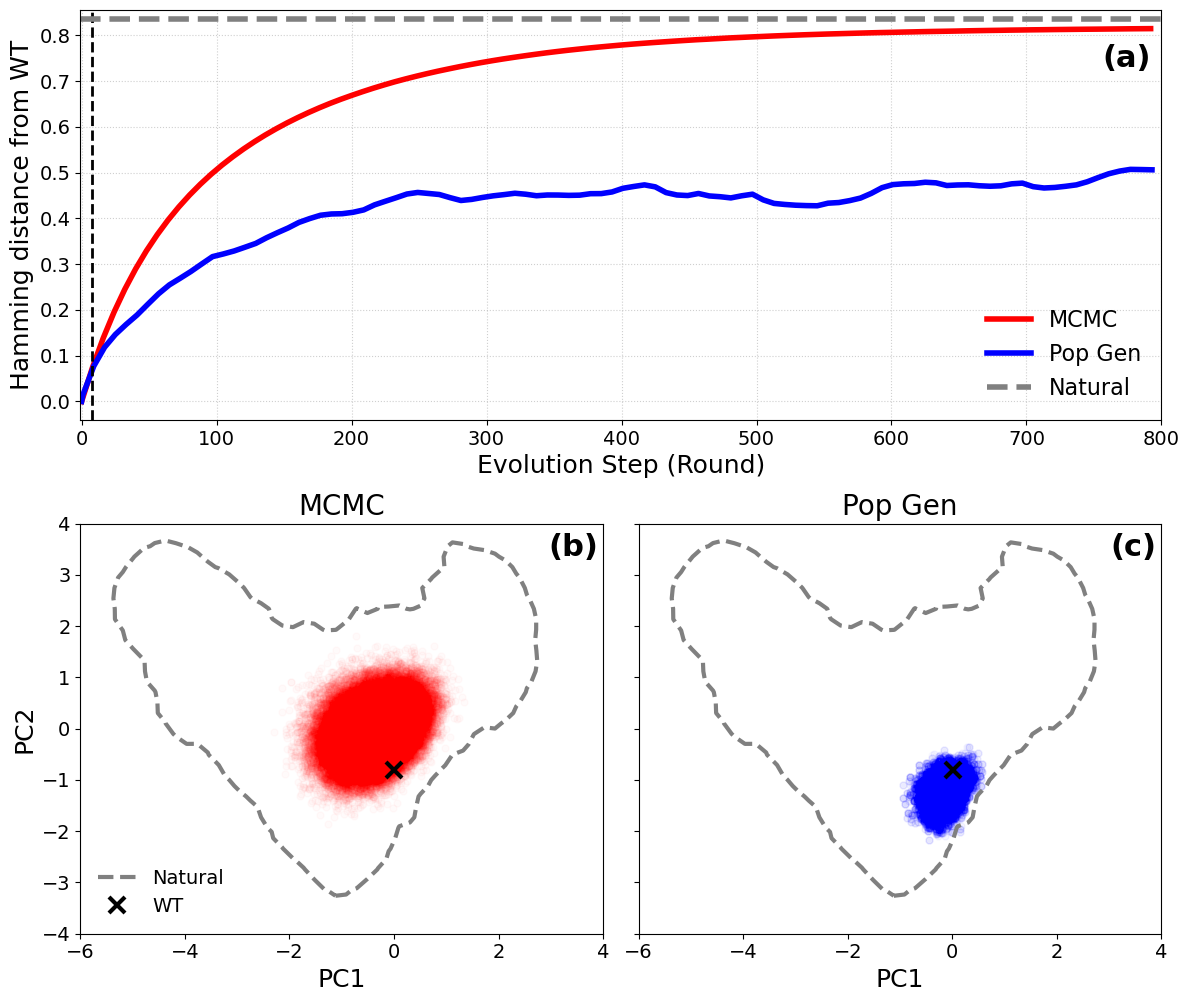

In [52]:
# Publication Font Sizes
label_fs = 18
tick_fs  = 14
title_fs = 20
legend_fs = 16

# ==========================================
# 2. DENSITY CALCULATION (NATURAL ONLY)
# ==========================================
x_grid = range(-6.0, 6.0, length=60) 
y_grid = range(-6.0, 6.0, length=60)
dx, dy = x_grid[2]-x_grid[1], y_grid[2]-y_grid[1]

z_nat = zeros(length(y_grid), length(x_grid))

for i in 1:size(pc_nat, 1)
    ix = floor(Int, (pc_nat[i, 1] - x_grid[1]) / dx) + 1
    iy = floor(Int, (pc_nat[i, 2] - y_grid[1]) / dy) + 1
    if 1 <= ix <= 60 && 1 <= iy <= 60
        z_nat[iy, ix] += 1.0
    end
end

# Smoothing the natural sequence boundary
for r in 2:59, c in 2:59
    z_nat[r,c] = (z_nat[r-1,c]+z_nat[r+1,c]+z_nat[r,c-1]+z_nat[r,c+1]+2*z_nat[r,c])/6
end

# ==========================================
# 3. FIGURE CONSTRUCTION
# ==========================================
fig = figure(figsize=(12, 11))

# --- Top Plot: Hamming Distance ---
ax1 = subplot(2, 1, 1)
ax1.plot((steps_mcmc .- 1) .* 8 ./ 30, d_mcmc ./ 117, color="red", label="MCMC", linewidth=4)
ax1.plot(vcat([0], steps_popgen) , vcat([0], d_pop) ./ 117, color="blue", label="Pop Gen", linewidth=4)
ax1.axvline(x=8, color="black", linestyle="--", linewidth=2)
ax1.axhline(y=0.835, color="grey", linestyle="--", linewidth=4, label = "Natural")
ax1.set_xlabel("Evolution Step (Round)", fontsize=label_fs)
ax1.set_ylabel("Hamming distance from WT", fontsize=label_fs)
ax1.tick_params(labelsize=tick_fs)
ax1.grid(true, linestyle=":", alpha=0.6)
ax1.legend(fontsize=legend_fs, frameon=false, loc="lower right")
ax1.set_xlim(-1, 800)
# --- Bottom Left: MCMC ---
ax2 = subplot(2, 2, 3)
ax2.scatter(pc_mcmc[:,1], pc_mcmc[:,2], alpha=0.02, color="red", s=25, rasterized=true)

ax2.contour(x_grid, y_grid, z_nat, levels=[0.5], colors="grey", linestyles="--", linewidths=3)

# Legend Proxies
ax2.plot([], [], "grey", linestyle="--", linewidth=3, label="Natural")
ax2.plot(wt_x, wt_y, "kx", markersize=12, markeredgewidth=3, label="WT")
ax2.set_xlim(-6, 4)
ax2.set_ylim(-4, 4)
ax2.set_title("MCMC", fontsize=title_fs)
ax2.set_xlabel("PC1", fontsize=label_fs)
ax2.set_ylabel("PC2", fontsize=label_fs)
ax2.tick_params(labelsize=tick_fs)
ax2.legend(loc="lower left", fontsize=legend_fs-2, frameon=false)

# --- Bottom Right: Pop Gen ---
ax3 = subplot(2, 2, 4)
#ax3.scatter(pc_nat[:,1], pc_nat[:,2])
ax3.scatter(pc_pop_gen[:,1], pc_pop_gen[:,2], alpha=0.02, color="blue", s=25, rasterized=true)
ax3.contour(x_grid, y_grid, z_nat, levels=[0.5], colors="grey", linestyles="--", linewidths=3)
ax3.plot(wt_x, wt_y, "kx", markersize=12, markeredgewidth=3)
ax3.set_xlim(-6, 4)
ax3.set_ylim(-4, 4)
ax3.set_title("Pop Gen", fontsize=title_fs)
ax3.set_xlabel("PC1", fontsize=label_fs)
ax3.set_yticklabels([]) 
ax3.tick_params(labelsize=tick_fs)

# Panel Label

ax1.text(0.99, 0.86, "(a)", transform=ax1.transAxes, 
         fontsize=22, fontweight="bold", 
         horizontalalignment="right")

# --- Bottom Left (MCMC) ---
ax2.text(0.99, 0.92, "(b)", transform=ax2.transAxes, 
         fontsize=22, fontweight="bold", horizontalalignment="right")

# --- Bottom Right (Pop Gen) ---
ax3.text(0.99, 0.92, "(c)", transform=ax3.transAxes, 
         fontsize=22, fontweight="bold", horizontalalignment="right")

tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for the (a) label
show()

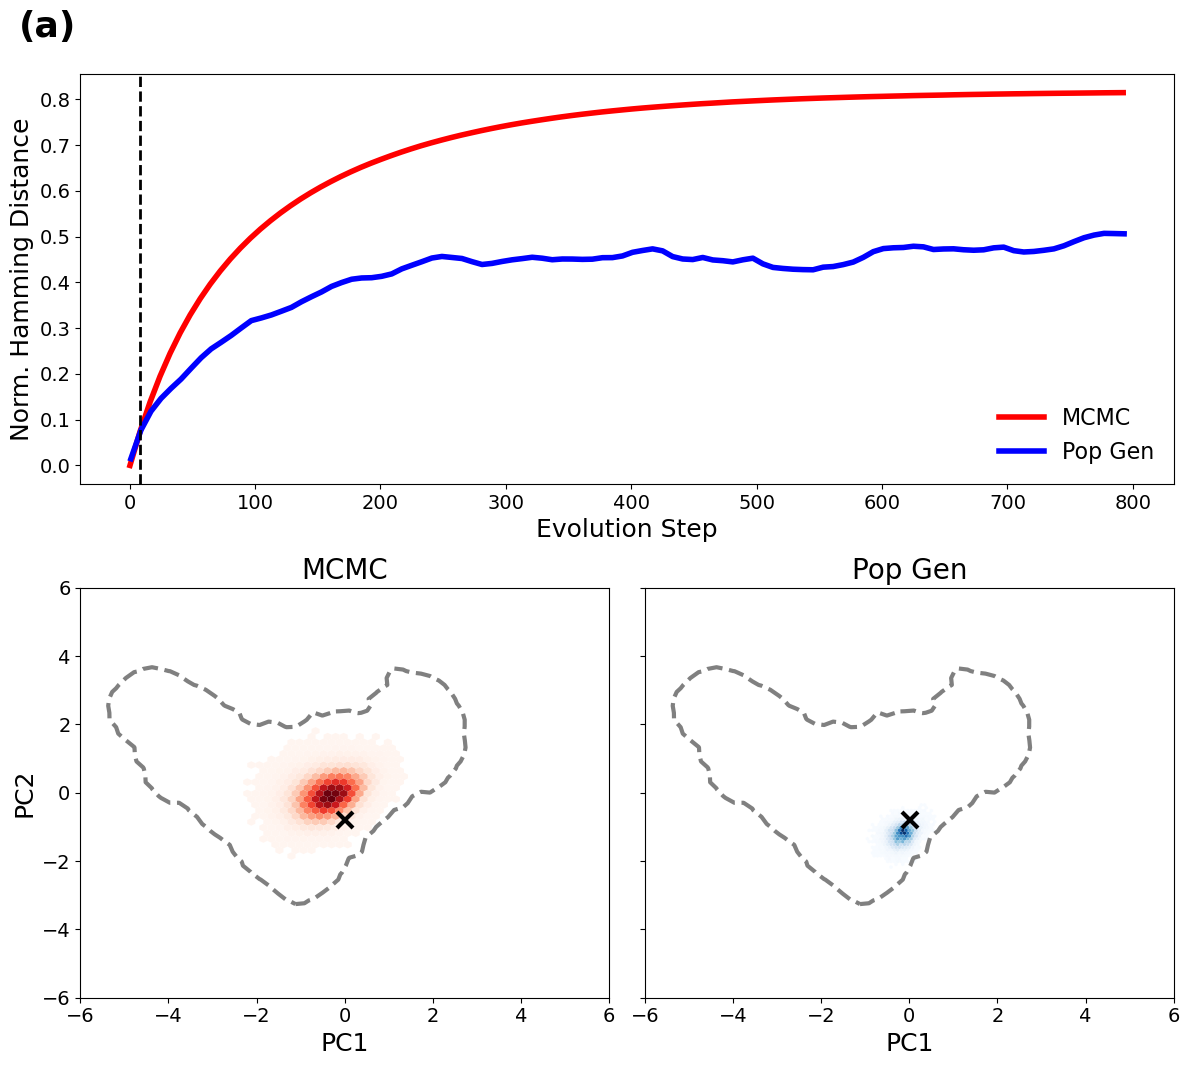

In [26]:
# Styles
label_fs, tick_fs, title_fs, legend_fs = 18, 14, 20, 16

# ==========================================
# 2. DENSITY FOR NATURAL BOUNDARY
# ==========================================
x_grid = range(-6.0, 6.0, length=60) 
y_grid = range(-6.0, 6.0, length=60)
dx, dy = x_grid[2]-x_grid[1], y_grid[2]-y_grid[1]
z_nat = zeros(length(y_grid), length(x_grid))

for i in 1:size(pc_nat, 1)
    ix = floor(Int, (pc_nat[i, 1] - x_grid[1]) / dx) + 1
    iy = floor(Int, (pc_nat[i, 2] - y_grid[1]) / dy) + 1
    if 1 <= ix <= 60 && 1 <= iy <= 60; z_nat[iy, ix] += 1.0; end
end
for r in 2:59, c in 2:59 # Smoothing
    z_nat[r,c] = (z_nat[r-1,c]+z_nat[r+1,c]+z_nat[r,c-1]+z_nat[r,c+1]+2*z_nat[r,c])/6
end

# ==========================================
# 3. FIGURE CONSTRUCTION
# ==========================================
fig = figure(figsize=(12, 11))

# --- Top Plot: Hamming Distance ---
ax1 = subplot(2, 1, 1)
ax1.plot(steps_mcmc .* 8 ./ 30, d_mcmc ./ 117, color="red", label="MCMC", linewidth=4)
ax1.plot(steps_popgen, d_pop ./ 117, color="blue", label="Pop Gen", linewidth=4)
ax1.axvline(x=8, color="black", linestyle="--", linewidth=2)
ax1.set_ylabel("Norm. Hamming Distance", fontsize=label_fs)
ax1.set_xlabel("Evolution Step", fontsize=label_fs)
ax1.legend(fontsize=legend_fs, frameon=false)
ax1.tick_params(labelsize=tick_fs)

# --- Bottom Left: MCMC Hexbin ---
ax2 = subplot(2, 2, 3)
# gridsize: higher means smaller/more hexagons
# cmap: "Reds" for MCMC
hb1 = ax2.hexbin(pc_mcmc[:,1], pc_mcmc[:,2], gridsize=20, cmap="Reds", mincnt=1, edgecolors="none")
ax2.contour(x_grid, y_grid, z_nat, levels=[0.5], colors="grey", linestyles="--", linewidths=3)
ax2.plot(wt_x, wt_y, "kx", markersize=12, markeredgewidth=3, label="WT")
ax2.set_title("MCMC", fontsize=title_fs)
ax2.set_xlabel("PC1", fontsize=label_fs); ax2.set_ylabel("PC2", fontsize=label_fs)
ax2.tick_params(labelsize=tick_fs)

# --- Bottom Right: Pop Gen Hexbin ---
ax3 = subplot(2, 2, 4)
# cmap: "Blues" for Pop Gen
hb2 = ax3.hexbin(pc_pop_gen[:,1], pc_pop_gen[:,2], gridsize=20, cmap="Blues", mincnt=1, edgecolors="none")
ax3.contour(x_grid, y_grid, z_nat, levels=[0.5], colors="grey", linestyles="--", linewidths=3)
ax3.plot(wt_x, wt_y, "kx", markersize=12, markeredgewidth=3)
ax3.set_title("Pop Gen", fontsize=title_fs)
ax3.set_xlabel("PC1", fontsize=label_fs)
ax3.set_yticklabels([]); ax3.tick_params(labelsize=tick_fs)

# Optional: Add colorbars for density
# cb1 = colorbar(hb1, ax=ax2); cb2 = colorbar(hb2, ax=ax3)

fig.text(0.02, 0.97, "(a)", fontsize=26, fontweight="bold")
tight_layout(rect=[0, 0.03, 1, 0.95])
show()

## Fig S3 colouring with deltaF

Processing sequences for TEM1 - round 12...
θ = 0.0 threshold = 0.0
M = 30949 N = 199 Meff = 30949
✅ Grafico salvato in: ../../FigS3_TEM1_only.pdf


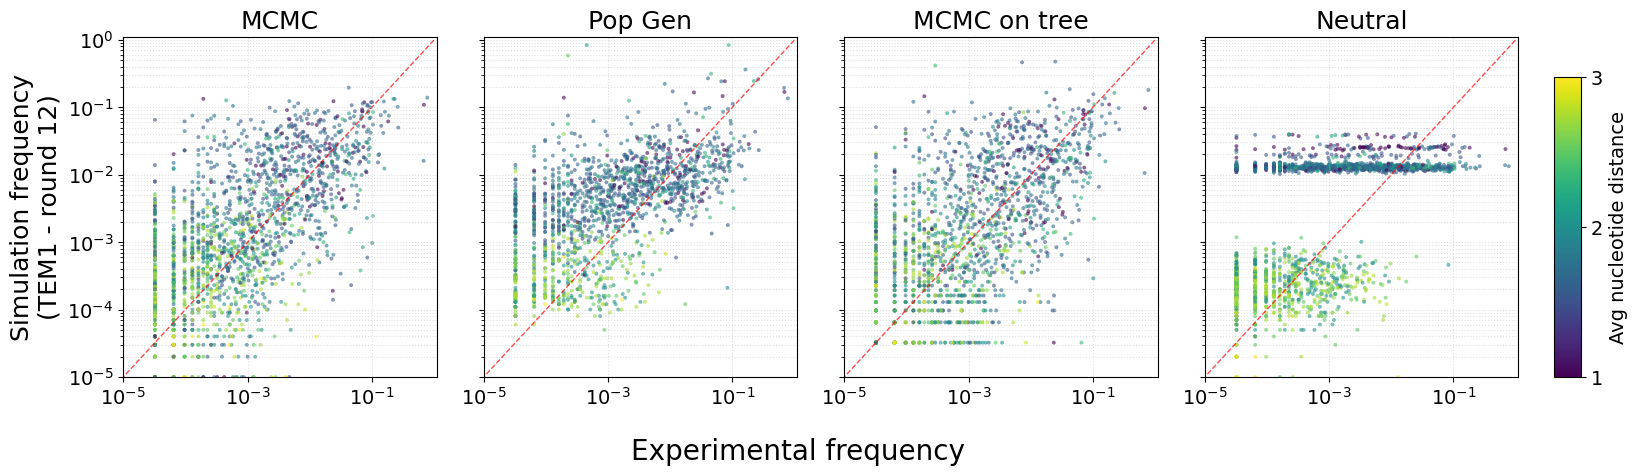

In [19]:
using PyPlot, JLD2, KitMSA, DelimitedFiles, DCAUtils, Statistics

# --- CARICAMENTO DATI ---
@load "../../data_directed_evolution/data_repl_freqs.jld2" data
@load "../../data_directed_evolution/average_mut_nucleo_dist.jld2" avg_nucleo_dist
@load "../../data_directed_evolution/full_average_mut_nucleo_dist.jld2" full_avg_nucleo_dist wt_seqs

# Definiamo i file solo per TEM1 (indice 2)
p_idx = 2 
file_tem = "../../data_directed_evolution/tem_round12_noflankgaps_nodupl.fa"
file_wt_tem = "../../data_directed_evolution/TEM1_pfam_DNA.fasta"
protein_name = "TEM1 - round 12"
methods = ["MCMC", "Pop Gen", "MCMC on tree", "Neutral"]

# --- PREPARAZIONE MASCHERA E FREQUENZE TEM1 ---
println("Processing sequences for $protein_name...")

# Calcolo Maschera
wt = join(readdlm(file_wt_tem, skipstart = 1))
L_big = round(Int, length(wt)/3)
# Logica specifica per TEM1 (estrazione amminoacidi)
wt_DNA_seq = [wt[((i-1)*3 +1):(i*3)] for i in 3:L_big-1]
wt_seq = [cod2amino[x] for x in wt_DNA_seq]
L = length(wt_seq)
mask = ones(21, L); for (i,a) in enumerate(wt_seq) mask[a,i] = 0 end; mask = Bool.(mask)

# Frequenze Sperimentali
msa = read_fasta_alignment(file_tem, 0.9)
L_msa, _ = size(msa)
f1, _ = compute_weighted_frequencies(msa, 22, 0.)
f1 = reshape(f1, 21, L_msa)
freq_exp_tem = f1[mask]



In [21]:
using Genie

In [29]:
msa_clean = read_fasta_alignment("../../TEM1_var_MSA_clean.fasta", 0.9)

d = ham_dist(wt_seq, msa_clean)
df_full = readdlm("../../TEM1_var_fit.txt", skipstart=1)[:]

df_sum = zeros(21, 199); df_count = zeros(21, 199);  for ind in 1:length(df_full)
    if (d[ind] == 1) && (df_full[ind] != "missing")
        i = findall(wt_seq .!== msa_clean[:,ind])[1]
        df_sum[msa_clean[i,ind],i] += df_full[ind]
        df_count[msa_clean[i,ind],i] += 1        
    end
end
df = df_sum ./ df_count

mask_nan = .!isnan.(df);


In [48]:
mask_tot = []
for a in 1:21 
    for i in 1:length(wt_seq)
        if mask[a,i] == true
            push!(mask_tot, mask_nan[a,i])
        end
    end
end
mask_tot = Bool.(mask_tot);

(3980,)
(3980,)
(3980,)
(3980,)
(3980,)
(3980,)
(3980,)
(3980,)
✅ Grafico salvato in: ../../FigS3_TEM1_only.pdf


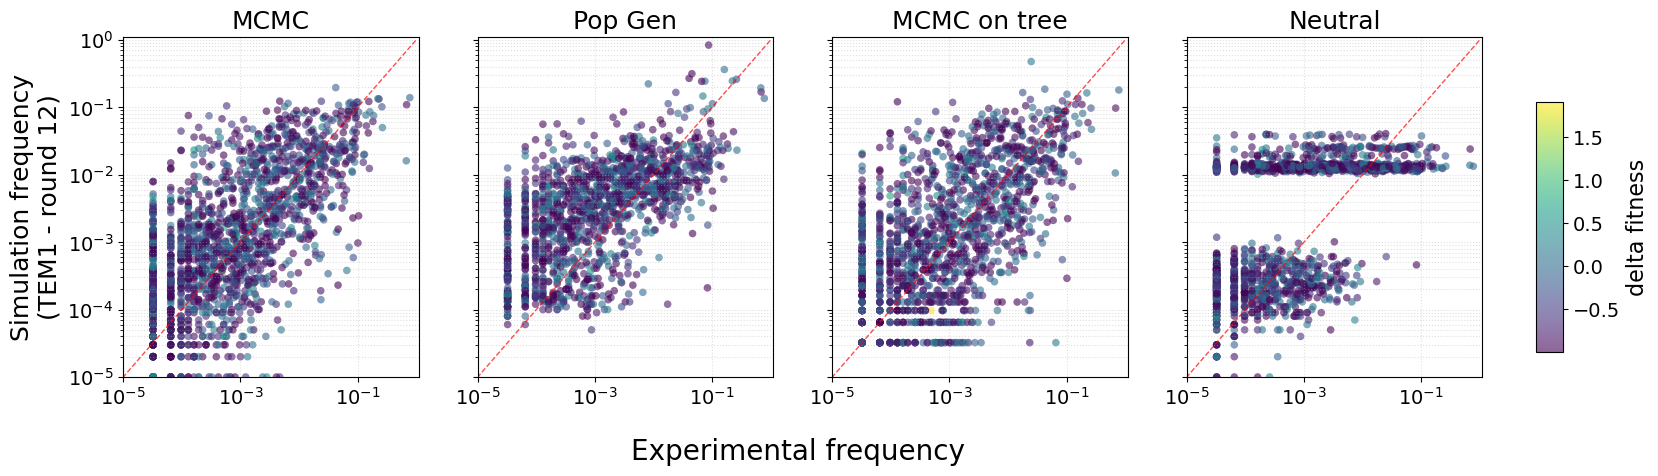

In [58]:
# --- PLOTTING (1 riga, 4 colonne) ---
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=true)
plt.subplots_adjust(wspace=0.15, bottom=0.2)

current_dist = avg_nucleo_dist[p_idx] 

for m_idx in 1:4
    ax = axes[m_idx]
    
    # Indici per le repliche della simulazione
    r1_idx = 2*m_idx - 1
    
    y = data[p_idx][r1_idx]
    x = freq_exp_tem

    println(size(x))
    println(size(y))
    
    # Scatter Plot
    img = ax.scatter(x[mask_tot], y[mask_tot], s=30, c=df[mask .& mask_nan] .- 1, cmap="viridis", alpha=0.6, edgecolors="none")
    
    # Linea di Identità
    ax.plot([1e-6, 1], [1e-6, 1], color="red", linestyle="--", linewidth=1, alpha=0.7)
    
    # Scale e Limiti
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(1e-5, 1.1)
    ax.set_ylim(1e-5, 1.1)
    
    ax.set_title(methods[m_idx], fontsize=18)
    ax.grid(true, which="both", linestyle=":", alpha=0.4)
end

# 1. Crea spazio a destra per la colorbar
fig.subplots_adjust(right=0.88, wspace=0.2, bottom=0.2)

# 2. Definisci la posizione dell'asse della colorbar [left, bottom, width, height]
cbar_ax = fig.add_axes([0.91, 0.25, 0.015, 0.5]) 

# 3. Genera la colorbar usando l'ultimo oggetto "img" creato nel loop
cb = fig.colorbar(img, cax=cbar_ax)

# 4. Personalizza l'etichetta e i tick
cb.set_label("delta fitness", fontsize=16)
# Etichette comuni
axes[1].set_ylabel("Simulation frequency\n($protein_name)", fontsize=18)
fig.text(0.5, 0.05, "Experimental frequency", ha="center", va="center", fontsize=20)

# Salvataggio
filename = "../../FigS3_TEM1_only.pdf"
plt.savefig(filename, dpi=300, bbox_inches="tight")
println("✅ Grafico salvato in: $filename")
plt.show()

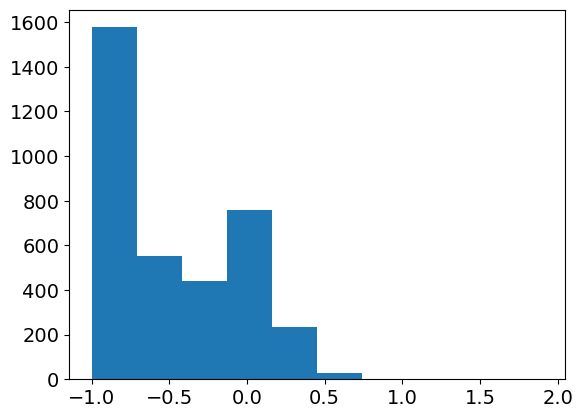

([1577.0, 551.0, 440.0, 758.0, 232.0, 26.0, 0.0, 0.0, 0.0, 1.0], [-0.9991684959755205, -0.7090125505465908, -0.4188566051176612, -0.12870065968873157, 0.16145528574019807, 0.4516112311691278, 0.7417671765980574, 1.0319231220269869, 1.3220790674559166, 1.6122350128848464, 1.902390958313776], (PyObject <matplotlib.patches.Rectangle object at 0x775c12f61460>, PyObject <matplotlib.patches.Rectangle object at 0x775c13077830>, PyObject <matplotlib.patches.Rectangle object at 0x775c130773b0>, PyObject <matplotlib.patches.Rectangle object at 0x775c12f63ec0>, PyObject <matplotlib.patches.Rectangle object at 0x775c131dbd40>, PyObject <matplotlib.patches.Rectangle object at 0x775c12eebe30>, PyObject <matplotlib.patches.Rectangle object at 0x775c12f44530>, PyObject <matplotlib.patches.Rectangle object at 0x775c1889c6b0>, PyObject <matplotlib.patches.Rectangle object at 0x775c13064710>, PyObject <matplotlib.patches.Rectangle object at 0x775c12f47c50>))

In [59]:
plt.hist(df[mask .& mask_nan] .- 1)

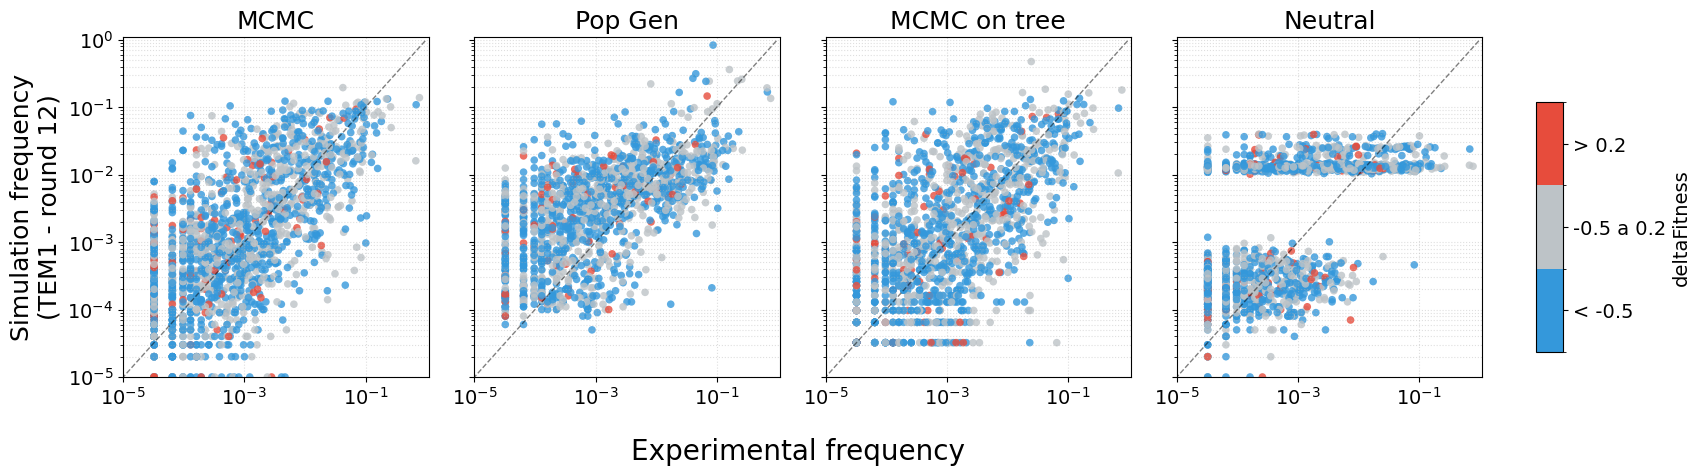

In [62]:
using PyPlot

# --- DEFINIZIONE COLORI E SOGLIE ---
# Definiamo i 3 colori (es. Blu per i bassi, Grigio per i medi, Rosso per gli alti)
colors = ["#3498db", "#bdc3c7", "#e74c3c"] 
cmap_discrete = matplotlib.colors.ListedColormap(colors)

# Definiamo i confini (boundaries)
# Usiamo un valore molto basso e uno molto alto per coprire gli estremi (es. -2 e 2)
bounds = [-2.0, -0.5, 0.2, 2.0]
norm_discrete = matplotlib.colors.BoundaryNorm(bounds, cmap_discrete.N)

# --- PLOTTING (1 riga, 4 colonne) ---
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=true)
plt.subplots_adjust(wspace=0.15, bottom=0.2, right=0.88)

current_dist = avg_nucleo_dist[p_idx] 

for m_idx in 1:4
    ax = axes[m_idx]
    
    y = data[p_idx][2*m_idx - 1]
    x = freq_exp_tem
    
    # Dati per il colore
    color_data = df[mask .& mask_nan] .- 1

    # Scatter Plot con cmap e norm discrete
    img = ax.scatter(x[mask_tot], y[mask_tot], s=30, 
                     c=color_data, 
                     cmap=cmap_discrete, 
                     norm=norm_discrete, 
                     alpha=0.8, edgecolors="none")
    
    ax.plot([1e-6, 1], [1e-6, 1], color="black", linestyle="--", linewidth=1, alpha=0.5)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(1e-5, 1.1)
    ax.set_ylim(1e-5, 1.1)
    ax.set_title(methods[m_idx], fontsize=18)
    ax.grid(true, which="both", linestyle=":", alpha=0.4)
end

# --- AGGIUNTA COLORBAR DISCRETA ---
cbar_ax = fig.add_axes([0.91, 0.25, 0.015, 0.5]) 
cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm_discrete, cmap=cmap_discrete), cax=cbar_ax)

# Impostiamo i tick al centro di ogni blocco di colore per chiarezza
cb.set_ticks([-1.25, -0.15, 1.1]) 
cb.set_ticklabels(["< -0.5", "-0.5 a 0.2", "> 0.2"])
cb.set_label("deltaFitness", fontsize=14)

# Etichette e salvataggio
axes[1].set_ylabel("Simulation frequency\n($protein_name)", fontsize=18)
fig.text(0.5, 0.05, "Experimental frequency", ha="center", va="center", fontsize=20)

plt.savefig("../../FigS3_TEM1_3colors.pdf", dpi=300, bbox_inches="tight")
plt.show()

## Fig S4

In [8]:
using KitMSA
using PyPlot


@load "../../data_directed_evolution/full_average_mut_nucleo_dist.jld2" full_avg_nucleo_dist wt_seqs
 
# Assuming full_avg_nucleo_dist, wt_seqs, and proteins are already defined
aa_labels = [KitMSA.num2letter(i) for i in 1:21]

fig, axes = plt.subplots(4, 1, figsize=(45, 35), sharex=false)
plt.subplots_adjust(hspace=0.6, left=0.1, right=0.88)

# Store the image object in an array to avoid scoping issues
img_objects = []

for idx in 1:4
    ax = axes[idx]
    data = full_avg_nucleo_dist[idx]
    wt_vec = wt_seqs[idx]
    
    # Using aspect="auto" makes the subplots fill the height defined in figsize
    # Using "plasma" or "viridis" for clear differentiation
    img = ax.imshow(data, aspect="auto", interpolation="nearest", vmin=1, vmax=3, cmap="plasma")
    push!(img_objects, img)
    
    ax.set_title(proteins[idx], fontsize=35, pad=25)
    ax.set_yticks(0:20)
    ax.set_yticklabels(aa_labels, fontsize=12)
    
    # Add WT amino acid labels on top of each column
    for (pos, aa_idx) in enumerate(wt_vec)
        wt_letter = KitMSA.num2letter(aa_idx)
        ax.text(pos-1, -1.2, wt_letter, 
                ha="center", va="bottom", 
                fontsize=20,  color="black", alpha=0.8)
    end
    
    if idx == 4
        ax.set_xlabel("Sequence Position", fontsize=45, labelpad=15)
    end
    
    ax.set_yticks(collect(0:20) .- 0.5, minor=true)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.5, alpha=0.3)
end

# 1. Single Y-Label positioned centrally
fig.text(0.02, 0.5, "Amino Acid", 
         va="center", rotation="vertical", fontsize=32)

# 2. Corrected Common Colorbar using the last image object
cbar_ax = fig.add_axes([0.91, 0.2, 0.02, 0.6]) 
cbar = fig.colorbar(img_objects[end], cax=cbar_ax, ticks=[1, 2, 3])
cbar.set_label("Nucleotide Distance", fontsize=40, labelpad=20)
cbar.ax.set_yticklabels(["1", "2", "3"], fontsize=25)

plt.savefig("../FigS4.pdf", dpi=300, bbox_inches="tight")
plt.show()

LoadError: UndefVarError: `proteins` not defined

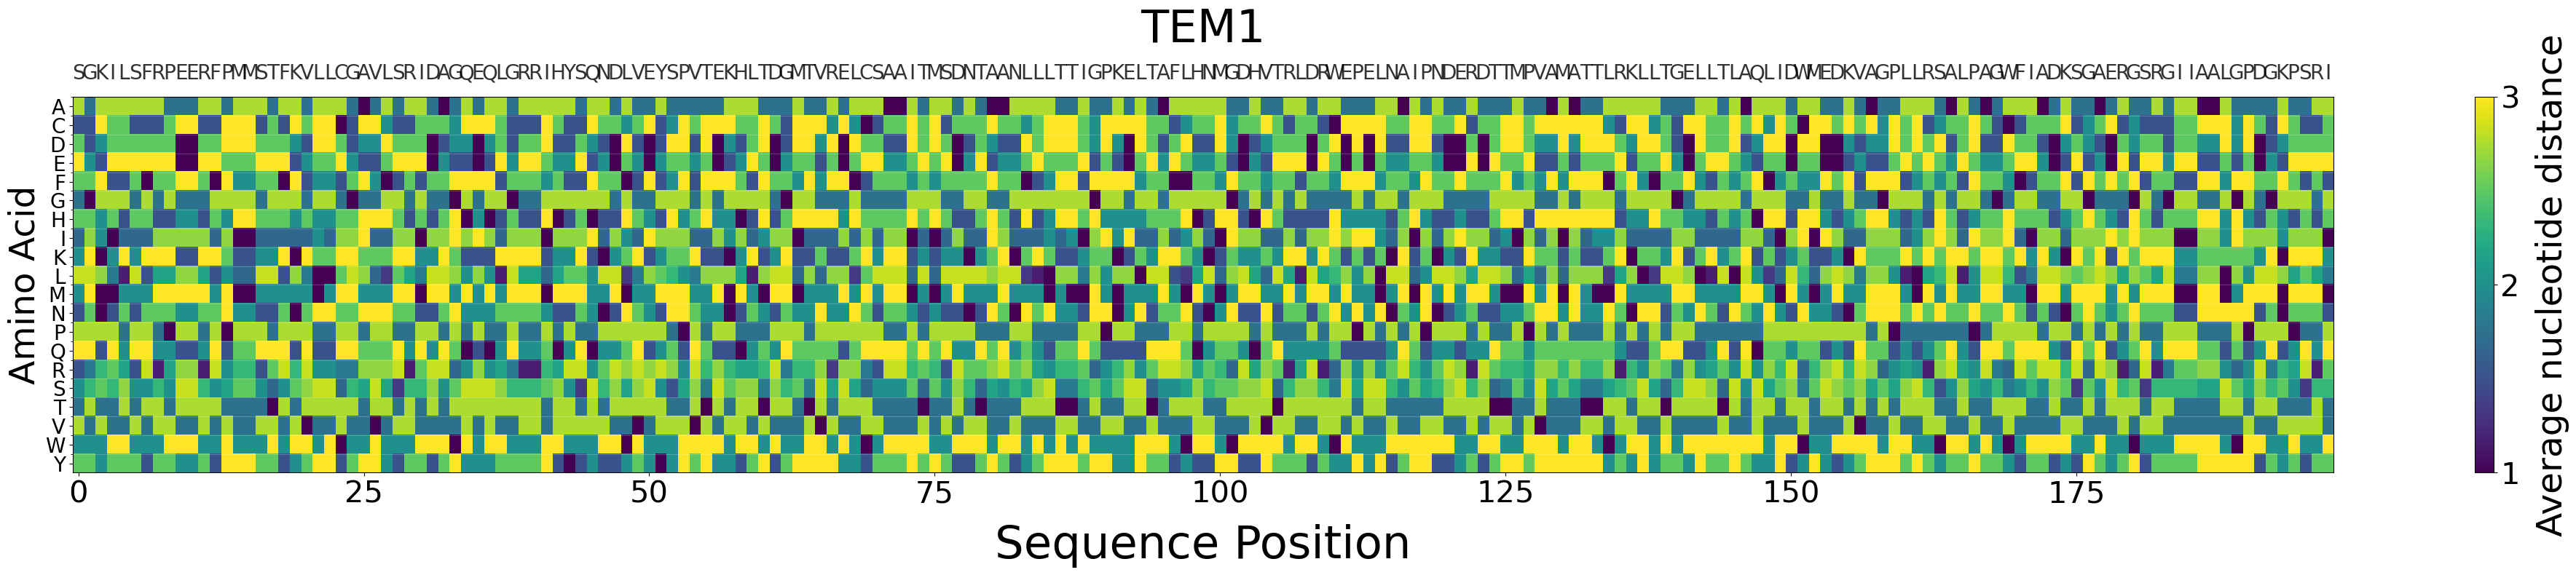

In [13]:
using KitMSA
using PyPlot

# Assuming full_avg_nucleo_dist, wt_seqs, and proteins are already defined
aa_labels = [KitMSA.num2letter(i) for i in 1:20]

# Select which protein to plot (1=PSE, 2=TEM, 3=AAC, 4=DHFR)
protein_idx = 2

fig, ax = plt.subplots(1, 1, figsize=(40, 8))

data = full_avg_nucleo_dist[protein_idx]
wt_vec = wt_seqs[protein_idx]

# Create heatmap
img = ax.imshow(data[1:end-1,1:end-1], aspect="auto", interpolation="nearest", vmin=1, vmax=3, cmap="viridis")

ax.set_title("TEM1", fontsize=45, pad=55)
ax.set_yticks(0:19)
ax.set_yticklabels(aa_labels, fontsize=20)
ax.tick_params(axis="x", labelsize=30)
ax.set_ylabel("Amino Acid", fontsize=35)
ax.set_xlabel("Sequence Position", fontsize=45, labelpad=15)

# Add WT amino acid labels on top of each column
for (pos, aa_idx) in enumerate(wt_vec[1:end-1])
    wt_letter = KitMSA.num2letter(aa_idx)
    ax.text(pos-1, -1.2, wt_letter, 
            ha="center", va="bottom", 
            fontsize=20,color="black", alpha=0.8)
end


ax.set_yticks(collect(0:19) .- 0.5, minor=true)
ax.grid(which="minor", color="white", linestyle="-", linewidth=0.5, alpha=0.3)

# Add colorbar
cbar = fig.colorbar(img, ax=ax, ticks=[1, 2, 3])
cbar.set_label("Average nucleotide distance", fontsize=35, labelpad=15)
cbar.ax.set_yticklabels(["1", "2", "3"], fontsize=30)

plt.tight_layout()
plt.savefig("../../FigS5.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
using KitMSA
using PyPlot

# Assuming full_avg_nucleo_dist, wt_seqs, and proteins are already defined
aa_labels = [KitMSA.num2letter(i) for i in 1:20]

# Select which protein to plot (1=PSE, 2=TEM, 3=AAC, 4=DHFR)
protein_idx = 2

fig, ax = plt.subplots(1, 1, figsize=(40, 8))

data = full_avg_nucleo_dist[protein_idx]
wt_vec = wt_seqs[protein_idx]

# Create heatmap
img = ax.imshow(data[1:end-1,1:end-1], aspect="auto", interpolation="nearest", vmin=1, vmax=3, cmap="viridis")

ax.set_title("TEM1", fontsize=45, pad=55)
ax.set_yticks(0:19)
ax.set_yticklabels(aa_labels, fontsize=20)
ax.tick_params(axis="x", labelsize=30)
ax.set_ylabel("Amino Acid", fontsize=35)
ax.set_xlabel("Sequence Position", fontsize=45, labelpad=15)

# Add WT amino acid labels on top of each column
for (pos, aa_idx) in enumerate(wt_vec[1:end-1])
    wt_letter = KitMSA.num2letter(aa_idx)
    ax.text(pos-1, -1.2, wt_letter, 
            ha="center", va="bottom", 
            fontsize=20,color="black", alpha=0.8)
end


ax.set_yticks(collect(0:19) .- 0.5, minor=true)
ax.grid(which="minor", color="white", linestyle="-", linewidth=0.5, alpha=0.3)

# Add colorbar
cbar = fig.colorbar(img, ax=ax, ticks=[1, 2, 3])
cbar.set_label("Average nucleotide distance", fontsize=35, labelpad=15)
cbar.ax.set_yticklabels(["1", "2", "3"], fontsize=30)

plt.tight_layout()
plt.savefig("../../FigS5.pdf", dpi=300, bbox_inches="tight")
plt.show()